# Import Libraries - Data list - Common functions

In [1]:
### --- Importing the libraries needed to handle data and visualize them
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### --- Function to check intronless (no introns), intronpoor (<= 3 introns) and intron rich (> 3 introns)
### --- This division is made on the following assumption: n° introns = n° exons - 1
def splitting_introns_type(dictionary):
    intronless = 0
    intronpoor = 0
    intronrich = 0
    intronless_list = []
    intronpoor_list = []
    intronrich_list = []
    for i in dictionary:
        if dictionary[i] == 1:
            intronless += 1
            intronless_list.append(i)
        elif dictionary[i]>1 and dictionary[i]<= 4:
            intronpoor += 1
            intronpoor_list.append(i)
        elif dictionary[i] > 4:
            intronrich += 1
            intronrich_list.append(i)

    print('Intronless are: %d' % intronless)
    print('Intronpoor are: %d' % intronpoor)
    print('Intronrich are: %d' % intronrich)
    
    return (intronless, intronpoor, intronrich, intronless_list, intronpoor_list, intronrich_list)

In [3]:
### --- I decided to create a function to plot the pie representing the distribution of intronless/poor/rich
def plotting_intron_types(n_intronless, n_intronpoor, n_intronrich, title):
    genes = ['Intronless', 'Intronpoor', 'Intronrich']
    data = [n_intronless, n_intronpoor, n_intronrich]
    fig = plt.figure(figsize = (10,7))
    plt.pie(data, labels = genes, autopct='%1.3f%%')
    plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
    plt.show()

In [4]:
pd.set_option('display.max_colwidth', None)

In [8]:
! ls Data/

Aegilops_tauschii.Aet_v4.0.52.gff3
Ananas_comosus.F153.52.gff3
Asparagus_officinalis.Aspof.V1.52.gff3
Brachypodium_distachyon.Brachypodium_distachyon_v3.0.52.gff3
Dioscorea_rotundata.TDr96_F1_v2_PseudoChromosome.52.gff3
Eragrostis_curvula.CERZOS_E.curvula1.0.52.gff3
Eragrostis_tef.ASM97063v1.52.gff3
Hordeum_vulgare_goldenpromise.GPv1.52.gff3
Hordeum_vulgare.MorexV3_pseudomolecules_assembly.52.gff3
Hordeum_vulgare_tritex.Morex_V2_scaf.52.gff3
Leersia_perrieri.Lperr_V1.4.52.gff3
Musa_acuminata.Musa_acuminata_v2.52.gff3
Oryza_barthii.O.barthii_v1.52.gff3
Oryza_brachyantha.Oryza_brachyantha.v1.4b.52.gff3
Oryza_glaberrima.Oryza_glaberrima_V1.52.gff3
Oryza_glumipatula.Oryza_glumaepatula_v1.5.52.gff3
Oryza_indica.ASM465v1.52.gff3
Oryza_longistaminata.O_longistaminata_v1.0.52.gff3
Oryza_meridionalis.Oryza_meridionalis_v1.3.52.gff3
Oryza_nivara.Oryza_nivara_v1.0.52.gff3
Oryza_punctata.Oryza_punctata_v1.2.52.gff3
Oryza_rufipogon.OR_W1943.52.gff3
Oryza_sativa.IRGSP-1.0.52.gff3
Panicum_hallii_fil2

All the data have been downloaded from Ensembl Plants release 52 as of December 2021

# Aegilops tauschii Ensembl 52

In [20]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_tauschii
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [50]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_tauschii = pd.read_csv('Data/Aegilops_tauschii.Aet_v4.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_tauschii[df_a_tauschii['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1D,PGSB,gene,35049,36415,.,-,.,ID=gene:AET1Gv20000100;biotype=protein_coding;gene_id=AET1Gv20000100;logic_name=aet_v4_high_conf
11,1D,PGSB,gene,46129,49648,.,+,.,ID=gene:AET1Gv20000200;biotype=protein_coding;gene_id=AET1Gv20000200;logic_name=aet_v4_high_conf
28,1D,PGSB,gene,146397,147641,.,+,.,ID=gene:AET1Gv20000300;biotype=protein_coding;description=PRPL28 [Source:Projected from Arabidopsis thaliana (AT2G33450) UniProtKB/TrEMBL%3BAcc:A0A178VYG9];gene_id=AET1Gv20000300;logic_name=aet_v4_high_conf
41,1D,PGSB,gene,146705,147280,.,-,.,ID=gene:AET1Gv20000400;biotype=protein_coding;gene_id=AET1Gv20000400;logic_name=aet_v4_high_conf
54,1D,PGSB,gene,154558,156614,.,+,.,ID=gene:AET1Gv20000500;biotype=protein_coding;gene_id=AET1Gv20000500;logic_name=aet_v4_high_conf
...,...,...,...,...,...,...,...,...,...
4107232,jcf7190000163286,PGSB,gene,334309,337133,.,-,.,ID=gene:AET0Gv20169800;biotype=protein_coding;gene_id=AET0Gv20169800;logic_name=aet_v4_high_conf
4107272,jcf7190000163286,PGSB,gene,341016,341333,.,-,.,ID=gene:AET0Gv20170100;biotype=protein_coding;gene_id=AET0Gv20170100;logic_name=aet_v4_high_conf
4107290,jcf7190000163286,PGSB,gene,914268,916783,.,-,.,ID=gene:AET0Gv20170700;biotype=protein_coding;gene_id=AET0Gv20170700;logic_name=aet_v4_high_conf
4107510,jcf7190000163286,PGSB,gene,916162,916738,.,+,.,ID=gene:AET0Gv20170800;biotype=protein_coding;gene_id=AET0Gv20170800;logic_name=aet_v4_high_conf


In [47]:
df_a_tauschii[df_a_tauschii['attributes'].str.contains("high_conf")]

,chr,source,type,start,end,score,strand,phase,attributes
1,1D,PGSB,gene,35049,36415,.,-,.,ID=gene:AET1Gv20000100;biotype=protein_coding;gene_id=AET1Gv20000100;logic_name=aet_v4_high_conf
11,1D,PGSB,gene,46129,49648,.,+,.,ID=gene:AET1Gv20000200;biotype=protein_coding;gene_id=AET1Gv20000200;logic_name=aet_v4_high_conf
28,1D,PGSB,gene,146397,147641,.,+,.,ID=gene:AET1Gv20000300;biotype=protein_coding;description=PRPL28 [Source:Projected from Arabidopsis thaliana (AT2G33450) UniProtKB/TrEMBL%3BAcc:A0A178VYG9];gene_id=AET1Gv20000300;logic_name=aet_v4_high_conf
41,1D,PGSB,gene,146705,147280,.,-,.,ID=gene:AET1Gv20000400;biotype=protein_coding;gene_id=AET1Gv20000400;logic_name=aet_v4_high_conf
54,1D,PGSB,gene,154558,156614,.,+,.,ID=gene:AET1Gv20000500;biotype=protein_coding;gene_id=AET1Gv20000500;logic_name=aet_v4_high_conf
...,...,...,...,...,...,...,...,...,...
4107232,jcf7190000163286,PGSB,gene,334309,337133,.,-,.,ID=gene:AET0Gv20169800;biotype=protein_coding;gene_id=AET0Gv20169800;logic_name=aet_v4_high_conf
4107272,jcf7190000163286,PGSB,gene,341016,341333,.,-,.,ID=gene:AET0Gv20170100;biotype=protein_coding;gene_id=AET0Gv20170100;logic_name=aet_v4_high_conf
4107290,jcf7190000163286,PGSB,gene,914268,916783,.,-,.,ID=gene:AET0Gv20170700;biotype=protein_coding;gene_id=AET0Gv20170700;logic_name=aet_v4_high_conf
4107510,jcf7190000163286,PGSB,gene,916162,916738,.,+,.,ID=gene:AET0Gv20170800;biotype=protein_coding;gene_id=AET0Gv20170800;logic_name=aet_v4_high_conf


In [45]:
### --- Building a separate dataframe containing all exons
exon_a_tauschii = df_a_tauschii.loc[df_a_tauschii['type'].isin(['exon'])]
exon_a_tauschii.iloc[:10, 8:]

,attributes
4,Parent=transcript:AET1Gv20000100.1;Name=AET1Gv20000100.1-E3;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=AET1Gv20000100.1-E3;rank=3
6,Parent=transcript:AET1Gv20000100.1;Name=AET1Gv20000100.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=AET1Gv20000100.1-E2;rank=2
9,Parent=transcript:AET1Gv20000100.1;Name=AET1Gv20000100.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=AET1Gv20000100.1-E1;rank=1
14,Parent=transcript:AET1Gv20000200.1;Name=AET1Gv20000200.1-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000200.1-E1;rank=1
19,Parent=transcript:AET1Gv20000200.2;Name=AET1Gv20000200.2-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=AET1Gv20000200.2-E1;rank=1
21,Parent=transcript:AET1Gv20000200.2;Name=AET1Gv20000200.2-E2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000200.2-E2;rank=2
25,Parent=transcript:AET1Gv20000200.3;Name=AET1Gv20000200.3-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000200.3-E1;rank=1
31,Parent=transcript:AET1Gv20000300.1;Name=AET1Gv20000300.1-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=AET1Gv20000300.1-E1;rank=1
36,Parent=transcript:AET1Gv20000300.2;Name=AET1Gv20000300.2-E1;constitutive=0;ensembl_end_phase=1;ensembl_phase=-1;exon_id=AET1Gv20000300.2-E1;rank=1
39,Parent=transcript:AET1Gv20000300.2;Name=AET1Gv20000300.2-E2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=1;exon_id=AET1Gv20000300.2-E2;rank=2


In [19]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_tauschii.to_csv('Data/Aegilops_tauschii.Aet_v4.0.52_EXON',sep='\t',index=False,header=False)

In [67]:
### --- Counting introns type 
introns_dictionary_a_tauschii = counting_introns_type(exon_a_tauschii)

In [68]:
n_intronless_a_tauschii, n_intronpoor_a_tauschii, n_intronrich_a_tauschii, intronless_a_tauschii, intronpoor_a_tauschii, intronrich_a_tauschii = splitting_introns_type(introns_dictionary_a_tauschii)

Intronless are: 12773
Intronpoor are: 7089
Intronrich are: 23500


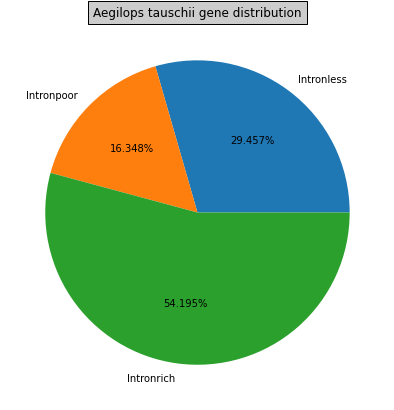

In [32]:
plotting_intron_types(12773, 7089, 23500, 'Aegilops tauschii gene distribution')

In [25]:
### --- Creating the list of a_tauschii gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_tauschii_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_tauschii_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_tauschii_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_tauschii)):
    if i == len(intronless_a_tauschii) -1:
        intronless_file.write(intronless_a_tauschii[i])
    else:
        intronless_file.write(intronless_a_tauschii[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_tauschii)):
    if i == len(intronpoor_a_tauschii) -1:
        intronpoor_file.write(intronpoor_a_tauschii[i])
    else:
        intronpoor_file.write(intronpoor_a_tauschii[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_tauschii)):
    if i == len(intronrich_a_tauschii) -1:
        intronrich_file.write(intronrich_a_tauschii[i])
    else:
        intronrich_file.write(intronrich_a_tauschii[i]+'\n')
intronrich_file.close()


# Ananas Comosus Ensembl 52

In [20]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_comosus
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [52]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_comosus = pd.read_csv('Data/Ananas_comosus.F153.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_comosus[df_a_comosus['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,contig1,UIL,gene,6786,7510,.,+,.,ID=gene:Aco009737.1.path1;biotype=protein_coding;gene_id=Aco009737.1.path1;logic_name=ananasuil
7,contig1,UIL,gene,31068,33597,.,+,.,ID=gene:Aco009735.1.path1;biotype=protein_coding;gene_id=Aco009735.1.path1;logic_name=ananasuil
15,contig1,UIL,gene,31645,33237,.,-,.,ID=gene:Aco009736.1.path1;biotype=protein_coding;gene_id=Aco009736.1.path1;logic_name=ananasuil
22,contig1,UIL,gene,38611,41339,.,+,.,ID=gene:Aco021932.1.path1;biotype=protein_coding;gene_id=Aco021932.1.path1;logic_name=ananasuil
32,contig1,UIL,gene,38611,41339,.,+,.,ID=gene:Aco009734.1.path1;biotype=protein_coding;gene_id=Aco009734.1.path1;logic_name=ananasuil
...,...,...,...,...,...,...,...,...,...
341087,contig9,UIL,gene,13869925,13873160,.,+,.,ID=gene:Aco017049.1.path1;biotype=protein_coding;gene_id=Aco017049.1.path1;logic_name=ananasuil
341093,contig9,UIL,gene,13888135,13904951,.,-,.,ID=gene:Aco017050.1.path1;biotype=protein_coding;gene_id=Aco017050.1.path1;logic_name=ananasuil
341103,contig9,UIL,gene,13920405,13922381,.,-,.,ID=gene:Aco017051.1.path1;biotype=protein_coding;description=Probable carotenoid cleavage dioxygenase 4%2C chloroplastic [Source:Projected from Arabidopsis thaliana (AT4G19170) UniProtKB/Swiss-Prot%3BAcc:O49675];gene_id=Aco017051.1.path1;logic_name=ananasuil
341107,contig9,UIL,gene,13926849,13930709,.,+,.,ID=gene:Aco017052.1.path1;biotype=protein_coding;gene_id=Aco017052.1.path1;logic_name=ananasuil


In [66]:
### --- Building a separate dataframe containing all exons
exon_a_comosus = df_a_comosus.loc[df_a_comosus['type'].isin(['exon'])]
exon_a_comosus.iloc[:30, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,contig1,UIL,exon,6786,7116,.,+,.,Parent=transcript:Aco009737.1.mrna1;Name=Aco009737.1.mrna1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=Aco009737.1.mrna1-E1;rank=1
5,contig1,UIL,exon,7347,7510,.,+,.,Parent=transcript:Aco009737.1.mrna1;Name=Aco009737.1.mrna1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=Aco009737.1.mrna1-E2;rank=2
9,contig1,UIL,exon,31068,31412,.,+,.,Parent=transcript:Aco009735.1.mrna1;Name=Aco009735.1.mrna1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Aco009735.1.mrna1-E1;rank=1
11,contig1,UIL,exon,32757,32880,.,+,.,Parent=transcript:Aco009735.1.mrna1;Name=Aco009735.1.mrna1-E2;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=Aco009735.1.mrna1-E2;rank=2
13,contig1,UIL,exon,32987,33597,.,+,.,Parent=transcript:Aco009735.1.mrna1;Name=Aco009735.1.mrna1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=Aco009735.1.mrna1-E3;rank=3
18,contig1,UIL,exon,31645,31717,.,-,.,Parent=transcript:Aco009736.1.mrna1;Name=Aco009736.1.mrna1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=Aco009736.1.mrna1-E2;rank=2
20,contig1,UIL,exon,32943,33237,.,-,.,Parent=transcript:Aco009736.1.mrna1;Name=Aco009736.1.mrna1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=Aco009736.1.mrna1-E1;rank=1
24,contig1,UIL,exon,38611,38948,.,+,.,Parent=transcript:Aco021932.1.mrna1;Name=Aco021932.1.mrna1-E1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=Aco021932.1.mrna1-E1;rank=1
26,contig1,UIL,exon,39167,39445,.,+,.,Parent=transcript:Aco021932.1.mrna1;Name=Aco021932.1.mrna1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=Aco021932.1.mrna1-E2;rank=2
28,contig1,UIL,exon,40690,40857,.,+,.,Parent=transcript:Aco021932.1.mrna1;Name=Aco021932.1.mrna1-E3;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=Aco021932.1.mrna1-E3;rank=3


In [56]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_comosus.to_csv('Data/Ananas_comosus.F153.52_EXON',sep='\t',index=False,header=False)

In [57]:
### --- Counting introns type
introns_dictionary_a_comosus = counting_introns_type(exon_a_comosus)

In [58]:
n_intronless_a_comosus, n_intronpoor_a_comosus, n_intronrich_a_comosus, intronless_a_comosus, intronpoor_a_comosus, intronrich_a_comosus = splitting_introns_type(introns_dictionary_a_comosus)

Intronless are: 4258
Intronpoor are: 11204
Intronrich are: 11268


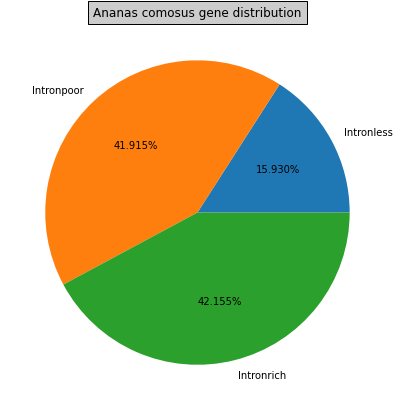

In [61]:
plotting_intron_types(4258, 11204, 11268, 'Ananas comosus gene distribution')

In [62]:
### --- Creating the list of a_comosus gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_comosus_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_comosus_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_comosus_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_comosus)):
    if i == len(intronless_a_comosus) -1:
        intronless_file.write(intronless_a_comosus[i])
    else:
        intronless_file.write(intronless_a_comosus[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_comosus)):
    if i == len(intronpoor_a_comosus) -1:
        intronpoor_file.write(intronpoor_a_comosus[i])
    else:
        intronpoor_file.write(intronpoor_a_comosus[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_comosus)):
    if i == len(intronrich_a_comosus) -1:
        intronrich_file.write(intronrich_a_comosus[i])
    else:
        intronrich_file.write(intronrich_a_comosus[i]+'\n')
intronrich_file.close()


# Asparagus officinalis Ensembl 52

In [71]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_officinalis
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('-')[0]] = counts.get(i.split('-')[0], 0) + 1
    return counts

In [89]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_officinalis = pd.read_csv('Data/Asparagus_officinalis.Aspof.V1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_officinalis[df_a_officinalis['type']==('gene')]

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,7,ena,gene,12716608,12722946,.,+,.,ID=gene:A4U43_C07F4870;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C07F4870;logic_name=ena
2,7,ena,gene,6886280,6894028,.,+,.,ID=gene:A4U43_C07F2940;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C07F2940;logic_name=ena
3,7,ena,gene,14360768,14365928,.,+,.,ID=gene:A4U43_C07F5540;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C07F5540;logic_name=ena
4,7,ena,gene,96491290,96492915,.,+,.,ID=gene:A4U43_C07F25640;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C07F25640;logic_name=ena
5,7,ena,gene,97431862,97432167,.,-,.,ID=gene:A4U43_C07F25830;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_C07F25830;logic_name=ena
...,...,...,...,...,...,...,...,...,...
339953,KV864049,ena,gene,963,4170,.,-,.,ID=gene:A4U43_UnF10460;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_UnF10460;logic_name=ena
340124,KV863441,ena,gene,295,3476,.,-,.,ID=gene:A4U43_UnF2660;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_UnF2660;logic_name=ena
340315,KV864097,ena,gene,94,750,.,-,.,ID=gene:A4U43_UnF10860;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_UnF10860;logic_name=ena
340418,KV863316,ena,gene,328,2675,.,+,.,ID=gene:A4U43_UnF190;biotype=protein_coding;description=uncharacterized protein;gene_id=A4U43_UnF190;logic_name=ena


In [79]:
### --- Building a separate dataframe containing all exons
exon_a_officinalis = df_a_officinalis.loc[df_a_officinalis['type'].isin(['exon'])]
exon_a_officinalis.iloc[:30, :]

,chr,source,type,start,end,score,strand,phase,attributes
7421,7,ena,exon,12716608,12716665,.,+,.,Name=ONK62514-1;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ONK62514-1;rank=1
7422,7,ena,exon,12717235,12717362,.,+,.,Name=ONK62514-2;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=ONK62514-2;rank=2
7423,7,ena,exon,12717476,12717755,.,+,.,Name=ONK62514-3;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ONK62514-3;rank=3
7424,7,ena,exon,12717846,12718081,.,+,.,Name=ONK62514-4;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=ONK62514-4;rank=4
7425,7,ena,exon,12718163,12718290,.,+,.,Name=ONK62514-5;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ONK62514-5;rank=5
7426,7,ena,exon,12718631,12718748,.,+,.,Name=ONK62514-6;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ONK62514-6;rank=6
7427,7,ena,exon,12721351,12721406,.,+,.,Name=ONK62514-7;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ONK62514-7;rank=7
7428,7,ena,exon,12721496,12721589,.,+,.,Name=ONK62514-8;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ONK62514-8;rank=8
7429,7,ena,exon,12721675,12721864,.,+,.,Name=ONK62514-9;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ONK62514-9;rank=9
7430,7,ena,exon,12721980,12722048,.,+,.,Name=ONK62514-10;Parent=transcript:ONK62514;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=ONK62514-10;rank=10


In [72]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_officinalis.to_csv('Data/Asparagus_officinalis.Aspof.V1.52_EXON',sep='\t',index=False,header=False)

In [73]:
### --- Counting introns type
introns_dictionary_a_officinalis = counting_introns_type(exon_a_officinalis)

In [74]:
n_intronless_a_officinalis, n_intronpoor_a_officinalis, n_intronrich_a_officinalis, intronless_a_officinalis, intronpoor_a_officinalis, intronrich_a_officinalis = splitting_introns_type(introns_dictionary_a_officinalis)

Intronless are: 4139
Intronpoor are: 11188
Intronrich are: 9349


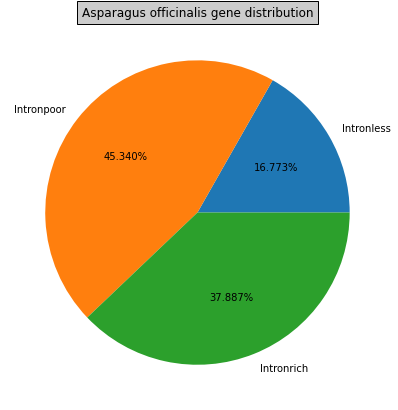

In [76]:
plotting_intron_types(4139, 11188, 9349, 'Asparagus officinalis gene distribution')

In [77]:
### --- Creating the list of a_officinalis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_officinalis_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_officinalis_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_officinalis_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_officinalis)):
    if i == len(intronless_a_officinalis) -1:
        intronless_file.write(intronless_a_officinalis[i])
    else:
        intronless_file.write(intronless_a_officinalis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_officinalis)):
    if i == len(intronpoor_a_officinalis) -1:
        intronpoor_file.write(intronpoor_a_officinalis[i])
    else:
        intronpoor_file.write(intronpoor_a_officinalis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_officinalis)):
    if i == len(intronrich_a_officinalis) -1:
        intronrich_file.write(intronrich_a_officinalis[i])
    else:
        intronrich_file.write(intronrich_a_officinalis[i]+'\n')
intronrich_file.close()


# Brachypodium distachyon Ensembl 52

In [71]:
### --- Function to count introns within a dataframe made of exons formatted like exon_b_distachyon
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('-')[0]] = counts.get(i.split('-')[0], 0) + 1
    return counts

In [111]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_b_distachyon = pd.read_csv('Data/Brachypodium_distachyon.Brachypodium_distachyon_v3.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_b_distachyon[df_b_distachyon['type']=='mRNA']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
10134,1,ena,mRNA,11070326,11072347,.,-,.,ID=transcript:KQK14069;Parent=gene:BRADI_1g14170v3;biotype=protein_coding;transcript_id=KQK14069
10135,1,ena,mRNA,11071514,11072241,.,-,.,ID=transcript:KQK14071;Parent=gene:BRADI_1g14170v3;biotype=protein_coding;transcript_id=KQK14071
10136,1,ena,mRNA,11070326,11072347,.,-,.,ID=transcript:KQK14070;Parent=gene:BRADI_1g14170v3;biotype=protein_coding;transcript_id=KQK14070
10137,1,ena,mRNA,51845138,51849047,.,-,.,ID=transcript:KQK20239;Parent=gene:BRADI_1g53295v3;biotype=protein_coding;transcript_id=KQK20239
10138,1,ena,mRNA,58969773,58972344,.,+,.,ID=transcript:KQK21263;Parent=gene:BRADI_1g59795v3;biotype=protein_coding;transcript_id=KQK21263
...,...,...,...,...,...,...,...,...,...
740169,KZ622971,ena,mRNA,15179,15940,.,+,.,ID=transcript:PNS24241;Parent=gene:BRADI_0012s00201v3;biotype=protein_coding;transcript_id=PNS24241
740170,KZ622971,ena,mRNA,173,2481,.,+,.,ID=transcript:PNS24237;Parent=gene:BRADI_0012s00100v3;biotype=protein_coding;transcript_id=PNS24237
740207,KZ622972,ena,mRNA,16852,19914,.,+,.,ID=transcript:PNS24236;Parent=gene:BRADI_0014s00100v3;biotype=protein_coding;transcript_id=PNS24236
740212,KZ622973,ena,mRNA,1682,3173,.,-,.,ID=transcript:PNS24235;Parent=gene:BRADI_0135s00100v3;biotype=protein_coding;transcript_id=PNS24235


In [81]:
### --- Building a separate dataframe containing all exons
exon_b_distachyon = df_b_distachyon.loc[df_b_distachyon['type'].isin(['exon'])]
exon_b_distachyon.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
25543,1,ena,exon,11072136,11072347,.,-,.,Name=KQK14069-1;Parent=transcript:KQK14069;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK14069-1;rank=1
25544,1,ena,exon,11071674,11071881,.,-,.,Name=KQK14069-2;Parent=transcript:KQK14069;constitutive=0;ensembl_end_phase=2;ensembl_phase=1;exon_id=KQK14069-2;rank=2
25545,1,ena,exon,11070326,11071508,.,-,.,Name=KQK14069-3;Parent=transcript:KQK14069;constitutive=0;ensembl_end_phase=0;ensembl_phase=2;exon_id=KQK14069-3;rank=3
25546,1,ena,exon,11072136,11072241,.,-,.,Name=KQK14071-1;Parent=transcript:KQK14071;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK14071-1;rank=1
25547,1,ena,exon,11071514,11071881,.,-,.,Name=KQK14071-2;Parent=transcript:KQK14071;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQK14071-2;rank=2
25548,1,ena,exon,11071674,11072347,.,-,.,Name=KQK14070-1;Parent=transcript:KQK14070;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=KQK14070-1;rank=1
25549,1,ena,exon,11070326,11071508,.,-,.,Name=KQK14069-3;Parent=transcript:KQK14070;constitutive=0;ensembl_end_phase=0;ensembl_phase=2;exon_id=KQK14069-3;rank=2
25550,1,ena,exon,51847809,51849047,.,-,.,Name=KQK20239-1;Parent=transcript:KQK20239;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQK20239-1;rank=1
25551,1,ena,exon,51845138,51847721,.,-,.,Name=KQK20239-2;Parent=transcript:KQK20239;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK20239-2;rank=2
25552,1,ena,exon,58969773,58970458,.,+,.,Name=KQK21263-1;Parent=transcript:KQK21263;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK21263-1;rank=1


In [82]:
### --- Exporting the exon dataframe to a tsv file 
exon_b_distachyon.to_csv('Data/Brachypodium_distachyon.Brachypodium_distachyon_v3.0.52_EXON',sep='\t',index=False,header=False)

In [83]:
### --- Counting introns type
introns_dictionary_b_distachyon = counting_introns_type(exon_b_distachyon)

In [84]:
n_intronless_b_distachyon, n_intronpoor_b_distachyon, n_intronrich_b_distachyon, intronless_b_distachyon, intronpoor_b_distachyon, intronrich_b_distachyon = splitting_introns_type(introns_dictionary_b_distachyon)

Intronless are: 16188
Intronpoor are: 20746
Intronrich are: 13676


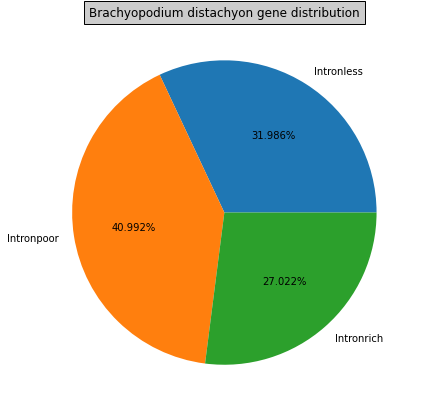

In [85]:
plotting_intron_types(16188, 20746, 13676, 'Brachyopodium distachyon gene distribution')

In [91]:
### --- Creating the list of b_distachyon gene IDs to check the number of transcripts using command line
intronless_file = open('Output/b_distachyon_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/b_distachyon_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/b_distachyon_intronrichIDs.txt', 'a')
for i in range(len(intronless_b_distachyon)):
    if i == len(intronless_b_distachyon) -1:
        intronless_file.write(intronless_b_distachyon[i])
    else:
        intronless_file.write(intronless_b_distachyon[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_b_distachyon)):
    if i == len(intronpoor_b_distachyon) -1:
        intronpoor_file.write(intronpoor_b_distachyon[i])
    else:
        intronpoor_file.write(intronpoor_b_distachyon[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_b_distachyon)):
    if i == len(intronrich_b_distachyon) -1:
        intronrich_file.write(intronrich_b_distachyon[i])
    else:
        intronrich_file.write(intronrich_b_distachyon[i]+'\n')
intronrich_file.close()


# Dioscorea rotundata Ensembl 52

In [105]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [242]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_d_rotundata = pd.read_csv('Data/Dioscorea_rotundata.TDr96_F1_v2_PseudoChromosome.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_d_rotundata[df_d_rotundata['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,20,v2.0,gene,24568418,24571899,.,+,.,ID=gene:DRNTG_23465;biotype=protein_coding;gene_id=DRNTG_23465;logic_name=gff3_genes
2,20,v2.0,gene,3135910,3137003,.,+,.,ID=gene:DRNTG_32780;biotype=protein_coding;gene_id=DRNTG_32780;logic_name=gff3_genes
3,20,v2.0,gene,6620176,6623893,.,+,.,ID=gene:DRNTG_05220;biotype=protein_coding;gene_id=DRNTG_05220;logic_name=gff3_genes
4,20,v2.0,gene,5390111,5392470,.,-,.,ID=gene:DRNTG_15135;biotype=nontranslating_CDS;gene_id=DRNTG_15135;logic_name=gff3_genes
5,20,v2.0,gene,13390998,13397982,.,+,.,ID=gene:DRNTG_10889;biotype=protein_coding;gene_id=DRNTG_10889;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
885325,BLBR01001436.1,v2.0,gene,1219,1727,.,-,.,ID=gene:DRNTG_28417;biotype=protein_coding;gene_id=DRNTG_28417;logic_name=gff3_genes
885339,BLBR01000694.1,v2.0,gene,1,1058,.,-,.,ID=gene:DRNTG_14481;biotype=protein_coding;gene_id=DRNTG_14481;logic_name=gff3_genes
885369,BLBR01001902.1,v2.0,gene,142,857,.,+,.,ID=gene:DRNTG_32727;biotype=protein_coding;gene_id=DRNTG_32727;logic_name=gff3_genes
885389,BLBR01001971.1,v2.0,gene,886,1229,.,+,.,ID=gene:DRNTG_33191;biotype=protein_coding;gene_id=DRNTG_33191;logic_name=gff3_genes


In [243]:
### --- Building a separate dataframe containing all exons
exon_d_rotundata = df_d_rotundata.loc[df_d_rotundata['type'].isin(['exon'])]
exon_d_rotundata.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4024,20,v2.0,exon,24568418,24568679,.,+,.,Name=DRNTG_23465.1-E1;Parent=transcript:DRNTG_23465.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=DRNTG_23465.1-E1;rank=1
4025,20,v2.0,exon,24571817,24571899,.,+,.,Name=DRNTG_23465.1-E2;Parent=transcript:DRNTG_23465.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=DRNTG_23465.1-E2;rank=2
4026,20,v2.0,exon,3135910,3136453,.,+,.,Name=DRNTG_32780.1-E1;Parent=transcript:DRNTG_32780.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=DRNTG_32780.1-E1;rank=1
4027,20,v2.0,exon,3136520,3137003,.,+,.,Name=DRNTG_32780.1-E2;Parent=transcript:DRNTG_32780.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=DRNTG_32780.1-E2;rank=2
4028,20,v2.0,exon,6620176,6620292,.,+,.,Name=DRNTG_05220.1-E1;Parent=transcript:DRNTG_05220.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=DRNTG_05220.1-E1;rank=1
4029,20,v2.0,exon,6621233,6621431,.,+,.,Name=DRNTG_05220.1-E2;Parent=transcript:DRNTG_05220.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=DRNTG_05220.1-E2;rank=2
4030,20,v2.0,exon,6622244,6622317,.,+,.,Name=DRNTG_05220.1-E3;Parent=transcript:DRNTG_05220.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=DRNTG_05220.1-E3;rank=3
4031,20,v2.0,exon,6623150,6623204,.,+,.,Name=DRNTG_05220.1-E4;Parent=transcript:DRNTG_05220.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=DRNTG_05220.1-E4;rank=4
4032,20,v2.0,exon,6623358,6623511,.,+,.,Name=DRNTG_05220.1-E5;Parent=transcript:DRNTG_05220.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=DRNTG_05220.1-E5;rank=5
4033,20,v2.0,exon,6623592,6623893,.,+,.,Name=DRNTG_05220.1-E6;Parent=transcript:DRNTG_05220.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=DRNTG_05220.1-E6;rank=6


In [265]:
### --- Exporting the exon dataframe to a tsv file 
exon_d_rotundata.to_csv('Data/Dioscorea_rotundata.TDr96_F1_v2_PseudoChromosome.52_EXON',sep='\t',index=False,header=False)

In [106]:
### --- Counting introns type
introns_dictionary_d_rotundata = counting_introns_type(exon_d_rotundata)

In [107]:
n_intronless_d_rotundata, n_intronpoor_d_rotundata, n_intronrich_d_rotundata, intronless_d_rotundata, intronpoor_d_rotundata, intronrich_d_rotundata = splitting_introns_type(introns_dictionary_d_rotundata)

Intronless are: 4112
Intronpoor are: 14765
Intronrich are: 16587


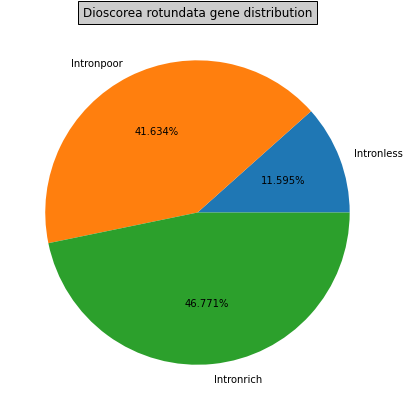

In [108]:
plotting_intron_types(4112, 14765, 16587, 'Dioscorea rotundata gene distribution')

In [109]:
### --- Creating the list of d_rotundata gene IDs to check the number of transcripts using command line
intronless_file = open('Output/d_rotundata_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/d_rotundata_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/d_rotundata_intronrichIDs.txt', 'a')
for i in range(len(intronless_d_rotundata)):
    if i == len(intronless_d_rotundata) -1:
        intronless_file.write(intronless_d_rotundata[i])
    else:
        intronless_file.write(intronless_d_rotundata[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_d_rotundata)):
    if i == len(intronpoor_d_rotundata) -1:
        intronpoor_file.write(intronpoor_d_rotundata[i])
    else:
        intronpoor_file.write(intronpoor_d_rotundata[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_d_rotundata)):
    if i == len(intronrich_d_rotundata) -1:
        intronrich_file.write(intronrich_d_rotundata[i])
    else:
        intronrich_file.write(intronrich_d_rotundata[i]+'\n')
intronrich_file.close()


# Eragrostis curvula

In [114]:
### --- Function to count introns within a dataframe made of exons formatted like exon_e_curvula
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1]] = counts.get(i.split(';')[1], 0) + 1
    return counts

In [121]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_e_curvula = pd.read_csv('Data/Eragrostis_curvula.CERZOS_E.curvula1.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_e_curvula[df_e_curvula['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,ena,gene,4466691,4469915,.,+,.,ID=gene:EJB05_19711;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_19711;logic_name=ena
2,1,ena,gene,15015212,15016291,.,+,.,ID=gene:EJB05_21146;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_21146;logic_name=ena
3,1,ena,gene,21923687,21925296,.,+,.,ID=gene:EJB05_21848;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_21848;logic_name=ena
4,1,ena,gene,55081289,55081643,.,+,.,ID=gene:EJB05_24987;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_24987;logic_name=ena
5,1,ena,gene,7491910,7494335,.,-,.,ID=gene:EJB05_20167;biotype=protein_coding;description=Photosystem I chlorophyll a/b-binding protein 5%2C chloroplastic [Source:Projected from Arabidopsis thaliana (AT1G45474) UniProtKB/Swiss-Prot%3BAcc:Q9C639];gene_id=EJB05_20167;logic_name=ena
...,...,...,...,...,...,...,...,...,...
695095,Contig761,ena,gene,1,354,.,+,.,ID=gene:EJB05_55562;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_55562;logic_name=ena
695096,Contig761,ena,gene,4309,10399,.,+,.,ID=gene:EJB05_55561;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_55561;logic_name=ena
695147,Contig954,ena,gene,17,648,.,-,.,ID=gene:EJB05_57017;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_57017;logic_name=ena
695158,Contig388,ena,gene,5992,7859,.,-,.,ID=gene:EJB05_52733;biotype=protein_coding;description=hypothetical protein;gene_id=EJB05_52733;logic_name=ena


In [113]:
### --- Building a separate dataframe containing all exons
exon_e_curvula = df_e_curvula.loc[df_e_curvula['type'].isin(['exon'])]
exon_e_curvula.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
12799,1,ena,exon,4466691,4467025,.,+,.,Name=TVU28202-1;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU28202-1;rank=1
12800,1,ena,exon,4467300,4467443,.,+,.,Name=TVU28202-2;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU28202-2;rank=2
12801,1,ena,exon,4467551,4467625,.,+,.,Name=TVU28202-3;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU28202-3;rank=3
12802,1,ena,exon,4467702,4467889,.,+,.,Name=TVU28202-4;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TVU28202-4;rank=4
12803,1,ena,exon,4467969,4468134,.,+,.,Name=TVU28202-5;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TVU28202-5;rank=5
12804,1,ena,exon,4468221,4468622,.,+,.,Name=TVU28202-6;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU28202-6;rank=6
12805,1,ena,exon,4469582,4469915,.,+,.,Name=TVU28202-7;Parent=transcript:TVU28202;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TVU28202-7;rank=7
12806,1,ena,exon,15015212,15016291,.,+,.,Name=TVU29572-1;Parent=transcript:TVU29572;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU29572-1;rank=1
12807,1,ena,exon,21923687,21923945,.,+,.,Name=TVU30238-1;Parent=transcript:TVU30238;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU30238-1;rank=1
12808,1,ena,exon,21924778,21925296,.,+,.,Name=TVU30238-2;Parent=transcript:TVU30238;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TVU30238-2;rank=2


In [115]:
### --- Exporting the exon dataframe to a tsv file 
exon_e_curvula.to_csv('Data/Eragrostis_curvula.CERZOS_E.curvula1.0.52_EXON',sep='\t',index=False,header=False)

In [116]:
### --- Counting introns type
introns_dictionary_e_curvula = counting_introns_type(exon_e_curvula)

In [117]:
n_intronless_e_curvula, n_intronpoor_e_curvula, n_intronrich_e_curvula, intronless_e_curvula, intronpoor_e_curvula, intronrich_e_curvula = splitting_introns_type(introns_dictionary_e_curvula)

Intronless are: 7609
Intronpoor are: 29609
Intronrich are: 19631


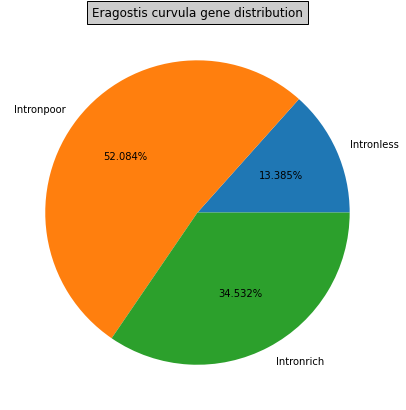

In [122]:
plotting_intron_types(7609, 29609, 19631, 'Eragostis curvula gene distribution')

In [123]:
### --- Creating the list of e_curvula gene IDs to check the number of transcripts using command line
intronless_file = open('Output/e_curvula_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/e_curvula_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/e_curvula_intronrichIDs.txt', 'a')
for i in range(len(intronless_e_curvula)):
    if i == len(intronless_e_curvula) -1:
        intronless_file.write(intronless_e_curvula[i])
    else:
        intronless_file.write(intronless_e_curvula[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_e_curvula)):
    if i == len(intronpoor_e_curvula) -1:
        intronpoor_file.write(intronpoor_e_curvula[i])
    else:
        intronpoor_file.write(intronpoor_e_curvula[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_e_curvula)):
    if i == len(intronrich_e_curvula) -1:
        intronrich_file.write(intronrich_e_curvula[i])
    else:
        intronrich_file.write(intronrich_e_curvula[i]+'\n')
intronrich_file.close()


# Eragrostis tef Ensembl 52

In [132]:
### --- Function to count introns within a dataframe made of exons formatted like exon_e_tef
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['.'.join(i.split('.')[:2])] = counts.get('.'.join(i.split('.')[:2]), 0) + 1
    return counts

In [124]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_e_tef = pd.read_csv('Data/Eragrostis_tef.ASM97063v1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_e_tef[df_e_tef['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,scaffold105,TPI,gene,641524,644522,.,+,.,ID=gene:Et_s105-6.39-2.path1;biotype=protein_coding;gene_id=Et_s105-6.39-2.path1;logic_name=tefftip
2,scaffold105,TPI,gene,310915,312497,.,-,.,ID=gene:Et_s105-3.44-1.path1;biotype=protein_coding;gene_id=Et_s105-3.44-1.path1;logic_name=tefftip
3,scaffold105,TPI,gene,549727,553673,.,+,.,ID=gene:Et_s105-5.56-1.path1;biotype=protein_coding;gene_id=Et_s105-5.56-1.path1;logic_name=tefftip
4,scaffold105,TPI,gene,356683,359359,.,-,.,ID=gene:Et_s105-3.48-1.path1;biotype=protein_coding;gene_id=Et_s105-3.48-1.path1;logic_name=tefftip
5,scaffold105,TPI,gene,233234,233669,.,-,.,ID=gene:Et_s105-2.55-1.path1;biotype=protein_coding;gene_id=Et_s105-2.55-1.path1;logic_name=tefftip
...,...,...,...,...,...,...,...,...,...
761097,scaffold1964,TPI,gene,26,331,.,-,.,ID=gene:Et_s1964-0.0-1.path1;biotype=protein_coding;gene_id=Et_s1964-0.0-1.path1;logic_name=tefftip
761113,scaffold4705,TPI,gene,36,364,.,+,.,ID=gene:Et_s4705-0.1-1.path1;biotype=protein_coding;gene_id=Et_s4705-0.1-1.path1;logic_name=tefftip
761121,scaffold9165,TPI,gene,36,362,.,+,.,ID=gene:Et_s9165-0.1-1.path1;biotype=protein_coding;gene_id=Et_s9165-0.1-1.path1;logic_name=tefftip
761128,scaffold17816,TPI,gene,1,186,.,+,.,ID=gene:Et_s17816-0.0-1.path1;biotype=protein_coding;gene_id=Et_s17816-0.0-1.path1;logic_name=tefftip


In [125]:
### --- Building a separate dataframe containing all exons
exon_e_tef = df_e_tef.loc[df_e_tef['type'].isin(['exon'])]
exon_e_tef.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
197,scaffold105,TPI,exon,641524,641986,.,+,.,Name=Et_s105-6.39-2.mrna1-E1;Parent=transcript:Et_s105-6.39-2.mrna1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Et_s105-6.39-2.mrna1-E1;rank=1
198,scaffold105,TPI,exon,642121,642641,.,+,.,Name=Et_s105-6.39-2.mrna1-E2;Parent=transcript:Et_s105-6.39-2.mrna1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Et_s105-6.39-2.mrna1-E2;rank=2
199,scaffold105,TPI,exon,642735,643422,.,+,.,Name=Et_s105-6.39-2.mrna1-E3;Parent=transcript:Et_s105-6.39-2.mrna1;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=Et_s105-6.39-2.mrna1-E3;rank=3
200,scaffold105,TPI,exon,643670,643861,.,+,.,Name=Et_s105-6.39-2.mrna1-E4;Parent=transcript:Et_s105-6.39-2.mrna1;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=Et_s105-6.39-2.mrna1-E4;rank=4
201,scaffold105,TPI,exon,644058,644522,.,+,.,Name=Et_s105-6.39-2.mrna1-E5;Parent=transcript:Et_s105-6.39-2.mrna1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=Et_s105-6.39-2.mrna1-E5;rank=5
202,scaffold105,TPI,exon,312338,312497,.,-,.,Name=Et_s105-3.44-1.mrna1-E1;Parent=transcript:Et_s105-3.44-1.mrna1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=Et_s105-3.44-1.mrna1-E1;rank=1
203,scaffold105,TPI,exon,312006,312076,.,-,.,Name=Et_s105-3.44-1.mrna1-E2;Parent=transcript:Et_s105-3.44-1.mrna1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=Et_s105-3.44-1.mrna1-E2;rank=2
204,scaffold105,TPI,exon,311776,311895,.,-,.,Name=Et_s105-3.44-1.mrna1-E3;Parent=transcript:Et_s105-3.44-1.mrna1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Et_s105-3.44-1.mrna1-E3;rank=3
205,scaffold105,TPI,exon,311576,311694,.,-,.,Name=Et_s105-3.44-1.mrna1-E4;Parent=transcript:Et_s105-3.44-1.mrna1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=Et_s105-3.44-1.mrna1-E4;rank=4
206,scaffold105,TPI,exon,311384,311465,.,-,.,Name=Et_s105-3.44-1.mrna1-E5;Parent=transcript:Et_s105-3.44-1.mrna1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=Et_s105-3.44-1.mrna1-E5;rank=5


In [127]:
### --- Exporting the exon dataframe to a tsv file 
exon_e_tef.to_csv('Data/Eragrostis_tef.ASM97063v1.52_EXON',sep='\t',index=False,header=False)

In [133]:
### --- Counting introns type
introns_dictionary_e_tef = counting_introns_type(exon_e_tef)

In [134]:
n_intronless_e_tef, n_intronpoor_e_tef, n_intronrich_e_tef, intronless_e_tef, intronpoor_e_tef, intronrich_e_tef = splitting_introns_type(introns_dictionary_e_tef)

Intronless are: 2713
Intronpoor are: 17135
Intronrich are: 22072


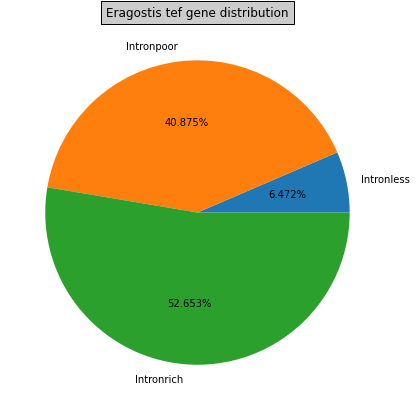

In [135]:
plotting_intron_types(2713, 17135, 22072, 'Eragostis tef gene distribution')

In [136]:
### --- Creating the list of e_tef gene IDs to check the number of transcripts using command line
intronless_file = open('Output/e_tef_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/e_tef_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/e_tef_intronrichIDs.txt', 'a')
for i in range(len(intronless_e_tef)):
    if i == len(intronless_e_tef) -1:
        intronless_file.write(intronless_e_tef[i])
    else:
        intronless_file.write(intronless_e_tef[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_e_tef)):
    if i == len(intronpoor_e_tef) -1:
        intronpoor_file.write(intronpoor_e_tef[i])
    else:
        intronpoor_file.write(intronpoor_e_tef[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_e_tef)):
    if i == len(intronrich_e_tef) -1:
        intronrich_file.write(intronrich_e_tef[i])
    else:
        intronrich_file.write(intronrich_e_tef[i]+'\n')
intronrich_file.close()


# Hordeum vulgare goldenpromise Ensembl 52

In [177]:
### --- Function to count introns within a dataframe made of exons formatted like exon_Hv_goldenpromise
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['.'.join(i.split('.')[0:4])] = counts.get('.'.join(i.split('.')[0:4]), 0) + 1
    return counts

In [145]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_Hv_goldenpromise = pd.read_csv('Data/Hordeum_vulgare_goldenpromise.GPv1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_Hv_goldenpromise[df_Hv_goldenpromise['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,contig1,TRITEX,gene,89964,90554,.,+,.,ID=gene:HORVU.MOREX.r2.1HG0000220.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000220.1;logic_name=gff3_genes
8,contig1,TRITEX,gene,93936,94211,.,-,.,ID=gene:HORVU.MOREX.r2.1HG0000210.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000210.1;logic_name=gff3_genes
12,contig1,TRITEX,gene,138070,143063,.,-,.,ID=gene:HORVU.MOREX.r2.1HG0000200.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000200.1;logic_name=gff3_genes
30,contig1,TRITEX,gene,354287,354784,.,-,.,ID=gene:HORVU.MOREX.r2.6HG0454130.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.6HG0454130.1;logic_name=gff3_genes
34,contig1,TRITEX,gene,354287,355875,.,-,.,ID=gene:HORVU.MOREX.r2.1HG0000190.1;biotype=nontranslating_CDS;gene_id=HORVU.MOREX.r2.1HG0000190.1;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
509453,contig8,TRITEX,gene,268312441,268312652,.,-,.,ID=gene:HORVU.MOREX.r2.3HG0260760.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.3HG0260760.1;logic_name=gff3_genes
509458,contig8,TRITEX,gene,268443169,268443524,.,-,.,ID=gene:HORVU.MOREX.r2.UnG0634140.1;biotype=nontranslating_CDS;gene_id=HORVU.MOREX.r2.UnG0634140.1;logic_name=gff3_genes
509461,contig8,TRITEX,gene,268912259,268912645,.,-,.,ID=gene:HORVU.MOREX.r2.5HG0371900.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.5HG0371900.1;logic_name=gff3_genes
509465,contig8,TRITEX,gene,269055622,269055837,.,-,.,ID=gene:HORVU.MOREX.r2.7HG0543470.1;biotype=protein_coding;gene_id=HORVU.MOREX.r2.7HG0543470.1;logic_name=gff3_genes


In [139]:
### --- Building a separate dataframe containing all exons
exon_Hv_goldenpromise = df_Hv_goldenpromise.loc[df_Hv_goldenpromise['type'].isin(['exon'])]
exon_Hv_goldenpromise.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,contig1,TRITEX,exon,89964,90165,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000220.1.mrna1;Name=HORVU.MOREX.r2.1HG0000220.1.mrna1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=HORVU.MOREX.r2.1HG0000220.1.mrna1-E1;rank=1
6,contig1,TRITEX,exon,90318,90554,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000220.1.mrna1;Name=HORVU.MOREX.r2.1HG0000220.1.mrna1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000220.1.mrna1-E2;rank=2
10,contig1,TRITEX,exon,93936,94211,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000210.1.mrna1;Name=HORVU.MOREX.r2.1HG0000210.1.mrna1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000210.1.mrna1-E1;rank=1
14,contig1,TRITEX,exon,138070,138280,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E8;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E8;rank=8
16,contig1,TRITEX,exon,138360,138724,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E7;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E7;rank=7
18,contig1,TRITEX,exon,139158,139239,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E6;rank=6
20,contig1,TRITEX,exon,139330,139497,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E5;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E5;rank=5
22,contig1,TRITEX,exon,139957,140259,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E4;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E4;rank=4
24,contig1,TRITEX,exon,140325,140530,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E3;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E3;rank=3
26,contig1,TRITEX,exon,142723,142826,.,-,.,Parent=transcript:HORVU.MOREX.r2.1HG0000200.1.mrna1;Name=HORVU.MOREX.r2.1HG0000200.1.mrna1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=HORVU.MOREX.r2.1HG0000200.1.mrna1-E2;rank=2


In [140]:
### --- Exporting the exon dataframe to a tsv file 
exon_Hv_goldenpromise.to_csv('Data/Hordeum_vulgare_goldenpromise.GPv1.52_EXON',sep='\t',index=False,header=False)

In [178]:
### --- Counting introns type
introns_dictionary_Hv_goldenpromise = counting_introns_type(exon_Hv_goldenpromise)

In [179]:
n_intronless_Hv_goldenpromise, n_intronpoor_Hv_goldenpromise, n_intronrich_Hv_goldenpromise, intronless_Hv_goldenpromise, intronpoor_Hv_goldenpromise, intronrich_Hv_goldenpromise = splitting_introns_type(introns_dictionary_Hv_goldenpromise)

Intronless are: 31874
Intronpoor are: 18351
Intronrich are: 11843


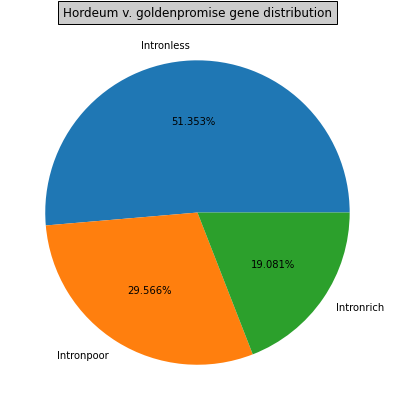

In [168]:
plotting_intron_types(31874, 18351, 11843, 'Hordeum v. goldenpromise gene distribution')

In [147]:
### --- Creating the list of Hv_goldenpromise gene IDs to check the number of transcripts using command line
intronless_file = open('Output/Hv_goldenpromise_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/Hv_goldenpromise_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/Hv_goldenpromise_intronrichIDs.txt', 'a')
for i in range(len(intronless_Hv_goldenpromise)):
    if i == len(intronless_Hv_goldenpromise) -1:
        intronless_file.write(intronless_Hv_goldenpromise[i])
    else:
        intronless_file.write(intronless_Hv_goldenpromise[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_Hv_goldenpromise)):
    if i == len(intronpoor_Hv_goldenpromise) -1:
        intronpoor_file.write(intronpoor_Hv_goldenpromise[i])
    else:
        intronpoor_file.write(intronpoor_Hv_goldenpromise[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_Hv_goldenpromise)):
    if i == len(intronrich_Hv_goldenpromise) -1:
        intronrich_file.write(intronrich_Hv_goldenpromise[i])
    else:
        intronrich_file.write(intronrich_Hv_goldenpromise[i]+'\n')
intronrich_file.close()


# Hordeum vulgare Morex Ensembl 52

In [180]:
### --- Function to count introns within a dataframe made of exons formatted like exon_Hv_goldenpromise
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['.'.join(i.split(';')[1].split('.')[:4])] = counts.get('.'.join(i.split(';')[1].split('.')[:4]), 0) + 1
    return counts

In [149]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_Hv_morex = pd.read_csv('Data/Hordeum_vulgare.MorexV3_pseudomolecules_assembly.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_Hv_morex[df_Hv_morex['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,2H,IPK,gene,601169528,601171444,.,-,.,ID=gene:HORVU.MOREX.r3.2HG0191020;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0191020;logic_name=ipk_genes_hc
2,2H,IPK,gene,161203690,161204337,.,-,.,ID=gene:HORVU.MOREX.r3.2HG0134140;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0134140;logic_name=ipk_genes_hc
3,2H,IPK,gene,248838563,248839490,.,+,.,ID=gene:HORVU.MOREX.r3.2HG0144470;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0144470;logic_name=ipk_genes_hc
4,2H,IPK,gene,662058557,662059219,.,-,.,ID=gene:HORVU.MOREX.r3.2HG0217070;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0217070;logic_name=ipk_genes_hc
5,2H,IPK,gene,198195090,198195944,.,+,.,ID=gene:HORVU.MOREX.r3.2HG0138770;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0138770;logic_name=ipk_genes_hc
...,...,...,...,...,...,...,...,...,...
447917,CAJHDD010000279.1,IPK,gene,44998,45544,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0767540;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0767540;logic_name=ipk_genes_hc
447918,CAJHDD010000279.1,IPK,gene,8343,9035,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0815450;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0815450;logic_name=ipk_genes_hc
447919,CAJHDD010000279.1,IPK,gene,43517,43951,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0770320;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0770320;logic_name=ipk_genes_hc
447943,CAJHDD010000281.1,IPK,gene,38389,39924,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0767090;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0767090;logic_name=ipk_genes_hc


In [152]:
df_Hv_morex[df_Hv_morex['attributes'].str.contains("ipk_genes_hc")]

,chr,source,type,start,end,score,strand,phase,attributes
1,2H,IPK,gene,601169528,601171444,.,-,.,ID=gene:HORVU.MOREX.r3.2HG0191020;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0191020;logic_name=ipk_genes_hc
2,2H,IPK,gene,161203690,161204337,.,-,.,ID=gene:HORVU.MOREX.r3.2HG0134140;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0134140;logic_name=ipk_genes_hc
3,2H,IPK,gene,248838563,248839490,.,+,.,ID=gene:HORVU.MOREX.r3.2HG0144470;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0144470;logic_name=ipk_genes_hc
4,2H,IPK,gene,662058557,662059219,.,-,.,ID=gene:HORVU.MOREX.r3.2HG0217070;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0217070;logic_name=ipk_genes_hc
5,2H,IPK,gene,198195090,198195944,.,+,.,ID=gene:HORVU.MOREX.r3.2HG0138770;biotype=protein_coding;gene_id=HORVU.MOREX.r3.2HG0138770;logic_name=ipk_genes_hc
...,...,...,...,...,...,...,...,...,...
447917,CAJHDD010000279.1,IPK,gene,44998,45544,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0767540;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0767540;logic_name=ipk_genes_hc
447918,CAJHDD010000279.1,IPK,gene,8343,9035,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0815450;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0815450;logic_name=ipk_genes_hc
447919,CAJHDD010000279.1,IPK,gene,43517,43951,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0770320;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0770320;logic_name=ipk_genes_hc
447943,CAJHDD010000281.1,IPK,gene,38389,39924,.,+,.,ID=gene:HORVU.MOREX.r3.UnG0767090;biotype=protein_coding;gene_id=HORVU.MOREX.r3.UnG0767090;logic_name=ipk_genes_hc


In [153]:
### --- Building a separate dataframe containing all exons
exon_Hv_morex = df_Hv_morex.loc[df_Hv_morex['type'].isin(['exon'])]
exon_Hv_morex.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
11967,2H,IPK,exon,601169754,601171444,.,-,.,Name=HORVU.MOREX.r3.2HG0191020.1-E1;Parent=transcript:HORVU.MOREX.r3.2HG0191020.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0191020.1-E1;rank=1
11968,2H,IPK,exon,601169528,601169669,.,-,.,Name=HORVU.MOREX.r3.2HG0191020.1-E2;Parent=transcript:HORVU.MOREX.r3.2HG0191020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=HORVU.MOREX.r3.2HG0191020.1-E2;rank=2
11969,2H,IPK,exon,161203690,161204337,.,-,.,Name=HORVU.MOREX.r3.2HG0134140.1-E1;Parent=transcript:HORVU.MOREX.r3.2HG0134140.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0134140.1-E1;rank=1
11970,2H,IPK,exon,248838563,248838913,.,+,.,Name=HORVU.MOREX.r3.2HG0144470.1-E1;Parent=transcript:HORVU.MOREX.r3.2HG0144470.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0144470.1-E1;rank=1
11971,2H,IPK,exon,248839003,248839155,.,+,.,Name=HORVU.MOREX.r3.2HG0144470.1-E2;Parent=transcript:HORVU.MOREX.r3.2HG0144470.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0144470.1-E2;rank=2
11972,2H,IPK,exon,248839250,248839312,.,+,.,Name=HORVU.MOREX.r3.2HG0144470.1-E3;Parent=transcript:HORVU.MOREX.r3.2HG0144470.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0144470.1-E3;rank=3
11973,2H,IPK,exon,248839389,248839490,.,+,.,Name=HORVU.MOREX.r3.2HG0144470.1-E4;Parent=transcript:HORVU.MOREX.r3.2HG0144470.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0144470.1-E4;rank=4
11974,2H,IPK,exon,662058557,662059219,.,-,.,Name=HORVU.MOREX.r3.2HG0217070.1-E1;Parent=transcript:HORVU.MOREX.r3.2HG0217070.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0217070.1-E1;rank=1
11975,2H,IPK,exon,198195090,198195944,.,+,.,Name=HORVU.MOREX.r3.2HG0138770.1-E1;Parent=transcript:HORVU.MOREX.r3.2HG0138770.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0138770.1-E1;rank=1
11976,2H,IPK,exon,60946970,60947225,.,-,.,Name=HORVU.MOREX.r3.2HG0118030.1-E1;Parent=transcript:HORVU.MOREX.r3.2HG0118030.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=HORVU.MOREX.r3.2HG0118030.1-E1;rank=1


In [154]:
### --- Exporting the exon dataframe to a tsv file 
exon_Hv_morex.to_csv('Data/Hordeum_vulgare.MorexV3_pseudomolecules_assembly.52_EXON',sep='\t',index=False,header=False)

In [181]:
### --- Counting introns type
introns_dictionary_Hv_morex = counting_introns_type(exon_Hv_morex)

In [182]:
n_intronless_Hv_morex, n_intronpoor_Hv_morex, n_intronrich_Hv_morex, intronless_Hv_morex, intronpoor_Hv_morex, intronrich_Hv_morex = splitting_introns_type(introns_dictionary_Hv_morex)

Intronless are: 11537
Intronpoor are: 12996
Intronrich are: 11293


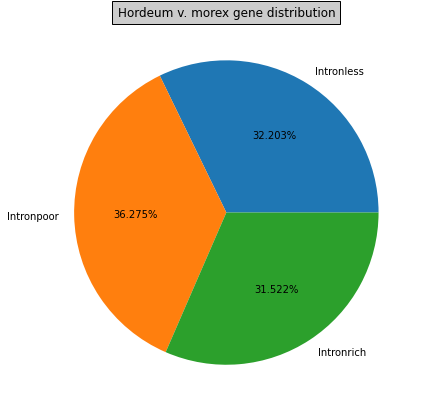

In [183]:
plotting_intron_types(11537, 12996, 11293, 'Hordeum v. morex gene distribution')

In [184]:
### --- Creating the list of Hv_morex gene IDs to check the number of transcripts using command line
intronless_file = open('Output/Hv_morex_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/Hv_morex_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/Hv_morex_intronrichIDs.txt', 'a')
for i in range(len(intronless_Hv_morex)):
    if i == len(intronless_Hv_morex) -1:
        intronless_file.write(intronless_Hv_morex[i])
    else:
        intronless_file.write(intronless_Hv_morex[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_Hv_morex)):
    if i == len(intronpoor_Hv_morex) -1:
        intronpoor_file.write(intronpoor_Hv_morex[i])
    else:
        intronpoor_file.write(intronpoor_Hv_morex[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_Hv_morex)):
    if i == len(intronrich_Hv_morex) -1:
        intronrich_file.write(intronrich_Hv_morex[i])
    else:
        intronrich_file.write(intronrich_Hv_morex[i]+'\n')
intronrich_file.close()


# Hordeum vulgare tritex morex Ensembl 52

In [187]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['.'.join(i.split('.')[:4])] = counts.get('.'.join(i.split('.')[:4]), 0) + 1
    return counts

In [185]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_Hv_tritex_morex = pd.read_csv('Data/Hordeum_vulgare_tritex.Morex_V2_scaf.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_Hv_tritex_morex[df_Hv_tritex_morex['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1H,IPK,gene,142445,147518,.,+,.,ID=gene:HORVU.MOREX.r2.1HG0000020;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000020;logic_name=gff3_genes
25,1H,IPK,gene,154960,159625,.,+,.,ID=gene:HORVU.MOREX.r2.1HG0000030;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000030;logic_name=gff3_genes
35,1H,IPK,gene,161665,164314,.,+,.,ID=gene:HORVU.MOREX.r2.1HG0000040;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000040;logic_name=gff3_genes
49,1H,IPK,gene,165513,168763,.,-,.,ID=gene:HORVU.MOREX.r2.1HG0000050;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000050;logic_name=gff3_genes
67,1H,IPK,gene,173290,174521,.,-,.,ID=gene:HORVU.MOREX.r2.1HG0000060;biotype=protein_coding;gene_id=HORVU.MOREX.r2.1HG0000060;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
355647,7H,IPK,gene,634279011,634280025,.,-,.,ID=gene:HORVU.MOREX.r2.7HG0624070;biotype=protein_coding;gene_id=HORVU.MOREX.r2.7HG0624070;logic_name=gff3_genes
355653,7H,IPK,gene,634292972,634293438,.,-,.,ID=gene:HORVU.MOREX.r2.7HG0624080;biotype=protein_coding;gene_id=HORVU.MOREX.r2.7HG0624080;logic_name=gff3_genes
355659,7H,IPK,gene,634342240,634342706,.,-,.,ID=gene:HORVU.MOREX.r2.7HG0624090;biotype=protein_coding;gene_id=HORVU.MOREX.r2.7HG0624090;logic_name=gff3_genes
355665,7H,IPK,gene,634481071,634482504,.,+,.,ID=gene:HORVU.MOREX.r2.7HG0624100;biotype=protein_coding;gene_id=HORVU.MOREX.r2.7HG0624100;logic_name=gff3_genes


In [186]:
### --- Building a separate dataframe containing all exons
exon_Hv_tritex_morex = df_Hv_tritex_morex.loc[df_Hv_tritex_morex['type'].isin(['exon'])]
exon_Hv_tritex_morex.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,1H,IPK,exon,142445,142903,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E1;rank=1
5,1H,IPK,exon,143335,144686,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E2;rank=2
7,1H,IPK,exon,144801,144911,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E3;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000020.1-E3;rank=3
9,1H,IPK,exon,145022,145298,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000020.1-E4;rank=4
11,1H,IPK,exon,145393,145481,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E5;rank=5
13,1H,IPK,exon,145568,145676,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=HORVU.MOREX.r2.1HG0000020.1-E6;rank=6
15,1H,IPK,exon,145823,146026,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E7;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E7;rank=7
17,1H,IPK,exon,146117,146341,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E8;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E8;rank=8
19,1H,IPK,exon,146447,146638,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E9;rank=9
21,1H,IPK,exon,146728,147014,.,+,.,Parent=transcript:HORVU.MOREX.r2.1HG0000020.1;Name=HORVU.MOREX.r2.1HG0000020.1-E10;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=HORVU.MOREX.r2.1HG0000020.1-E10;rank=10


In [188]:
### --- Exporting the exon dataframe to a tsv file 
exon_Hv_tritex_morex.to_csv('Data/Hordeum_vulgare_tritex.Morex_V2_scaf.52_EXON',sep='\t',index=False,header=False)

In [189]:
### --- Counting introns type
introns_dictionary_Hv_tritex_morex = counting_introns_type(exon_Hv_tritex_morex)

In [190]:
n_intronless_Hv_tritex_morex, n_intronpoor_Hv_tritex_morex, n_intronrich_Hv_tritex_morex, intronless_Hv_tritex_morex, intronpoor_Hv_tritex_morex, intronrich_Hv_tritex_morex = splitting_introns_type(introns_dictionary_Hv_tritex_morex)

Intronless are: 9988
Intronpoor are: 11307
Intronrich are: 10864


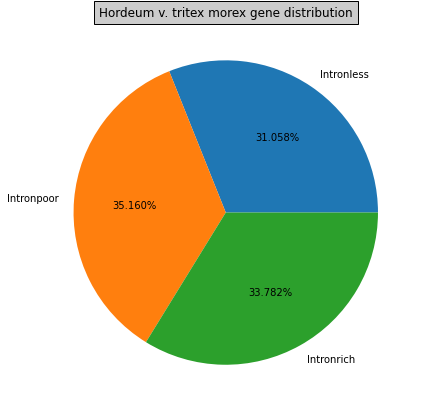

In [191]:
plotting_intron_types(9988, 11307, 10864, 'Hordeum v. tritex morex gene distribution')

In [192]:
### --- Creating the list of Hv_tritex_morex gene IDs to check the number of transcripts using command line
intronless_file = open('Output/Hv_tritex_morex_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/Hv_tritex_morex_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/Hv_tritex_morex_intronrichIDs.txt', 'a')
for i in range(len(intronless_Hv_tritex_morex)):
    if i == len(intronless_Hv_tritex_morex) -1:
        intronless_file.write(intronless_Hv_tritex_morex[i])
    else:
        intronless_file.write(intronless_Hv_tritex_morex[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_Hv_tritex_morex)):
    if i == len(intronpoor_Hv_tritex_morex) -1:
        intronpoor_file.write(intronpoor_Hv_tritex_morex[i])
    else:
        intronpoor_file.write(intronpoor_Hv_tritex_morex[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_Hv_tritex_morex)):
    if i == len(intronrich_Hv_tritex_morex) -1:
        intronrich_file.write(intronrich_Hv_tritex_morex[i])
    else:
        intronrich_file.write(intronrich_Hv_tritex_morex[i]+'\n')
intronrich_file.close()


# Leersia perrieri Ensembl 52

In [195]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [193]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_l_perrieri = pd.read_csv('Data/Leersia_perrieri.Lperr_V1.4.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_l_perrieri[df_l_perrieri['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,5300,10998,.,+,.,ID=gene:LPERR01G00010;biotype=protein_coding;gene_id=LPERR01G00010;logic_name=oge_maker_genes
26,1,oge,gene,11136,21882,.,+,.,ID=gene:LPERR01G00020;biotype=protein_coding;gene_id=LPERR01G00020;logic_name=oge_maker_genes
120,1,oge,gene,23164,27404,.,+,.,ID=gene:LPERR01G00030;biotype=protein_coding;gene_id=LPERR01G00030;logic_name=oge_maker_genes
140,1,oge,gene,29005,33375,.,+,.,ID=gene:LPERR01G00040;biotype=protein_coding;gene_id=LPERR01G00040;logic_name=oge_maker_genes
156,1,oge,gene,33568,35397,.,+,.,ID=gene:LPERR01G00050;biotype=protein_coding;gene_id=LPERR01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
599531,9,oge,gene,15510711,15516475,.,-,.,ID=gene:LPERR09G16460;biotype=protein_coding;gene_id=LPERR09G16460;logic_name=oge_maker_genes
599537,9,oge,gene,15516575,15521800,.,+,.,ID=gene:LPERR09G16470;biotype=protein_coding;gene_id=LPERR09G16470;logic_name=oge_maker_genes
599670,9,oge,gene,15522451,15522971,.,-,.,ID=gene:LPERR09G16480;biotype=protein_coding;gene_id=LPERR09G16480;logic_name=oge_maker_genes
599676,9,oge,gene,15523513,15523986,.,-,.,ID=gene:LPERR09G16490;biotype=protein_coding;gene_id=LPERR09G16490;logic_name=oge_maker_genes


In [194]:
### --- Building a separate dataframe containing all exons
exon_l_perrieri = df_l_perrieri.loc[df_l_perrieri['type'].isin(['exon'])]
exon_l_perrieri.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,1,oge,exon,5300,5518,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=LPERR01G00010.1.exon1;rank=1
5,1,oge,exon,5663,5772,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon2;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=LPERR01G00010.1.exon2;rank=2
7,1,oge,exon,5858,5915,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon3;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=LPERR01G00010.1.exon3;rank=3
9,1,oge,exon,6452,6715,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=LPERR01G00010.1.exon4;rank=4
11,1,oge,exon,6785,6922,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon5;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=LPERR01G00010.1.exon5;rank=5
13,1,oge,exon,6999,7050,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon6;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=LPERR01G00010.1.exon6;rank=6
15,1,oge,exon,7127,7206,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon7;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=LPERR01G00010.1.exon7;rank=7
17,1,oge,exon,8677,8736,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon8;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=LPERR01G00010.1.exon8;rank=8
19,1,oge,exon,9650,9730,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=LPERR01G00010.1.exon9;rank=9
22,1,oge,exon,9897,10464,.,+,.,Parent=transcript:LPERR01G00010.1;Name=LPERR01G00010.1.exon10;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=LPERR01G00010.1.exon10;rank=10


In [196]:
### --- Exporting the exon dataframe to a tsv file 
exon_l_perrieri.to_csv('Data/Leersia_perrieri.Lperr_V1.4.52_EXON',sep='\t',index=False,header=False)

In [197]:
### --- Counting introns type
introns_dictionary_l_perrieri = counting_introns_type(exon_l_perrieri)

In [198]:
n_intronless_l_perrieri, n_intronpoor_l_perrieri, n_intronrich_l_perrieri, intronless_l_perrieri, intronpoor_l_perrieri, intronrich_l_perrieri = splitting_introns_type(introns_dictionary_l_perrieri)

Intronless are: 6287
Intronpoor are: 10737
Intronrich are: 12972


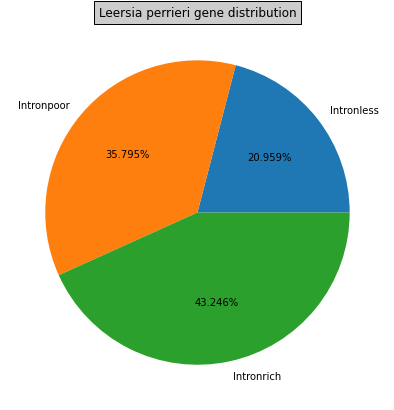

In [199]:
plotting_intron_types(6287,10737,12972, 'Leersia perrieri gene distribution')

In [200]:
### --- Creating the list of l_perrieri gene IDs to check the number of transcripts using command line
intronless_file = open('Output/l_perrieri_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/l_perrieri_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/l_perrieri_intronrichIDs.txt', 'a')
for i in range(len(intronless_l_perrieri)):
    if i == len(intronless_l_perrieri) -1:
        intronless_file.write(intronless_l_perrieri[i])
    else:
        intronless_file.write(intronless_l_perrieri[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_l_perrieri)):
    if i == len(intronpoor_l_perrieri) -1:
        intronpoor_file.write(intronpoor_l_perrieri[i])
    else:
        intronpoor_file.write(intronpoor_l_perrieri[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_l_perrieri)):
    if i == len(intronrich_l_perrieri) -1:
        intronrich_file.write(intronrich_l_perrieri[i])
    else:
        intronrich_file.write(intronrich_l_perrieri[i]+'\n')
intronrich_file.close()


# Musa acuminata Ensembl 52

In [215]:
### --- Function to count introns within a dataframe made of exons formatted like exon_m_acuminata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [202]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_m_acuminata = pd.read_csv('Data/Musa_acuminata.Musa_acuminata_v2.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_m_acuminata[df_m_acuminata['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,CAJGYN010000001.1,BGH,gene,3136,5915,.,+,.,ID=gene:Ma01_g00010;biotype=protein_coding;gene_id=Ma01_g00010;logic_name=gff3_genes
12,CAJGYN010000001.1,BGH,gene,8852,10800,.,+,.,ID=gene:Ma01_g00020;biotype=protein_coding;gene_id=Ma01_g00020;logic_name=gff3_genes
26,CAJGYN010000001.1,BGH,gene,12447,30055,.,-,.,ID=gene:Ma01_g00030;biotype=protein_coding;gene_id=Ma01_g00030;logic_name=gff3_genes
52,CAJGYN010000001.1,BGH,gene,35967,44143,.,+,.,ID=gene:Ma01_g00040;biotype=protein_coding;description=DNA topoisomerase 6 subunit B [Source:Projected from Arabidopsis thaliana (AT3G20780) UniProtKB/Swiss-Prot%3BAcc:Q9C5V6];gene_id=Ma01_g00040;logic_name=gff3_genes
94,CAJGYN010000001.1,BGH,gene,46841,50505,.,+,.,ID=gene:Ma01_g00050;biotype=protein_coding;gene_id=Ma01_g00050;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
697651,CAJGYN010000024.1,BGH,gene,46270934,46271148,.,+,.,ID=gene:Ma00_g05390;biotype=protein_coding;gene_id=Ma00_g05390;logic_name=gff3_genes
697657,CAJGYN010000024.1,BGH,gene,46386497,46387337,.,-,.,ID=gene:Ma00_g05400;biotype=protein_coding;gene_id=Ma00_g05400;logic_name=gff3_genes
697663,CAJGYN010000024.1,BGH,gene,46431434,46432271,.,+,.,ID=gene:Ma00_g05410;biotype=protein_coding;gene_id=Ma00_g05410;logic_name=gff3_genes
697673,CAJGYN010000024.1,BGH,gene,46436551,46437716,.,-,.,ID=gene:Ma00_g05420;biotype=protein_coding;gene_id=Ma00_g05420;logic_name=gff3_genes


In [203]:
### --- Building a separate dataframe containing all exons
exon_m_acuminata = df_m_acuminata.loc[df_m_acuminata['type'].isin(['exon'])]
exon_m_acuminata.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,CAJGYN010000001.1,BGH,exon,3136,3237,.,+,.,Parent=transcript:Ma01_t00010.1;Name=Ma01_t00010.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Ma01_t00010.1-E1;rank=1
5,CAJGYN010000001.1,BGH,exon,3576,3812,.,+,.,Parent=transcript:Ma01_t00010.1;Name=Ma01_t00010.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Ma01_t00010.1-E2;rank=2
7,CAJGYN010000001.1,BGH,exon,3904,3951,.,+,.,Parent=transcript:Ma01_t00010.1;Name=Ma01_t00010.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Ma01_t00010.1-E3;rank=3
10,CAJGYN010000001.1,BGH,exon,5432,5915,.,+,.,Parent=transcript:Ma01_t00010.1;Name=Ma01_t00010.1-E4;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=Ma01_t00010.1-E4;rank=4
14,CAJGYN010000001.1,BGH,exon,8852,8872,.,+,.,Parent=transcript:Ma01_t00020.1;Name=Ma01_t00020.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Ma01_t00020.1-E1;rank=1
17,CAJGYN010000001.1,BGH,exon,8987,9566,.,+,.,Parent=transcript:Ma01_t00020.1;Name=Ma01_t00020.1-E2;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=Ma01_t00020.1-E2;rank=2
19,CAJGYN010000001.1,BGH,exon,9658,9798,.,+,.,Parent=transcript:Ma01_t00020.1;Name=Ma01_t00020.1-E3;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=Ma01_t00020.1-E3;rank=3
21,CAJGYN010000001.1,BGH,exon,9868,10024,.,+,.,Parent=transcript:Ma01_t00020.1;Name=Ma01_t00020.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=Ma01_t00020.1-E4;rank=4
24,CAJGYN010000001.1,BGH,exon,10110,10800,.,+,.,Parent=transcript:Ma01_t00020.1;Name=Ma01_t00020.1-E5;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=Ma01_t00020.1-E5;rank=5
29,CAJGYN010000001.1,BGH,exon,12447,13156,.,-,.,Parent=transcript:Ma01_t00030.1;Name=Ma01_t00030.1-E11;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=Ma01_t00030.1-E11;rank=11


In [205]:
### --- Exporting the exon dataframe to a tsv file 
exon_m_acuminata.to_csv('Data/Musa_acuminata.Musa_acuminata_v2.52_EXON',sep='\t',index=False,header=False)

In [206]:
### --- Counting introns type
introns_dictionary_m_acuminata = counting_introns_type(exon_m_acuminata)

In [217]:
n_intronless_m_acuminata, n_intronpoor_m_acuminata, n_intronrich_m_acuminata, intronless_m_acuminata, intronpoor_m_acuminata, intronrich_m_acuminata = splitting_introns_type(introns_dictionary_m_acuminata)

Intronless are: 6311
Intronpoor are: 12751
Intronrich are: 16213


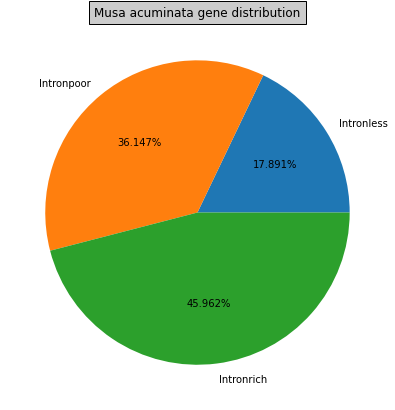

In [218]:
plotting_intron_types(6311,12751,16213, 'Musa acuminata gene distribution')

In [219]:
### --- Creating the list of m_acuminata gene IDs to check the number of transcripts using command line
intronless_file = open('Output/m_acuminata_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/m_acuminata_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/m_acuminata_intronrichIDs.txt', 'a')
for i in range(len(intronless_m_acuminata)):
    if i == len(intronless_m_acuminata) -1:
        intronless_file.write(intronless_m_acuminata[i])
    else:
        intronless_file.write(intronless_m_acuminata[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_m_acuminata)):
    if i == len(intronpoor_m_acuminata) -1:
        intronpoor_file.write(intronpoor_m_acuminata[i])
    else:
        intronpoor_file.write(intronpoor_m_acuminata[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_m_acuminata)):
    if i == len(intronrich_m_acuminata) -1:
        intronrich_file.write(intronrich_m_acuminata[i])
    else:
        intronrich_file.write(intronrich_m_acuminata[i]+'\n')
intronrich_file.close()


# Oryza barthii Ensembl 52

In [223]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [221]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_barthii = pd.read_csv('Data/Oryza_barthii.O.barthii_v1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_barthii[df_o_barthii['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,3176,11190,.,+,.,ID=gene:OBART01G00010;biotype=protein_coding;gene_id=OBART01G00010;logic_name=oge_maker_genes
2,1,oge,gene,11638,12651,.,-,.,ID=gene:OBART01G00020;biotype=protein_coding;gene_id=OBART01G00020;logic_name=oge_maker_genes
3,1,oge,gene,12242,12747,.,+,.,ID=gene:OBART01G00030;biotype=protein_coding;gene_id=OBART01G00030;logic_name=oge_maker_genes
4,1,oge,gene,15240,18493,.,+,.,ID=gene:OBART01G00040;biotype=protein_coding;description=SKU5 similar 3 [Source:Projected from Arabidopsis thaliana (AT5G48450) TAIR%3BAcc:AT5G48450];gene_id=OBART01G00040;logic_name=oge_maker_genes
5,1,oge,gene,18628,23540,.,+,.,ID=gene:OBART01G00050;biotype=protein_coding;gene_id=OBART01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
555156,9,oge,gene,19134469,19140274,.,-,.,ID=gene:OBART09G20520;biotype=protein_coding;description=At2g44590 [Source:Projected from Arabidopsis thaliana (AT2G44590) UniProtKB/TrEMBL%3BAcc:B5X4Z5];gene_id=OBART09G20520;logic_name=oge_maker_genes
555157,9,oge,gene,19140375,19147649,.,+,.,ID=gene:OBART09G20530;biotype=protein_coding;gene_id=OBART09G20530;logic_name=oge_maker_genes
555158,9,oge,gene,19150067,19152757,.,-,.,ID=gene:OBART09G20540;biotype=protein_coding;description=ubiquitin family protein [Source:Projected from Arabidopsis thaliana (AT2G35360) TAIR%3BAcc:AT2G35360];gene_id=OBART09G20540;logic_name=oge_maker_genes
555159,9,oge,gene,19153522,19154131,.,+,.,ID=gene:OBART09G20550;biotype=protein_coding;gene_id=OBART09G20550;logic_name=oge_maker_genes


In [222]:
### --- Building a separate dataframe containing all exons
exon_o_barthii = df_o_barthii.loc[df_o_barthii['type'].isin(['exon'])]
exon_o_barthii.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
10321,1,oge,exon,3176,3502,.,+,.,Name=OBART01G00010.1.exon1;Parent=transcript:OBART01G00010.1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OBART01G00010.1.exon1;rank=1
10322,1,oge,exon,3588,3850,.,+,.,Name=OBART01G00010.1.exon2;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=OBART01G00010.1.exon2;rank=2
10323,1,oge,exon,4590,4688,.,+,.,Name=OBART01G00010.1.exon3;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OBART01G00010.1.exon3;rank=3
10324,1,oge,exon,5682,5785,.,+,.,Name=OBART01G00010.1.exon4;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=OBART01G00010.1.exon4;rank=4
10325,1,oge,exon,7357,8165,.,+,.,Name=OBART01G00010.1.exon5;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=OBART01G00010.1.exon5;rank=5
10326,1,oge,exon,8249,8371,.,+,.,Name=OBART01G00010.1.exon6;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=OBART01G00010.1.exon6;rank=6
10327,1,oge,exon,8454,8542,.,+,.,Name=OBART01G00010.1.exon7;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OBART01G00010.1.exon7;rank=7
10328,1,oge,exon,8631,8831,.,+,.,Name=OBART01G00010.1.exon8;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OBART01G00010.1.exon8;rank=8
10329,1,oge,exon,9433,9534,.,+,.,Name=OBART01G00010.1.exon9;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OBART01G00010.1.exon9;rank=9
10330,1,oge,exon,10327,10410,.,+,.,Name=OBART01G00010.1.exon10;Parent=transcript:OBART01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OBART01G00010.1.exon10;rank=10


In [224]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_barthii.to_csv('Data/Oryza_barthii.O.barthii_v1.52_EXON',sep='\t',index=False,header=False)

In [225]:
### --- Counting introns type
introns_dictionary_o_barthii = counting_introns_type(exon_o_barthii)

In [226]:
n_intronless_o_barthii, n_intronpoor_o_barthii, n_intronrich_o_barthii, intronless_o_barthii, intronpoor_o_barthii, intronrich_o_barthii = splitting_introns_type(introns_dictionary_o_barthii)

Intronless are: 6961
Intronpoor are: 15106
Intronrich are: 13486


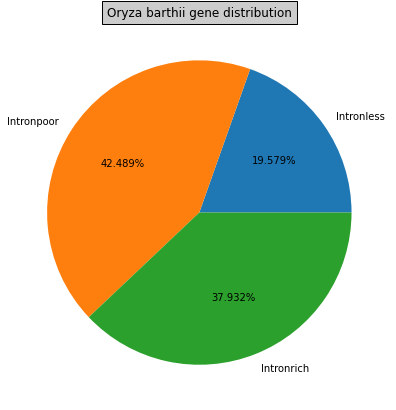

In [228]:
plotting_intron_types(6961,15106,13486, 'Oryza barthii gene distribution')

In [229]:
### --- Creating the list of o_barthii gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_barthii_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_barthii_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_barthii_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_barthii)):
    if i == len(intronless_o_barthii) -1:
        intronless_file.write(intronless_o_barthii[i])
    else:
        intronless_file.write(intronless_o_barthii[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_barthii)):
    if i == len(intronpoor_o_barthii) -1:
        intronpoor_file.write(intronpoor_o_barthii[i])
    else:
        intronpoor_file.write(intronpoor_o_barthii[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_barthii)):
    if i == len(intronrich_o_barthii) -1:
        intronrich_file.write(intronrich_o_barthii[i])
    else:
        intronrich_file.write(intronrich_o_barthii[i]+'\n')
intronrich_file.close()


# Oryza brachyantha Ensembl 52

In [233]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [230]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_brachyantha = pd.read_csv('Data/Oryza_brachyantha.Oryza_brachyantha.v1.4b.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_brachyantha[df_o_brachyantha['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,14456,23022,.,+,.,ID=gene:OB01G10010;biotype=protein_coding;gene_id=OB01G10010;logic_name=genemodel_v1.4_oge
2,1,oge,gene,47693,50341,.,+,.,ID=gene:OB01G10020;biotype=protein_coding;description=SKU5 similar 3 [Source:Projected from Arabidopsis thaliana (AT5G48450) TAIR%3BAcc:AT5G48450];gene_id=OB01G10020;logic_name=genemodel_v1.4_oge
3,1,oge,gene,52502,57481,.,+,.,ID=gene:OB01G10030;biotype=protein_coding;gene_id=OB01G10030;logic_name=genemodel_v1.4_oge
4,1,oge,gene,60240,64549,.,+,.,ID=gene:OB01G10040;biotype=protein_coding;gene_id=OB01G10040;logic_name=genemodel_v1.4_oge
5,1,oge,gene,65674,69835,.,+,.,ID=gene:OB01G10050;biotype=protein_coding;gene_id=OB01G10050;logic_name=genemodel_v1.4_oge
...,...,...,...,...,...,...,...,...,...
399606,JH592296.1,oge,gene,384,767,.,-,.,ID=gene:OB0347G10010;biotype=protein_coding;gene_id=OB0347G10010;logic_name=genemodel_v1.4_oge
399613,JH592297.1,oge,gene,52,2313,.,+,.,ID=gene:OB0348G10010;biotype=protein_coding;gene_id=OB0348G10010;logic_name=genemodel_v1.4_oge
399618,JH370084.2,oge,gene,405,1468,.,+,.,ID=gene:OB0349G10010;biotype=protein_coding;description=Peroxidase [Source:UniProtKB/TrEMBL%3BAcc:J3LIX2];gene_id=OB0349G10010;logic_name=genemodel_v1.4_oge
399626,JH592299.1,oge,gene,503,1385,.,-,.,ID=gene:OB0351G10010;biotype=protein_coding;gene_id=OB0351G10010;logic_name=genemodel_v1.4_oge


In [231]:
### --- Building a separate dataframe containing all exons
exon_o_brachyantha = df_o_brachyantha.loc[df_o_brachyantha['type'].isin(['exon'])]
exon_o_brachyantha.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
9140,1,oge,exon,14456,15152,.,+,.,Name=OB01G10010.1.exon1;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OB01G10010.1.exon1;rank=1
9141,1,oge,exon,15281,15306,.,+,.,Name=OB01G10010.1.exon2;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OB01G10010.1.exon2;rank=2
9142,1,oge,exon,15307,15471,.,+,.,Name=OB01G10010.1.exon3;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon3;rank=3
9143,1,oge,exon,16308,16406,.,+,.,Name=OB01G10010.1.exon4;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon4;rank=4
9144,1,oge,exon,16987,17090,.,+,.,Name=OB01G10010.1.exon5;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=OB01G10010.1.exon5;rank=5
9145,1,oge,exon,19079,19887,.,+,.,Name=OB01G10010.1.exon6;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=OB01G10010.1.exon6;rank=6
9146,1,oge,exon,19967,20089,.,+,.,Name=OB01G10010.1.exon7;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=OB01G10010.1.exon7;rank=7
9147,1,oge,exon,20170,20258,.,+,.,Name=OB01G10010.1.exon8;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OB01G10010.1.exon8;rank=8
9148,1,oge,exon,20346,20546,.,+,.,Name=OB01G10010.1.exon9;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon9;rank=9
9149,1,oge,exon,21194,21610,.,+,.,Name=OB01G10010.1.exon10;Parent=transcript:OB01G10010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OB01G10010.1.exon10;rank=10


In [232]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_brachyantha.to_csv('Data/Oryza_brachyantha.Oryza_brachyantha.v1.4b.52_EXON',sep='\t',index=False,header=False)

In [234]:
### --- Counting introns type
introns_dictionary_o_brachyantha = counting_introns_type(exon_o_brachyantha)

In [235]:
n_intronless_o_brachyantha, n_intronpoor_o_brachyantha, n_intronrich_o_brachyantha, intronless_o_brachyantha, intronpoor_o_brachyantha, intronrich_o_brachyantha = splitting_introns_type(introns_dictionary_o_brachyantha)

Intronless are: 9356
Intronpoor are: 9992
Intronrich are: 13115


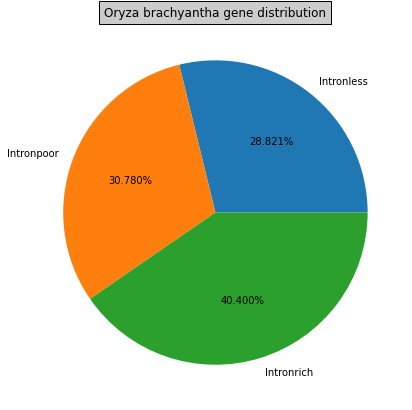

In [236]:
plotting_intron_types(9356, 9992, 13115, 'Oryza brachyantha gene distribution')

In [109]:
### --- Creating the list of o_brachyantha gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_brachyantha_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_brachyantha_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_brachyantha_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_brachyantha)):
    if i == len(intronless_o_brachyantha) -1:
        intronless_file.write(intronless_o_brachyantha[i])
    else:
        intronless_file.write(intronless_o_brachyantha[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_brachyantha)):
    if i == len(intronpoor_o_brachyantha) -1:
        intronpoor_file.write(intronpoor_o_brachyantha[i])
    else:
        intronpoor_file.write(intronpoor_o_brachyantha[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_brachyantha)):
    if i == len(intronrich_o_brachyantha) -1:
        intronrich_file.write(intronrich_o_brachyantha[i])
    else:
        intronrich_file.write(intronrich_o_brachyantha[i]+'\n')
intronrich_file.close()


# Oryza glaberrima Ensembl 2

In [240]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [238]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_glaberrima = pd.read_csv('Data/Oryza_glaberrima.Oryza_glaberrima_V1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_glaberrima[df_o_glaberrima['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,pgsb,gene,2,4194,.,+,.,ID=gene:ORGLA01G0000100;biotype=protein_coding;description=dihydrosphingosine phosphate lyase [Source:Projected from Arabidopsis thaliana (AT1G27980) TAIR%3BAcc:AT1G27980];gene_id=ORGLA01G0000100;logic_name=mips_oglab_v2.01
27,1,pgsb,gene,9088,9981,.,+,.,ID=gene:ORGLA01G0000200;biotype=protein_coding;gene_id=ORGLA01G0000200;logic_name=mips_oglab_v2.01
31,1,pgsb,gene,10664,13096,.,+,.,ID=gene:ORGLA01G0000300;biotype=protein_coding;description=Pentatricopeptide repeat (PPR) superfamily protein [Source:Projected from Arabidopsis thaliana (AT3G02010) TAIR%3BAcc:AT3G02010];gene_id=ORGLA01G0000300;logic_name=mips_oglab_v2.01
35,1,pgsb,gene,14127,15368,.,+,.,ID=gene:ORGLA01G0000400;biotype=protein_coding;gene_id=ORGLA01G0000400;logic_name=mips_oglab_v2.01
45,1,pgsb,gene,15693,17974,.,-,.,ID=gene:ORGLA01G0000500;biotype=protein_coding;gene_id=ORGLA01G0000500;logic_name=mips_oglab_v2.01
...,...,...,...,...,...,...,...,...,...
355335,Oglab12_unplaced184,pgsb,gene,133635,133916,.,-,.,ID=gene:ORGLA12G0207200;biotype=protein_coding;gene_id=ORGLA12G0207200;logic_name=mips_oglab_v2.01
355340,Oglab12_unplaced185,pgsb,gene,314,1227,.,-,.,ID=gene:ORGLA12G0207300;biotype=protein_coding;gene_id=ORGLA12G0207300;logic_name=mips_oglab_v2.01
355348,Oglab12_unplaced185,pgsb,gene,18320,20536,.,-,.,ID=gene:ORGLA12G0207400;biotype=protein_coding;gene_id=ORGLA12G0207400;logic_name=mips_oglab_v2.01
355353,Oglab12_unplaced187,pgsb,gene,9434,9891,.,+,.,ID=gene:ORGLA12G0207800;biotype=protein_coding;gene_id=ORGLA12G0207800;logic_name=mips_oglab_v2.01


In [239]:
### --- Building a separate dataframe containing all exons
exon_o_glaberrima = df_o_glaberrima.loc[df_o_glaberrima['type'].isin(['exon'])]
exon_o_glaberrima.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,1,pgsb,exon,2,63,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon1;rank=1
5,1,pgsb,exon,780,1004,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon2;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon2;rank=2
7,1,pgsb,exon,1078,1219,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon3;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon3;rank=3
9,1,pgsb,exon,1463,1513,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon4;rank=4
11,1,pgsb,exon,1621,1712,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon5;rank=5
13,1,pgsb,exon,2506,2632,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon6;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon6;rank=6
15,1,pgsb,exon,2740,2755,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon7;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=ORGLA01G0000100.1.exon7;rank=7
17,1,pgsb,exon,3126,3233,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon8;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=ORGLA01G0000100.1.exon8;rank=8
19,1,pgsb,exon,3322,3376,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon9;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=ORGLA01G0000100.1.exon9;rank=9
21,1,pgsb,exon,3643,3789,.,+,.,Parent=transcript:ORGLA01G0000100.1;Name=ORGLA01G0000100.1.exon10;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=ORGLA01G0000100.1.exon10;rank=10


In [245]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_glaberrima.to_csv('Data/Oryza_glaberrima.Oryza_glaberrima_V1.52_EXON',sep='\t',index=False,header=False)

In [246]:
### --- Counting introns type
introns_dictionary_o_glaberrima = counting_introns_type(exon_o_glaberrima)

In [247]:
n_intronless_o_glaberrima, n_intronpoor_o_glaberrima, n_intronrich_o_glaberrima, intronless_o_glaberrima, intronpoor_o_glaberrima, intronrich_o_glaberrima = splitting_introns_type(introns_dictionary_o_glaberrima)

Intronless are: 10893
Intronpoor are: 12923
Intronrich are: 10318


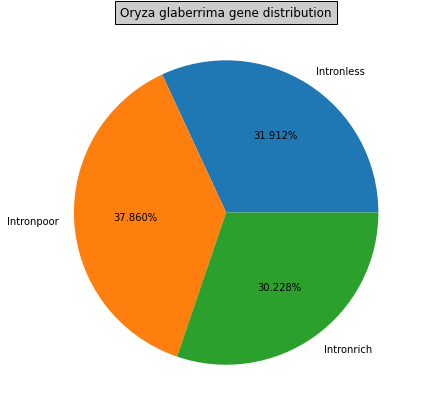

In [248]:
plotting_intron_types(10893, 12923,10318 , 'Oryza glaberrima gene distribution')

In [249]:
### --- Creating the list of o_glaberrima gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_glaberrima_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_glaberrima_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_glaberrima_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_glaberrima)):
    if i == len(intronless_o_glaberrima) -1:
        intronless_file.write(intronless_o_glaberrima[i])
    else:
        intronless_file.write(intronless_o_glaberrima[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_glaberrima)):
    if i == len(intronpoor_o_glaberrima) -1:
        intronpoor_file.write(intronpoor_o_glaberrima[i])
    else:
        intronpoor_file.write(intronpoor_o_glaberrima[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_glaberrima)):
    if i == len(intronrich_o_glaberrima) -1:
        intronrich_file.write(intronrich_o_glaberrima[i])
    else:
        intronrich_file.write(intronrich_o_glaberrima[i]+'\n')
intronrich_file.close()


# Oryza glumipatula Ensembl 52

In [253]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [251]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_glumipatula = pd.read_csv('Data/Oryza_glumipatula.Oryza_glumaepatula_v1.5.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_glumipatula[df_o_glumipatula['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,5482,7426,.,-,.,ID=gene:OGLUM01G00010;biotype=protein_coding;gene_id=OGLUM01G00010;logic_name=oge_maker_genes
2,1,oge,gene,9160,17082,.,+,.,ID=gene:OGLUM01G00020;biotype=protein_coding;gene_id=OGLUM01G00020;logic_name=oge_maker_genes
3,1,oge,gene,17681,18336,.,-,.,ID=gene:OGLUM01G00030;biotype=protein_coding;gene_id=OGLUM01G00030;logic_name=oge_maker_genes
4,1,oge,gene,18206,19449,.,+,.,ID=gene:OGLUM01G00040;biotype=protein_coding;gene_id=OGLUM01G00040;logic_name=oge_maker_genes
5,1,oge,gene,20670,28612,.,+,.,ID=gene:OGLUM01G00050;biotype=protein_coding;description=SKU5 similar 3 [Source:Projected from Arabidopsis thaliana (AT5G48450) TAIR%3BAcc:AT5G48450];gene_id=OGLUM01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
636244,10,oge,gene,22946997,22947702,.,+,.,ID=gene:OGLUM10G20000;biotype=protein_coding;gene_id=OGLUM10G20000;logic_name=oge_maker_genes
636245,10,oge,gene,22947764,22950962,.,+,.,ID=gene:OGLUM10G20010;biotype=protein_coding;gene_id=OGLUM10G20010;logic_name=oge_maker_genes
636246,10,oge,gene,22952628,22956341,.,+,.,ID=gene:OGLUM10G20020;biotype=protein_coding;gene_id=OGLUM10G20020;logic_name=oge_maker_genes
636247,10,oge,gene,22959223,22959885,.,-,.,ID=gene:OGLUM10G20030;biotype=protein_coding;gene_id=OGLUM10G20030;logic_name=oge_maker_genes


In [252]:
### --- Building a separate dataframe containing all exons
exon_o_glumipatula = df_o_glumipatula.loc[df_o_glumipatula['type'].isin(['exon'])]
exon_o_glumipatula.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
11791,1,oge,exon,7300,7426,.,-,.,Name=OGLUM01G00010.1.exon1;Parent=transcript:OGLUM01G00010.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=OGLUM01G00010.1.exon1;rank=1
11792,1,oge,exon,5482,5747,.,-,.,Name=OGLUM01G00010.1.exon2;Parent=transcript:OGLUM01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OGLUM01G00010.1.exon2;rank=2
11793,1,oge,exon,9160,9526,.,+,.,Name=OGLUM01G00020.1.exon1;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OGLUM01G00020.1.exon1;rank=1
11794,1,oge,exon,9698,9887,.,+,.,Name=OGLUM01G00020.1.exon2;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=OGLUM01G00020.1.exon2;rank=2
11795,1,oge,exon,10629,10727,.,+,.,Name=OGLUM01G00020.1.exon3;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OGLUM01G00020.1.exon3;rank=3
11796,1,oge,exon,11730,11833,.,+,.,Name=OGLUM01G00020.1.exon4;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=OGLUM01G00020.1.exon4;rank=4
11797,1,oge,exon,13409,14217,.,+,.,Name=OGLUM01G00020.1.exon5;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=OGLUM01G00020.1.exon5;rank=5
11798,1,oge,exon,14301,14423,.,+,.,Name=OGLUM01G00020.1.exon6;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=OGLUM01G00020.1.exon6;rank=6
11799,1,oge,exon,14505,14593,.,+,.,Name=OGLUM01G00020.1.exon7;Parent=transcript:OGLUM01G00020.1;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=OGLUM01G00020.1.exon7;rank=7
11800,1,oge,exon,14681,14881,.,+,.,Name=OGLUM01G00020.1.exon8;Parent=transcript:OGLUM01G00020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OGLUM01G00020.1.exon8;rank=8


In [254]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_glumipatula.to_csv('Data/Oryza_glumipatula.Oryza_glumaepatula_v1.5.52_EXON',sep='\t',index=False,header=False)

In [255]:
### --- Counting introns type
introns_dictionary_o_glumipatula = counting_introns_type(exon_o_glumipatula)

In [256]:
n_intronless_o_glumipatula, n_intronpoor_o_glumipatula, n_intronrich_o_glumipatula, intronless_o_glumipatula, intronpoor_o_glumipatula, intronrich_o_glumipatula = splitting_introns_type(introns_dictionary_o_glumipatula)

Intronless are: 7580
Intronpoor are: 14644
Intronrich are: 14155


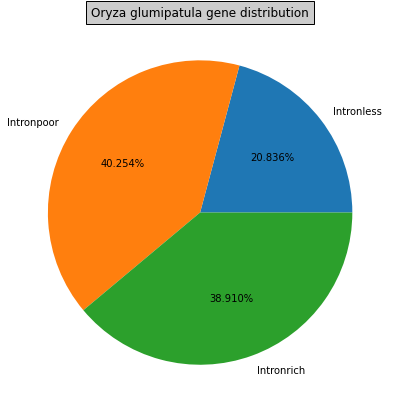

In [257]:
plotting_intron_types(7580, 14644, 14155, 'Oryza glumipatula gene distribution')

In [258]:
### --- Creating the list of o_glumipatula gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_glumipatula_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_glumipatula_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_glumipatula_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_glumipatula)):
    if i == len(intronless_o_glumipatula) -1:
        intronless_file.write(intronless_o_glumipatula[i])
    else:
        intronless_file.write(intronless_o_glumipatula[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_glumipatula)):
    if i == len(intronpoor_o_glumipatula) -1:
        intronpoor_file.write(intronpoor_o_glumipatula[i])
    else:
        intronpoor_file.write(intronpoor_o_glumipatula[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_glumipatula)):
    if i == len(intronrich_o_glumipatula) -1:
        intronrich_file.write(intronrich_o_glumipatula[i])
    else:
        intronrich_file.write(intronrich_o_glumipatula[i]+'\n')
intronrich_file.close()


# Oryza indica Ensembl 52

In [261]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [259]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_indica = pd.read_csv('Data/Oryza_indica.ASM465v1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_indica[df_o_indica['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,bgi,gene,29704805,29705645,.,+,.,ID=gene:BGIOSGA004130;biotype=protein_coding;gene_id=BGIOSGA004130;logic_name=genemodel_riceindica_bgi
2,1,bgi,gene,35643922,35648210,.,-,.,ID=gene:BGIOSGA000752;biotype=protein_coding;gene_id=BGIOSGA000752;logic_name=genemodel_riceindica_bgi
3,1,bgi,gene,43790125,43790922,.,+,.,ID=gene:BGIOSGA005053;biotype=protein_coding;gene_id=BGIOSGA005053;logic_name=genemodel_riceindica_bgi
4,1,bgi,gene,16394172,16395508,.,-,.,ID=gene:BGIOSGA001652;biotype=protein_coding;description=Hydroxyethylthiazole kinase [Source:Projected from Arabidopsis thaliana (AT3G24030) UniProtKB/Swiss-Prot%3BAcc:Q9LIQ4];gene_id=BGIOSGA001652;logic_name=genemodel_riceindica_bgi
5,1,bgi,gene,32849668,32852412,.,+,.,ID=gene:BGIOSGA004321;biotype=protein_coding;description=Peroxidase [Source:UniProtKB/TrEMBL%3BAcc:B8A8N2];gene_id=BGIOSGA004321;logic_name=genemodel_riceindica_bgi
...,...,...,...,...,...,...,...,...,...
436778,AAAA02050197.1,bgi,gene,264,746,.,-,.,ID=gene:BGIOSGA040426;biotype=protein_coding;gene_id=BGIOSGA040426;logic_name=genemodel_riceindica_bgi
436785,AAAA02050198.1,bgi,gene,21,1187,.,+,.,ID=gene:BGIOSGA040423;biotype=protein_coding;gene_id=BGIOSGA040423;logic_name=genemodel_riceindica_bgi
436793,AAAA02050204.1,bgi,gene,733,1101,.,-,.,ID=gene:BGIOSGA040405;biotype=protein_coding;gene_id=BGIOSGA040405;logic_name=genemodel_riceindica_bgi
436810,AAAA02050218.1,bgi,gene,49,813,.,-,.,ID=gene:BGIOSGA040450;biotype=protein_coding;gene_id=BGIOSGA040450;logic_name=genemodel_riceindica_bgi


In [262]:
### --- Building a separate dataframe containing all exons
exon_o_indica = df_o_indica.loc[df_o_indica['type'].isin(['exon'])]
exon_o_indica.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
10763,1,bgi,exon,29704805,29704978,.,+,.,Name=BGIOSGA004130-TA.1;Parent=transcript:BGIOSGA004130-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA004130-TA.1;rank=1
10764,1,bgi,exon,29705553,29705645,.,+,.,Name=BGIOSGA004130-TA.2;Parent=transcript:BGIOSGA004130-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA004130-TA.2;rank=2
10765,1,bgi,exon,35648205,35648210,.,-,.,Name=BGIOSGA000752-TA.1;Parent=transcript:BGIOSGA000752-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA000752-TA.1;rank=1
10766,1,bgi,exon,35646855,35647403,.,-,.,Name=BGIOSGA000752-TA.2;Parent=transcript:BGIOSGA000752-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA000752-TA.2;rank=2
10767,1,bgi,exon,35645792,35646100,.,-,.,Name=BGIOSGA000752-TA.3;Parent=transcript:BGIOSGA000752-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA000752-TA.3;rank=3
10768,1,bgi,exon,35645396,35645686,.,-,.,Name=BGIOSGA000752-TA.4;Parent=transcript:BGIOSGA000752-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA000752-TA.4;rank=4
10769,1,bgi,exon,35645186,35645299,.,-,.,Name=BGIOSGA000752-TA.5;Parent=transcript:BGIOSGA000752-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA000752-TA.5;rank=5
10770,1,bgi,exon,35643922,35644542,.,-,.,Name=BGIOSGA000752-TA.6;Parent=transcript:BGIOSGA000752-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=BGIOSGA000752-TA.6;rank=6
10771,1,bgi,exon,43790125,43790371,.,+,.,Name=BGIOSGA005053-TA.1;Parent=transcript:BGIOSGA005053-TA;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=BGIOSGA005053-TA.1;rank=1
10772,1,bgi,exon,43790507,43790922,.,+,.,Name=BGIOSGA005053-TA.2;Parent=transcript:BGIOSGA005053-TA;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=BGIOSGA005053-TA.2;rank=2


In [264]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_indica.to_csv('Data/Oryza_indica.ASM465v1.52_EXON',sep='\t',index=False,header=False)

In [266]:
### --- Counting introns type
introns_dictionary_o_indica = counting_introns_type(exon_o_indica)

In [267]:
n_intronless_o_indica, n_intronpoor_o_indica, n_intronrich_o_indica, intronless_o_indica, intronpoor_o_indica, intronrich_o_indica = splitting_introns_type(introns_dictionary_o_indica)

Intronless are: 13533
Intronpoor are: 16416
Intronrich are: 12082


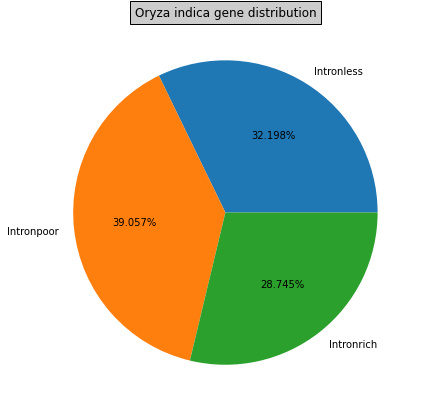

In [269]:
plotting_intron_types(13533, 16416, 12082, 'Oryza indica gene distribution')

In [270]:
### --- Creating the list of o_indica gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_indica_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_indica_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_indica_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_indica)):
    if i == len(intronless_o_indica) -1:
        intronless_file.write(intronless_o_indica[i])
    else:
        intronless_file.write(intronless_o_indica[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_indica)):
    if i == len(intronpoor_o_indica) -1:
        intronpoor_file.write(intronpoor_o_indica[i])
    else:
        intronpoor_file.write(intronpoor_o_indica[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_indica)):
    if i == len(intronrich_o_indica) -1:
        intronrich_file.write(intronrich_o_indica[i])
    else:
        intronrich_file.write(intronrich_o_indica[i]+'\n')
intronrich_file.close()


# Oryza longistaminata Ensembl 52

In [274]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['.'.join(i.split('.')[:2])] = counts.get('.'.join(i.split('.')[:2]), 0) + 1
    return counts

In [271]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_longistaminata = pd.read_csv('Data/Oryza_longistaminata.O_longistaminata_v1.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_longistaminata[df_o_longistaminata['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,KN538681.1,bgi,gene,760978,763811,.,-,.,ID=gene:KN538681.1_FG001;biotype=protein_coding;gene_id=KN538681.1_FG001;logic_name=fgenesh
2,KN538681.1,bgi,gene,838811,839083,.,+,.,ID=gene:KN538681.1_FG002;biotype=protein_coding;gene_id=KN538681.1_FG002;logic_name=fgenesh
3,KN538681.1,bgi,gene,736466,737680,.,+,.,ID=gene:KN538681.1_FG003;biotype=protein_coding;gene_id=KN538681.1_FG003;logic_name=fgenesh
4,KN538681.1,bgi,gene,890795,891457,.,+,.,ID=gene:KN538681.1_FG004;biotype=protein_coding;gene_id=KN538681.1_FG004;logic_name=fgenesh
5,KN538681.1,bgi,gene,708175,711073,.,+,.,ID=gene:KN538681.1_FG005;biotype=protein_coding;gene_id=KN538681.1_FG005;logic_name=fgenesh
...,...,...,...,...,...,...,...,...,...
439026,AMDW01003130.1,bgi,gene,10,153,.,-,.,ID=gene:AMDW01003130.1_FG001;biotype=protein_coding;gene_id=AMDW01003130.1_FG001;logic_name=fgenesh
439062,AMDW01003054.1,bgi,gene,11,199,.,-,.,ID=gene:AMDW01003054.1_FG001;biotype=protein_coding;gene_id=AMDW01003054.1_FG001;logic_name=fgenesh
439146,AMDW01003051.1,bgi,gene,97,171,.,-,.,ID=gene:AMDW01003051.1_FG001;biotype=protein_coding;gene_id=AMDW01003051.1_FG001;logic_name=fgenesh
439270,AMDW01003192.1,bgi,gene,22,141,.,+,.,ID=gene:AMDW01003192.1_FG001;biotype=protein_coding;gene_id=AMDW01003192.1_FG001;logic_name=fgenesh


In [272]:
### --- Building a separate dataframe containing all exons
exon_o_longistaminata = df_o_longistaminata.loc[df_o_longistaminata['type'].isin(['exon'])]
exon_o_longistaminata.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
279,KN538681.1,bgi,exon,763618,763811,.,-,.,Name=KN538681.1_FG001.exon1;Parent=transcript:KN538681.1_FGT001;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=KN538681.1_FG001.exon1;rank=1
280,KN538681.1,bgi,exon,763114,763176,.,-,.,Name=KN538681.1_FG001.exon2;Parent=transcript:KN538681.1_FGT001;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=KN538681.1_FG001.exon2;rank=2
281,KN538681.1,bgi,exon,760978,761959,.,-,.,Name=KN538681.1_FG001.exon3;Parent=transcript:KN538681.1_FGT001;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=KN538681.1_FG001.exon3;rank=3
282,KN538681.1,bgi,exon,838811,839083,.,+,.,Name=KN538681.1_FG002.exon1;Parent=transcript:KN538681.1_FGT002;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG002.exon1;rank=1
283,KN538681.1,bgi,exon,736466,736738,.,+,.,Name=KN538681.1_FG003.exon1;Parent=transcript:KN538681.1_FGT003;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG003.exon1;rank=1
284,KN538681.1,bgi,exon,736830,737015,.,+,.,Name=KN538681.1_FG003.exon2;Parent=transcript:KN538681.1_FGT003;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG003.exon2;rank=2
285,KN538681.1,bgi,exon,737093,737680,.,+,.,Name=KN538681.1_FG003.exon3;Parent=transcript:KN538681.1_FGT003;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG003.exon3;rank=3
286,KN538681.1,bgi,exon,890795,891457,.,+,.,Name=KN538681.1_FG004.exon1;Parent=transcript:KN538681.1_FGT004;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG004.exon1;rank=1
287,KN538681.1,bgi,exon,708175,708387,.,+,.,Name=KN538681.1_FG005.exon1;Parent=transcript:KN538681.1_FGT005;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG005.exon1;rank=1
288,KN538681.1,bgi,exon,708455,708646,.,+,.,Name=KN538681.1_FG005.exon2;Parent=transcript:KN538681.1_FGT005;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KN538681.1_FG005.exon2;rank=2


In [275]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_longistaminata.to_csv('Data/Oryza_longistaminata.O_longistaminata_v1.0.52_EXON',sep='\t',index=False,header=False)

In [276]:
### --- Counting introns type
introns_dictionary_o_longistaminata = counting_introns_type(exon_o_longistaminata)

In [277]:
n_intronless_o_longistaminata, n_intronpoor_o_longistaminata, n_intronrich_o_longistaminata, intronless_o_longistaminata, intronpoor_o_longistaminata, intronrich_o_longistaminata = splitting_introns_type(introns_dictionary_o_longistaminata)

Intronless are: 8762
Intronpoor are: 12564
Intronrich are: 11481


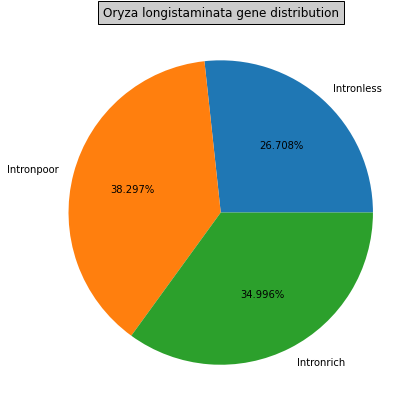

In [278]:
plotting_intron_types(8762, 12564, 11481, 'Oryza longistaminata gene distribution')

In [279]:
### --- Creating the list of o_longistaminata gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_longistaminata_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_longistaminata_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_longistaminata_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_longistaminata)):
    if i == len(intronless_o_longistaminata) -1:
        intronless_file.write(intronless_o_longistaminata[i])
    else:
        intronless_file.write(intronless_o_longistaminata[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_longistaminata)):
    if i == len(intronpoor_o_longistaminata) -1:
        intronpoor_file.write(intronpoor_o_longistaminata[i])
    else:
        intronpoor_file.write(intronpoor_o_longistaminata[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_longistaminata)):
    if i == len(intronrich_o_longistaminata) -1:
        intronrich_file.write(intronrich_o_longistaminata[i])
    else:
        intronrich_file.write(intronrich_o_longistaminata[i]+'\n')
intronrich_file.close()


# Oryza meridionalis Ensembl 52

In [282]:
### --- Function to count introns within a dataframe made of exons formatted like exon_d_rotundata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [280]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_meridionalis = pd.read_csv('Data/Oryza_meridionalis.Oryza_meridionalis_v1.3.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_meridionalis[df_o_meridionalis['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,8809,13404,.,-,.,ID=gene:OMERI01G00010;biotype=protein_coding;description=;gene_id=OMERI01G00010;logic_name=oge_maker_genes
2,1,oge,gene,9661,13315,.,+,.,ID=gene:OMERI01G00020;biotype=protein_coding;description=;gene_id=OMERI01G00020;logic_name=oge_maker_genes
3,1,oge,gene,14773,18153,.,+,.,ID=gene:OMERI01G00030;biotype=protein_coding;description=;gene_id=OMERI01G00030;logic_name=oge_maker_genes
4,1,oge,gene,18501,23474,.,-,.,ID=gene:OMERI01G00040;biotype=protein_coding;description=;gene_id=OMERI01G00040;logic_name=oge_maker_genes
5,1,oge,gene,23562,52891,.,+,.,ID=gene:OMERI01G00050;biotype=protein_coding;description=;gene_id=OMERI01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
697418,10,oge,gene,17697667,17704514,.,-,.,ID=gene:OMERI10G15280;biotype=protein_coding;description=;gene_id=OMERI10G15280;logic_name=oge_maker_genes
697419,10,oge,gene,17711481,17718574,.,+,.,ID=gene:OMERI10G15290;biotype=protein_coding;description=;gene_id=OMERI10G15290;logic_name=oge_maker_genes
697420,10,oge,gene,17724006,17724948,.,-,.,ID=gene:OMERI10G15300;biotype=protein_coding;description=;gene_id=OMERI10G15300;logic_name=oge_maker_genes
697421,10,oge,gene,17726915,17734957,.,+,.,ID=gene:OMERI10G15310;biotype=protein_coding;description=;gene_id=OMERI10G15310;logic_name=oge_maker_genes


In [281]:
### --- Building a separate dataframe containing all exons
exon_o_meridionalis = df_o_meridionalis.loc[df_o_meridionalis['type'].isin(['exon'])]
exon_o_meridionalis.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
10624,1,oge,exon,10950,13404,.,-,.,Name=OMERI01G00010.1.exon1;Parent=transcript:OMERI01G00010.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=OMERI01G00010.1.exon1;rank=1
10625,1,oge,exon,8873,8882,.,-,.,Name=OMERI01G00010.1.exon2;Parent=transcript:OMERI01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=OMERI01G00010.1.exon2;rank=2
10626,1,oge,exon,8809,8829,.,-,.,Name=OMERI01G00010.1.exon3;Parent=transcript:OMERI01G00010.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OMERI01G00010.1.exon3;rank=3
10627,1,oge,exon,9661,9991,.,+,.,Name=OMERI01G00020.1.exon1;Parent=transcript:OMERI01G00020.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=OMERI01G00020.1.exon1;rank=1
10628,1,oge,exon,10901,13315,.,+,.,Name=OMERI01G00020.1.exon2;Parent=transcript:OMERI01G00020.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=OMERI01G00020.1.exon2;rank=2
10629,1,oge,exon,14773,15081,.,+,.,Name=OMERI01G00030.1.exon1;Parent=transcript:OMERI01G00030.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=OMERI01G00030.1.exon1;rank=1
10630,1,oge,exon,15267,15383,.,+,.,Name=OMERI01G00030.1.exon2;Parent=transcript:OMERI01G00030.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OMERI01G00030.1.exon2;rank=2
10631,1,oge,exon,15571,15609,.,+,.,Name=OMERI01G00030.1.exon3;Parent=transcript:OMERI01G00030.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OMERI01G00030.1.exon3;rank=3
10632,1,oge,exon,15683,15775,.,+,.,Name=OMERI01G00030.1.exon4;Parent=transcript:OMERI01G00030.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OMERI01G00030.1.exon4;rank=4
10633,1,oge,exon,15872,16008,.,+,.,Name=OMERI01G00030.1.exon5;Parent=transcript:OMERI01G00030.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=OMERI01G00030.1.exon5;rank=5


In [283]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_meridionalis.to_csv('Data/Oryza_meridionalis.Oryza_meridionalis_v1.3.52_EXON',sep='\t',index=False,header=False)

In [284]:
### --- Counting introns type
introns_dictionary_o_meridionalis = counting_introns_type(exon_o_meridionalis)

In [285]:
n_intronless_o_meridionalis, n_intronpoor_o_meridionalis, n_intronrich_o_meridionalis, intronless_o_meridionalis, intronpoor_o_meridionalis, intronrich_o_meridionalis = splitting_introns_type(introns_dictionary_o_meridionalis)

Intronless are: 7016
Intronpoor are: 10909
Intronrich are: 12316


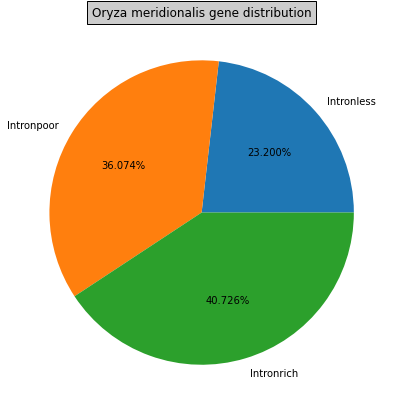

In [286]:
plotting_intron_types(7016, 10909, 12316, 'Oryza meridionalis gene distribution')

In [287]:
### --- Creating the list of o_meridionalis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_meridionalis_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_meridionalis_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_meridionalis_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_meridionalis)):
    if i == len(intronless_o_meridionalis) -1:
        intronless_file.write(intronless_o_meridionalis[i])
    else:
        intronless_file.write(intronless_o_meridionalis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_meridionalis)):
    if i == len(intronpoor_o_meridionalis) -1:
        intronpoor_file.write(intronpoor_o_meridionalis[i])
    else:
        intronpoor_file.write(intronpoor_o_meridionalis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_meridionalis)):
    if i == len(intronrich_o_meridionalis) -1:
        intronrich_file.write(intronrich_o_meridionalis[i])
    else:
        intronrich_file.write(intronrich_o_meridionalis[i]+'\n')
intronrich_file.close()


# Oryza nivara Ensembl 52

In [290]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_nivara
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [288]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_nivara = pd.read_csv('Data/Oryza_nivara.Oryza_nivara_v1.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_nivara[df_o_nivara['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,4848,20752,.,+,.,ID=gene:ONIVA01G00010;biotype=protein_coding;gene_id=ONIVA01G00010;logic_name=oge_maker_genes
17,1,oge,gene,43371,62621,.,+,.,ID=gene:ONIVA01G00020;biotype=protein_coding;gene_id=ONIVA01G00020;logic_name=oge_maker_genes
29,1,oge,gene,62743,64526,.,+,.,ID=gene:ONIVA01G00030;biotype=protein_coding;gene_id=ONIVA01G00030;logic_name=oge_maker_genes
38,1,oge,gene,64707,65654,.,+,.,ID=gene:ONIVA01G00040;biotype=protein_coding;gene_id=ONIVA01G00040;logic_name=oge_maker_genes
42,1,oge,gene,68827,69733,.,+,.,ID=gene:ONIVA01G00050;biotype=protein_coding;gene_id=ONIVA01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
694728,9,oge,gene,20379042,20385390,.,-,.,ID=gene:ONIVA09G20930;biotype=protein_coding;description=At2g44590 [Source:Projected from Arabidopsis thaliana (AT2G44590) UniProtKB/TrEMBL%3BAcc:B5X4Z5];gene_id=ONIVA09G20930;logic_name=oge_maker_genes
694808,9,oge,gene,20384984,20386705,.,+,.,ID=gene:ONIVA09G20940;biotype=protein_coding;description=Tetratricopeptide repeat (TPR)-like superfamily protein [Source:Projected from Arabidopsis thaliana (AT1G04840) TAIR%3BAcc:AT1G04840];gene_id=ONIVA09G20940;logic_name=oge_maker_genes
694812,9,oge,gene,20386719,20395860,.,+,.,ID=gene:ONIVA09G20950;biotype=protein_coding;description=myo-inositol polyphosphate 5-phosphatase 2 [Source:Projected from Arabidopsis thaliana (AT4G18010) TAIR%3BAcc:AT4G18010];gene_id=ONIVA09G20950;logic_name=oge_maker_genes
694913,9,oge,gene,20393612,20396345,.,-,.,ID=gene:ONIVA09G20960;biotype=protein_coding;description=ubiquitin family protein [Source:Projected from Arabidopsis thaliana (AT2G35360) TAIR%3BAcc:AT2G35360];gene_id=ONIVA09G20960;logic_name=oge_maker_genes


In [289]:
### --- Building a separate dataframe containing all exons
exon_o_nivara = df_o_nivara.loc[df_o_nivara['type'].isin(['exon'])]
exon_o_nivara.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,1,oge,exon,4848,5805,.,+,.,Parent=transcript:ONIVA01G00010.2;Name=ONIVA01G00010.2.exon1;constitutive=0;ensembl_end_phase=0;ensembl_phase=-1;exon_id=ONIVA01G00010.2.exon1;rank=1
7,1,oge,exon,10971,11824,.,+,.,Parent=transcript:ONIVA01G00010.2;Name=ONIVA01G00010.2.exon2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=ONIVA01G00010.2.exon2;rank=2
10,1,oge,exon,11755,11759,.,+,.,Parent=transcript:ONIVA01G00010.1;Name=ONIVA01G00010.1.exon1;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=ONIVA01G00010.1.exon1;rank=1
12,1,oge,exon,17471,18398,.,+,.,Parent=transcript:ONIVA01G00010.1;Name=ONIVA01G00010.1.exon2;constitutive=0;ensembl_end_phase=0;ensembl_phase=2;exon_id=ONIVA01G00010.1.exon2;rank=2
15,1,oge,exon,20097,20752,.,+,.,Parent=transcript:ONIVA01G00010.1;Name=ONIVA01G00010.1.exon3;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=ONIVA01G00010.1.exon3;rank=3
19,1,oge,exon,43371,44251,.,+,.,Parent=transcript:ONIVA01G00020.1;Name=ONIVA01G00020.1.exon1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ONIVA01G00020.1.exon1;rank=1
21,1,oge,exon,46998,47613,.,+,.,Parent=transcript:ONIVA01G00020.1;Name=ONIVA01G00020.1.exon2;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ONIVA01G00020.1.exon2;rank=2
23,1,oge,exon,54641,55567,.,+,.,Parent=transcript:ONIVA01G00020.1;Name=ONIVA01G00020.1.exon3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=ONIVA01G00020.1.exon3;rank=3
25,1,oge,exon,55712,56358,.,+,.,Parent=transcript:ONIVA01G00020.1;Name=ONIVA01G00020.1.exon4;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=ONIVA01G00020.1.exon4;rank=4
27,1,oge,exon,62612,62621,.,+,.,Parent=transcript:ONIVA01G00020.1;Name=ONIVA01G00020.1.exon5;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=ONIVA01G00020.1.exon5;rank=5


In [291]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_nivara.to_csv('Data/Oryza_nivara.Oryza_nivara_v1.0.52_EXON',sep='\t',index=False,header=False)

In [292]:
### --- Counting introns type
introns_dictionary_o_nivara = counting_introns_type(exon_o_nivara)

In [293]:
n_intronless_o_nivara, n_intronpoor_o_nivara, n_intronrich_o_nivara, intronless_o_nivara, intronpoor_o_nivara, intronrich_o_nivara = splitting_introns_type(introns_dictionary_o_nivara)

Intronless are: 8126
Intronpoor are: 14510
Intronrich are: 14390


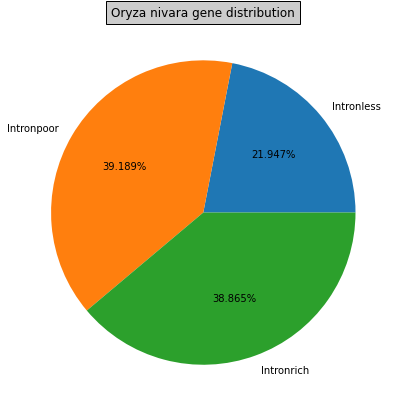

In [295]:
plotting_intron_types(8126, 14510, 14390, 'Oryza nivara gene distribution')

In [296]:
### --- Creating the list of o_nivara gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_nivara_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_nivara_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_nivara_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_nivara)):
    if i == len(intronless_o_nivara) -1:
        intronless_file.write(intronless_o_nivara[i])
    else:
        intronless_file.write(intronless_o_nivara[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_nivara)):
    if i == len(intronpoor_o_nivara) -1:
        intronpoor_file.write(intronpoor_o_nivara[i])
    else:
        intronpoor_file.write(intronpoor_o_nivara[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_nivara)):
    if i == len(intronrich_o_nivara) -1:
        intronrich_file.write(intronrich_o_nivara[i])
    else:
        intronrich_file.write(intronrich_o_nivara[i]+'\n')
intronrich_file.close()


# Oryza punctata Ensembl 52

In [299]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [297]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_punctata = pd.read_csv('Data/Oryza_punctata.Oryza_punctata_v1.2.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_punctata[df_o_punctata['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,1816,9281,.,+,.,ID=gene:OPUNC01G00010;biotype=protein_coding;gene_id=OPUNC01G00010;logic_name=oge_maker_genes
153,1,oge,gene,11028,14385,.,+,.,ID=gene:OPUNC01G00020;biotype=protein_coding;description=SKU5 similar 3 [Source:Projected from Arabidopsis thaliana (AT5G48450) TAIR%3BAcc:AT5G48450];gene_id=OPUNC01G00020;logic_name=oge_maker_genes
167,1,oge,gene,14459,18493,.,+,.,ID=gene:OPUNC01G00030;biotype=protein_coding;gene_id=OPUNC01G00030;logic_name=oge_maker_genes
208,1,oge,gene,26869,30769,.,+,.,ID=gene:OPUNC01G00040;biotype=protein_coding;gene_id=OPUNC01G00040;logic_name=oge_maker_genes
224,1,oge,gene,30823,32897,.,+,.,ID=gene:OPUNC01G00050;biotype=protein_coding;gene_id=OPUNC01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
619027,9,oge,gene,26254662,26256717,.,+,.,ID=gene:OPUNC09G18750;biotype=protein_coding;gene_id=OPUNC09G18750;logic_name=oge_maker_genes
619035,9,oge,gene,26259846,26265693,.,-,.,ID=gene:OPUNC09G18760;biotype=protein_coding;description=At2g44590 [Source:Projected from Arabidopsis thaliana (AT2G44590) UniProtKB/TrEMBL%3BAcc:B5X4Z5];gene_id=OPUNC09G18760;logic_name=oge_maker_genes
619131,9,oge,gene,26265692,26276349,.,+,.,ID=gene:OPUNC09G18770;biotype=protein_coding;gene_id=OPUNC09G18770;logic_name=oge_maker_genes
619228,9,oge,gene,26274762,26282074,.,-,.,ID=gene:OPUNC09G18780;biotype=protein_coding;description=ubiquitin family protein [Source:Projected from Arabidopsis thaliana (AT2G35360) TAIR%3BAcc:AT2G35360];gene_id=OPUNC09G18780;logic_name=oge_maker_genes


In [298]:
### --- Building a separate dataframe containing all exons
exon_o_punctata = df_o_punctata.loc[df_o_punctata['type'].isin(['exon'])]
exon_o_punctata.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,1,oge,exon,1816,1862,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=OPUNC01G00010.1.exon1;rank=1
6,1,oge,exon,1952,2160,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon2;constitutive=0;ensembl_end_phase=1;ensembl_phase=-1;exon_id=OPUNC01G00010.1.exon2;rank=2
8,1,oge,exon,2186,2306,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon3;constitutive=0;ensembl_end_phase=2;ensembl_phase=1;exon_id=OPUNC01G00010.1.exon3;rank=3
10,1,oge,exon,2484,2673,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon4;constitutive=0;ensembl_end_phase=0;ensembl_phase=2;exon_id=OPUNC01G00010.1.exon4;rank=4
12,1,oge,exon,3385,3483,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon5;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OPUNC01G00010.1.exon5;rank=5
14,1,oge,exon,4049,4152,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon6;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=OPUNC01G00010.1.exon6;rank=6
16,1,oge,exon,5499,6307,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon7;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=OPUNC01G00010.1.exon7;rank=7
18,1,oge,exon,6390,6512,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon8;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=OPUNC01G00010.1.exon8;rank=8
20,1,oge,exon,6594,6682,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon9;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OPUNC01G00010.1.exon9;rank=9
22,1,oge,exon,6770,6970,.,+,.,Parent=transcript:OPUNC01G00010.1;Name=OPUNC01G00010.1.exon10;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OPUNC01G00010.1.exon10;rank=10


In [300]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_punctata.to_csv('Data/Oryza_punctata.Oryza_punctata_v1.2.52_EXON',sep='\t',index=False,header=False)

In [301]:
### --- Counting introns type
introns_dictionary_o_punctata = counting_introns_type(exon_o_punctata)

In [302]:
n_intronless_o_punctata, n_intronpoor_o_punctata, n_intronrich_o_punctata, intronless_o_punctata, intronpoor_o_punctata, intronrich_o_punctata = splitting_introns_type(introns_dictionary_o_punctata)

Intronless are: 6456
Intronpoor are: 12333
Intronrich are: 13761


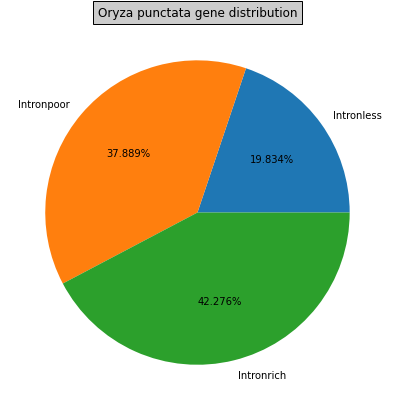

In [303]:
plotting_intron_types(6456, 12333, 13761, 'Oryza punctata gene distribution')

In [304]:
### --- Creating the list of o_punctata gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_punctata_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_punctata_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_punctata_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_punctata)):
    if i == len(intronless_o_punctata) -1:
        intronless_file.write(intronless_o_punctata[i])
    else:
        intronless_file.write(intronless_o_punctata[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_punctata)):
    if i == len(intronpoor_o_punctata) -1:
        intronpoor_file.write(intronpoor_o_punctata[i])
    else:
        intronpoor_file.write(intronpoor_o_punctata[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_punctata)):
    if i == len(intronrich_o_punctata) -1:
        intronrich_file.write(intronrich_o_punctata[i])
    else:
        intronrich_file.write(intronrich_o_punctata[i]+'\n')
intronrich_file.close()


# Oryza rufipogon Ensembl 52

In [307]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [305]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_rufipogon = pd.read_csv('Data/Oryza_rufipogon.OR_W1943.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_rufipogon[df_o_rufipogon['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1,oge,gene,4806,7125,.,-,.,ID=gene:ORUFI01G00010;biotype=protein_coding;description=;gene_id=ORUFI01G00010;logic_name=oge_maker_genes
2,1,oge,gene,7787,9292,.,-,.,ID=gene:ORUFI01G00020;biotype=protein_coding;description=;gene_id=ORUFI01G00020;logic_name=oge_maker_genes
3,1,oge,gene,9958,20595,.,-,.,ID=gene:ORUFI01G00030;biotype=protein_coding;description=;gene_id=ORUFI01G00030;logic_name=oge_maker_genes
4,1,oge,gene,11243,19278,.,+,.,ID=gene:ORUFI01G00040;biotype=protein_coding;description=;gene_id=ORUFI01G00040;logic_name=oge_maker_genes
5,1,oge,gene,19543,30768,.,+,.,ID=gene:ORUFI01G00050;biotype=protein_coding;description=;gene_id=ORUFI01G00050;logic_name=oge_maker_genes
...,...,...,...,...,...,...,...,...,...
640554,9,oge,gene,20445448,20451813,.,-,.,ID=gene:ORUFI09G22130;biotype=protein_coding;description=;gene_id=ORUFI09G22130;logic_name=oge_maker_genes
640555,9,oge,gene,20451324,20462404,.,+,.,ID=gene:ORUFI09G22140;biotype=protein_coding;description=;gene_id=ORUFI09G22140;logic_name=oge_maker_genes
640556,9,oge,gene,20460154,20462887,.,-,.,ID=gene:ORUFI09G22150;biotype=protein_coding;description=;gene_id=ORUFI09G22150;logic_name=oge_maker_genes
640557,9,oge,gene,20463905,20464348,.,+,.,ID=gene:ORUFI09G22160;biotype=protein_coding;description=;gene_id=ORUFI09G22160;logic_name=oge_maker_genes


In [306]:
### --- Building a separate dataframe containing all exons
exon_o_rufipogon = df_o_rufipogon.loc[df_o_rufipogon['type'].isin(['exon'])]
exon_o_rufipogon.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
11489,1,oge,exon,6951,7125,.,-,.,Name=ORUFI01G00010.1.exon1;Parent=transcript:ORUFI01G00010.1;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=ORUFI01G00010.1.exon1;rank=1
11490,1,oge,exon,6696,6742,.,-,.,Name=ORUFI01G00010.1.exon2;Parent=transcript:ORUFI01G00010.1;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=ORUFI01G00010.1.exon2;rank=2
11491,1,oge,exon,5960,6025,.,-,.,Name=ORUFI01G00010.1.exon3;Parent=transcript:ORUFI01G00010.1;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=ORUFI01G00010.1.exon3;rank=3
11492,1,oge,exon,5830,5931,.,-,.,Name=ORUFI01G00010.1.exon4;Parent=transcript:ORUFI01G00010.1;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=ORUFI01G00010.1.exon4;rank=4
11493,1,oge,exon,4819,4982,.,-,.,Name=ORUFI01G00010.1.exon5;Parent=transcript:ORUFI01G00010.1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=ORUFI01G00010.1.exon5;rank=5
11494,1,oge,exon,6951,7125,.,-,.,Name=ORUFI01G00010.1.exon1;Parent=transcript:ORUFI01G00010.2;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=ORUFI01G00010.1.exon1;rank=1
11495,1,oge,exon,5830,6025,.,-,.,Name=ORUFI01G00010.2.exon2;Parent=transcript:ORUFI01G00010.2;constitutive=0;ensembl_end_phase=2;ensembl_phase=1;exon_id=ORUFI01G00010.2.exon2;rank=2
11496,1,oge,exon,4806,4982,.,-,.,Name=ORUFI01G00010.2.exon3;Parent=transcript:ORUFI01G00010.2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=2;exon_id=ORUFI01G00010.2.exon3;rank=3
11497,1,oge,exon,5830,5928,.,-,.,Name=ORUFI01G00010.3.exon1;Parent=transcript:ORUFI01G00010.3;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=ORUFI01G00010.3.exon1;rank=1
11498,1,oge,exon,4819,4982,.,-,.,Name=ORUFI01G00010.1.exon5;Parent=transcript:ORUFI01G00010.3;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=ORUFI01G00010.1.exon5;rank=2


In [308]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_rufipogon.to_csv('Data/Oryza_rufipogon.OR_W1943.52_EXON',sep='\t',index=False,header=False)

In [309]:
### --- Counting introns type
introns_dictionary_o_rufipogon = counting_introns_type(exon_o_rufipogon)

In [310]:
n_intronless_o_rufipogon, n_intronpoor_o_rufipogon, n_intronrich_o_rufipogon, intronless_o_rufipogon, intronpoor_o_rufipogon, intronrich_o_rufipogon = splitting_introns_type(introns_dictionary_o_rufipogon)

Intronless are: 8152
Intronpoor are: 15445
Intronrich are: 14315


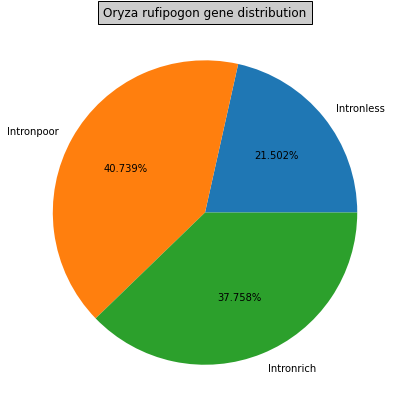

In [311]:
plotting_intron_types(8152, 15445, 14315, 'Oryza rufipogon gene distribution')

In [312]:
### --- Creating the list of o_rufipogon gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_rufipogon_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_rufipogon_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_rufipogon_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_rufipogon)):
    if i == len(intronless_o_rufipogon) -1:
        intronless_file.write(intronless_o_rufipogon[i])
    else:
        intronless_file.write(intronless_o_rufipogon[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_rufipogon)):
    if i == len(intronpoor_o_rufipogon) -1:
        intronpoor_file.write(intronpoor_o_rufipogon[i])
    else:
        intronpoor_file.write(intronpoor_o_rufipogon[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_rufipogon)):
    if i == len(intronrich_o_rufipogon) -1:
        intronrich_file.write(intronrich_o_rufipogon[i])
    else:
        intronrich_file.write(intronrich_o_rufipogon[i]+'\n')
intronrich_file.close()


# Oryza sativa Ensembl 52

In [316]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('-')[0]] = counts.get(i.split('-')[0], 0) + 1
    return counts

In [313]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_o_sativa = pd.read_csv('Data/Oryza_sativa.IRGSP-1.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_o_sativa[df_o_sativa['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
80,1,RAP2018-11-26,gene,28538881,28539369,.,-,.,ID=gene:Os01g0691300;Name=OsLTP2.2;biotype=protein_coding;description=Plant lipid transfer protein and hydrophobic protein%2C helical domain containing protein;gene_id=Os01g0691300;logic_name=rapdb_genes
81,1,RAP2018-11-26,gene,3591827,3596152,.,-,.,ID=gene:Os01g0169900;biotype=protein_coding;description=Protein of unknown function DUF1421 family protein;gene_id=Os01g0169900;logic_name=rapdb_genes
82,1,RAP2018-11-26,gene,30998119,30999454,.,+,.,ID=gene:Os01g0742350;biotype=protein_coding;description=Conserved hypothetical protein;gene_id=Os01g0742350;logic_name=rapdb_genes
83,1,RAP2018-11-26,gene,42269992,42274053,.,-,.,ID=gene:Os01g0958950;biotype=protein_coding;description=Hypothetical protein;gene_id=Os01g0958950;logic_name=rapdb_genes
84,1,RAP2018-11-26,gene,24471931,24478431,.,-,.,ID=gene:Os01g0616400;Name=OsC3H8;biotype=protein_coding;description=Similar to Floral homeotic protein HUA1;gene_id=Os01g0616400;logic_name=rapdb_genes
...,...,...,...,...,...,...,...,...,...
544828,Pt,EMBL,gene,87944,88414,.,-,.,ID=gene:gene-rps7;biotype=protein_coding;gene_id=gene-rps7;logic_name=cp_genbank_import
544829,Pt,EMBL,gene,79344,80063,.,-,.,ID=gene:gene-rps3;biotype=protein_coding;gene_id=gene-rps3;logic_name=cp_genbank_import
544830,Pt,EMBL,gene,61953,62072,.,-,.,ID=gene:gene-psbF;biotype=protein_coding;gene_id=gene-psbF;logic_name=cp_genbank_import
544831,Pt,EMBL,gene,132454,132844,.,+,.,ID=gene:gene-rpl2;biotype=protein_coding;gene_id=gene-rpl2;logic_name=cp_genbank_import


In [315]:
### --- Building a separate dataframe containing all exons
exon_o_sativa = df_o_sativa.loc[df_o_sativa['type'].isin(['exon'])]
exon_o_sativa.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
11699,1,Ensembl_Plants,exon,182074,182154,.,+,.,Name=ENSRNA049442722-E1;Parent=transcript:ENSRNA049442722-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049442722-E1;rank=1
11700,1,Ensembl_Plants,exon,14454630,14454702,.,+,.,Name=ENSRNA049442424-E1;Parent=transcript:ENSRNA049442424-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049442424-E1;rank=1
11701,1,Ensembl_Plants,exon,18689348,18689419,.,+,.,Name=ENSRNA049442327-E1;Parent=transcript:ENSRNA049442327-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049442327-E1;rank=1
11702,1,Ensembl_Plants,exon,24373570,24373640,.,+,.,Name=ENSRNA049442288-E1;Parent=transcript:ENSRNA049442288-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049442288-E1;rank=1
11703,1,Ensembl_Plants,exon,30107880,30107952,.,+,.,Name=ENSRNA049442195-E1;Parent=transcript:ENSRNA049442195-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049442195-E1;rank=1
11704,1,Ensembl_Plants,exon,31523663,31523735,.,+,.,Name=ENSRNA049442095-E1;Parent=transcript:ENSRNA049442095-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049442095-E1;rank=1
11705,1,Ensembl_Plants,exon,33563582,33563654,.,+,.,Name=ENSRNA049441959-E1;Parent=transcript:ENSRNA049441959-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049441959-E1;rank=1
11706,1,Ensembl_Plants,exon,34942529,34942602,.,+,.,Name=ENSRNA049441928-E1;Parent=transcript:ENSRNA049441928-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049441928-E1;rank=1
11707,1,Ensembl_Plants,exon,36016463,36016535,.,+,.,Name=ENSRNA049441839-E1;Parent=transcript:ENSRNA049441839-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049441839-E1;rank=1
11708,1,Ensembl_Plants,exon,36115211,36115283,.,+,.,Name=ENSRNA049441771-E1;Parent=transcript:ENSRNA049441771-T1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSRNA049441771-E1;rank=1


In [317]:
### --- Exporting the exon dataframe to a tsv file 
exon_o_sativa.to_csv('Data/Oryza_sativa.IRGSP-1.0.52_EXON',sep='\t',index=False,header=False)

In [318]:
### --- Counting introns type
introns_dictionary_o_sativa = counting_introns_type(exon_o_sativa)

In [319]:
n_intronless_o_sativa, n_intronpoor_o_sativa, n_intronrich_o_sativa, intronless_o_sativa, intronpoor_o_sativa, intronrich_o_sativa = splitting_introns_type(introns_dictionary_o_sativa)

Intronless are: 12007
Intronpoor are: 13367
Intronrich are: 13502


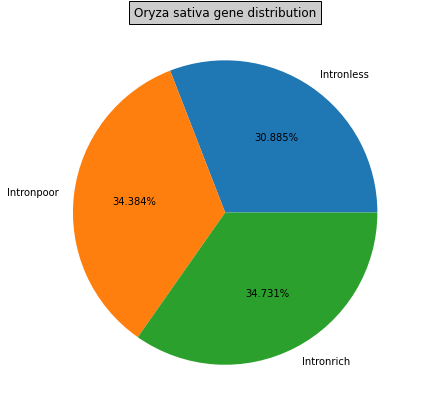

In [320]:
plotting_intron_types(12007, 13367, 13502, 'Oryza sativa gene distribution')

In [321]:
### --- Creating the list of o_sativa gene IDs to check the number of transcripts using command line
intronless_file = open('Output/o_sativa_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/o_sativa_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/o_sativa_intronrichIDs.txt', 'a')
for i in range(len(intronless_o_sativa)):
    if i == len(intronless_o_sativa) -1:
        intronless_file.write(intronless_o_sativa[i])
    else:
        intronless_file.write(intronless_o_sativa[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_o_sativa)):
    if i == len(intronpoor_o_sativa) -1:
        intronpoor_file.write(intronpoor_o_sativa[i])
    else:
        intronpoor_file.write(intronpoor_o_sativa[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_o_sativa)):
    if i == len(intronrich_o_sativa) -1:
        intronrich_file.write(intronrich_o_sativa[i])
    else:
        intronrich_file.write(intronrich_o_sativa[i]+'\n')
intronrich_file.close()


# Panicum hallii v2 Ensembl 52

In [325]:
### --- Function to count introns within a dataframe made of exons formatted like exon_p_halliiv2
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1]] = counts.get(i.split(';')[1], 0) + 1
    return counts

In [331]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_p_halliiv2 = pd.read_csv('Data/Panicum_hallii.PhalliiHAL_v2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_p_halliiv2[df_p_halliiv2['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,9,ena,gene,25500382,25514760,.,-,.,ID=gene:GQ55_9G287900;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G287900;logic_name=ena
2,9,ena,gene,9585201,9591343,.,-,.,ID=gene:GQ55_9G155200;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G155200;logic_name=ena
3,9,ena,gene,2236714,2240028,.,-,.,ID=gene:GQ55_9G038800;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G038800;logic_name=ena
4,9,ena,gene,9619128,9621962,.,+,.,ID=gene:GQ55_9G155500;biotype=protein_coding;description=Probable prefoldin subunit 4 [Source:Projected from Arabidopsis thaliana (AT1G08780) UniProtKB/Swiss-Prot%3BAcc:Q9M4B5];gene_id=GQ55_9G155500;logic_name=ena
5,9,ena,gene,14679135,14680683,.,+,.,ID=gene:GQ55_9G224100;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_9G224100;logic_name=ena
...,...,...,...,...,...,...,...,...,...
570806,KZ793522,ena,gene,51255,52924,.,+,.,ID=gene:GQ55_J003100;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_J003100;logic_name=ena
570824,KZ793525,ena,gene,32320,33652,.,-,.,ID=gene:GQ55_J003900;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_J003900;logic_name=ena
570825,KZ793525,ena,gene,33425,35098,.,+,.,ID=gene:GQ55_J004000;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_J004000;logic_name=ena
570843,KZ793528,ena,gene,10513,12727,.,+,.,ID=gene:GQ55_J004100;biotype=protein_coding;description=hypothetical protein;gene_id=GQ55_J004100;logic_name=ena


In [323]:
### --- Building a separate dataframe containing all exons
exon_p_halliiv2 = df_p_halliiv2.loc[df_p_halliiv2['type'].isin(['exon'])]
exon_p_halliiv2.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
13146,9,ena,exon,25514754,25514760,.,-,.,Name=PUZ39324-1;Parent=transcript:PUZ39324;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=PUZ39324-1;rank=1
13147,9,ena,exon,25500382,25513082,.,-,.,Name=PUZ39324-2;Parent=transcript:PUZ39324;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=PUZ39324-2;rank=2
13148,9,ena,exon,9590741,9591343,.,-,.,Name=PUZ37900-1;Parent=transcript:PUZ37900;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=PUZ37900-1;rank=1
13149,9,ena,exon,9589371,9589472,.,-,.,Name=PUZ37900-2;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=PUZ37900-2;rank=2
13150,9,ena,exon,9588830,9588974,.,-,.,Name=PUZ37900-3;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=PUZ37900-3;rank=3
13151,9,ena,exon,9588564,9588748,.,-,.,Name=PUZ37900-4;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=PUZ37900-4;rank=4
13152,9,ena,exon,9588321,9588425,.,-,.,Name=PUZ37900-5;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=PUZ37900-5;rank=5
13153,9,ena,exon,9588096,9588193,.,-,.,Name=PUZ37900-6;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=PUZ37900-6;rank=6
13154,9,ena,exon,9587746,9587981,.,-,.,Name=PUZ37900-7;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=PUZ37900-7;rank=7
13155,9,ena,exon,9587603,9587669,.,-,.,Name=PUZ37900-8;Parent=transcript:PUZ37900;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=PUZ37900-8;rank=8


In [324]:
### --- Exporting the exon dataframe to a tsv file 
exon_p_halliiv2.to_csv('Data/Panicum_hallii.PhalliiHAL_v2.1.52_EXON',sep='\t',index=False,header=False)

In [326]:
### --- Counting introns type
introns_dictionary_p_halliiv2 = counting_introns_type(exon_p_halliiv2)

In [327]:
n_intronless_p_halliiv2, n_intronpoor_p_halliiv2, n_intronrich_p_halliiv2, intronless_p_halliiv2, intronpoor_p_halliiv2, intronrich_p_halliiv2 = splitting_introns_type(introns_dictionary_p_halliiv2)

Intronless are: 10686
Intronpoor are: 15432
Intronrich are: 16405


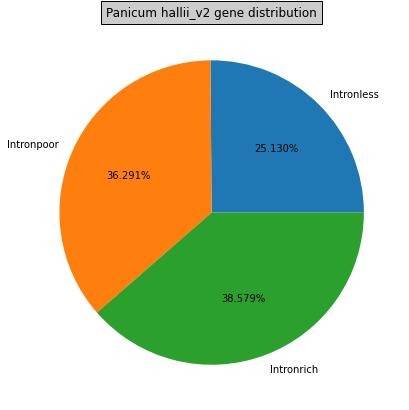

In [328]:
plotting_intron_types(10686, 15432, 16405, 'Panicum hallii_v2 gene distribution')

In [329]:
### --- Creating the list of p_halliiv2 gene IDs to check the number of transcripts using command line
intronless_file = open('Output/p_halliiv2_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/p_halliiv2_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/p_halliiv2_intronrichIDs.txt', 'a')
for i in range(len(intronless_p_halliiv2)):
    if i == len(intronless_p_halliiv2) -1:
        intronless_file.write(intronless_p_halliiv2[i])
    else:
        intronless_file.write(intronless_p_halliiv2[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_p_halliiv2)):
    if i == len(intronpoor_p_halliiv2) -1:
        intronpoor_file.write(intronpoor_p_halliiv2[i])
    else:
        intronpoor_file.write(intronpoor_p_halliiv2[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_p_halliiv2)):
    if i == len(intronrich_p_halliiv2) -1:
        intronrich_file.write(intronrich_p_halliiv2[i])
    else:
        intronrich_file.write(intronrich_p_halliiv2[i]+'\n')
intronrich_file.close()


# Panicum hallii v3 Ensembl 52

In [335]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [339]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_p_halliiv3 = pd.read_csv('Data/Panicum_hallii_fil2.PHallii_v3.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_p_halliiv3[df_p_halliiv3['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,ena,gene,10253,14037,.,+,.,ID=gene:PAHAL_1G000100;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_1G000100;logic_name=ena
15,1,ena,gene,12339,19507,.,-,.,ID=gene:PAHAL_1G000200;biotype=protein_coding;description=PDIL1-3 [Source:Projected from Arabidopsis thaliana (AT3G54960) UniProtKB/TrEMBL%3BAcc:A0A178VF09];gene_id=PAHAL_1G000200;logic_name=ena
41,1,ena,gene,26741,30384,.,+,.,ID=gene:PAHAL_1G000300;biotype=protein_coding;description=FAM10 family protein At4g22670 [Source:Projected from Arabidopsis thaliana (AT4G22670) UniProtKB/Swiss-Prot%3BAcc:Q93YR3];gene_id=PAHAL_1G000300;logic_name=ena
67,1,ena,gene,31044,31679,.,+,.,ID=gene:PAHAL_1G000400;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_1G000400;logic_name=ena
71,1,ena,gene,33295,34839,.,+,.,ID=gene:PAHAL_1G000500;biotype=protein_coding;description=AT4G22880 protein [Source:Projected from Arabidopsis thaliana (AT4G22880) UniProtKB/TrEMBL%3BAcc:Q0WWD6];gene_id=PAHAL_1G000500;logic_name=ena
...,...,...,...,...,...,...,...,...,...
599518,KZ794557,ena,gene,916,2519,.,-,.,ID=gene:PAHAL_J048700;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_J048700;logic_name=ena
599524,KZ794557,ena,gene,3672,4748,.,+,.,ID=gene:PAHAL_J048800;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_J048800;logic_name=ena
599528,KZ794557,ena,gene,13016,14911,.,+,.,ID=gene:PAHAL_J048900;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_J048900;logic_name=ena
599534,KZ794557,ena,gene,17456,18855,.,-,.,ID=gene:PAHAL_J049000;biotype=protein_coding;description=hypothetical protein;gene_id=PAHAL_J049000;logic_name=ena


In [333]:
### --- Building a separate dataframe containing all exons
exon_p_halliiv3 = df_p_halliiv3.loc[df_p_halliiv3['type'].isin(['exon'])]
exon_p_halliiv3.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,1,ena,exon,10253,10874,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-1;rank=1
6,1,ena,exon,10964,11311,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-2;rank=2
8,1,ena,exon,11390,11998,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-3;rank=3
10,1,ena,exon,12096,12266,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03506-4;rank=4
13,1,ena,exon,12336,14037,.,+,.,Parent=transcript:PAN03506;Name=PAN03506-5;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=PAN03506-5;rank=5
18,1,ena,exon,12339,13155,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-11;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=PAN03505-11;rank=11
20,1,ena,exon,13285,13341,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-10;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-10;rank=10
22,1,ena,exon,14867,15001,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-9;rank=9
24,1,ena,exon,15271,15351,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-8;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-8;rank=8
26,1,ena,exon,15438,15506,.,-,.,Parent=transcript:PAN03505;Name=PAN03505-7;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=PAN03505-7;rank=7


In [334]:
### --- Exporting the exon dataframe to a tsv file 
exon_p_halliiv3.to_csv('Data/Panicum_hallii_fil2.PHallii_v3.1.52_EXON',sep='\t',index=False,header=False)

In [336]:
### --- Counting introns type
introns_dictionary_p_halliiv3 = counting_introns_type(exon_p_halliiv3)

In [337]:
n_intronless_p_halliiv3, n_intronpoor_p_halliiv3, n_intronrich_p_halliiv3, intronless_p_halliiv3, intronpoor_p_halliiv3, intronrich_p_halliiv3 = splitting_introns_type(introns_dictionary_p_halliiv3)

Intronless are: 10793
Intronpoor are: 15999
Intronrich are: 17400


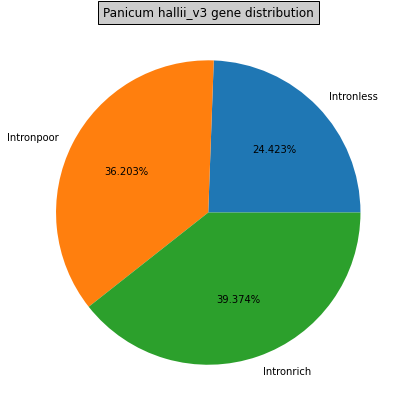

In [340]:
plotting_intron_types(10793, 15999, 17400, 'Panicum hallii_v3 gene distribution')

In [341]:
### --- Creating the list of p_halliiv3 gene IDs to check the number of transcripts using command line
intronless_file = open('Output/p_halliiv3_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/p_halliiv3_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/p_halliiv3_intronrichIDs.txt', 'a')
for i in range(len(intronless_p_halliiv3)):
    if i == len(intronless_p_halliiv3) -1:
        intronless_file.write(intronless_p_halliiv3[i])
    else:
        intronless_file.write(intronless_p_halliiv3[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_p_halliiv3)):
    if i == len(intronpoor_p_halliiv3) -1:
        intronpoor_file.write(intronpoor_p_halliiv3[i])
    else:
        intronpoor_file.write(intronpoor_p_halliiv3[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_p_halliiv3)):
    if i == len(intronrich_p_halliiv3) -1:
        intronrich_file.write(intronrich_p_halliiv3[i])
    else:
        intronrich_file.write(intronrich_p_halliiv3[i]+'\n')
intronrich_file.close()


# Saccharum spontaneum Ensembl 52

In [348]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts['-'.join(i.split('-')[:2])] = counts.get('-'.join(i.split('-')[:2]), 0) + 1
    return counts

In [342]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_spontaneum = pd.read_csv('Data/Saccharum_spontaneum.Sspon.HiC_chr_asm.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_spontaneum[df_s_spontaneum['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,2C,UIL,gene,99398907,99405018,.,+,.,ID=gene:Sspon.02G0053130-1C;biotype=protein_coding;gene_id=Sspon.02G0053130-1C;logic_name=sugarcaneuil
2,2C,UIL,gene,111842644,111843909,.,-,.,ID=gene:Sspon.02G0029880-1P;biotype=protein_coding;gene_id=Sspon.02G0029880-1P;logic_name=sugarcaneuil
3,2C,UIL,gene,73615590,73616513,.,-,.,ID=gene:Sspon.02G0040680-1P;biotype=protein_coding;gene_id=Sspon.02G0040680-1P;logic_name=sugarcaneuil
4,2C,UIL,gene,29186901,29195959,.,-,.,ID=gene:Sspon.02G0009280-3C;biotype=nontranslating_CDS;gene_id=Sspon.02G0009280-3C;logic_name=sugarcaneuil
5,2C,UIL,gene,19042602,19046137,.,-,.,ID=gene:Sspon.02G0005830-2C;biotype=protein_coding;gene_id=Sspon.02G0005830-2C;logic_name=sugarcaneuil
...,...,...,...,...,...,...,...,...,...
876221,8C,UIL,gene,705512,707484,.,-,.,ID=gene:Sspon.08G0000620-3C;biotype=nontranslating_CDS;gene_id=Sspon.08G0000620-3C;logic_name=sugarcaneuil
876222,8C,UIL,gene,45781439,45788504,.,-,.,ID=gene:Sspon.08G0010970-3C;biotype=nontranslating_CDS;gene_id=Sspon.08G0010970-3C;logic_name=sugarcaneuil
876223,8C,UIL,gene,15204778,15212087,.,+,.,ID=gene:Sspon.04G0016780-3P;biotype=protein_coding;gene_id=Sspon.04G0016780-3P;logic_name=sugarcaneuil
876224,8C,UIL,gene,6166128,6171666,.,-,.,ID=gene:Sspon.08G0018060-2C;biotype=nontranslating_CDS;gene_id=Sspon.08G0018060-2C;logic_name=sugarcaneuil


In [343]:
### --- Building a separate dataframe containing all exons
exon_s_spontaneum = df_s_spontaneum.loc[df_s_spontaneum['type'].isin(['exon'])]
exon_s_spontaneum.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
7117,2C,UIL,exon,99398907,99399087,.,+,.,Name=Sspon.02G0053130-1C-mRNA-1-E1;Parent=transcript:Sspon.02G0053130-1C-mRNA-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=Sspon.02G0053130-1C-mRNA-1-E1;rank=1
7118,2C,UIL,exon,99400150,99400749,.,+,.,Name=Sspon.02G0053130-1C-mRNA-1-E2;Parent=transcript:Sspon.02G0053130-1C-mRNA-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=Sspon.02G0053130-1C-mRNA-1-E2;rank=2
7119,2C,UIL,exon,99401952,99402179,.,+,.,Name=Sspon.02G0053130-1C-mRNA-1-E3;Parent=transcript:Sspon.02G0053130-1C-mRNA-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=Sspon.02G0053130-1C-mRNA-1-E3;rank=3
7120,2C,UIL,exon,99403458,99404169,.,+,.,Name=Sspon.02G0053130-1C-mRNA-1-E4;Parent=transcript:Sspon.02G0053130-1C-mRNA-1;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=Sspon.02G0053130-1C-mRNA-1-E4;rank=4
7121,2C,UIL,exon,99404994,99405018,.,+,.,Name=Sspon.02G0053130-1C-mRNA-1-E5;Parent=transcript:Sspon.02G0053130-1C-mRNA-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=Sspon.02G0053130-1C-mRNA-1-E5;rank=5
7122,2C,UIL,exon,111842644,111843909,.,-,.,Name=Sspon.02G0029880-1P-mRNA-1-E1;Parent=transcript:Sspon.02G0029880-1P-mRNA-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Sspon.02G0029880-1P-mRNA-1-E1;rank=1
7123,2C,UIL,exon,73615590,73616513,.,-,.,Name=Sspon.02G0040680-1P-mRNA-1-E1;Parent=transcript:Sspon.02G0040680-1P-mRNA-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=Sspon.02G0040680-1P-mRNA-1-E1;rank=1
7124,2C,UIL,exon,29195768,29195959,.,-,.,Name=Sspon.02G0009280-3C-mRNA-1-E1;Parent=transcript:Sspon.02G0009280-3C-mRNA-1;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=Sspon.02G0009280-3C-mRNA-1-E1;rank=1
7125,2C,UIL,exon,29195091,29195200,.,-,.,Name=Sspon.02G0009280-3C-mRNA-1-E2;Parent=transcript:Sspon.02G0009280-3C-mRNA-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=Sspon.02G0009280-3C-mRNA-1-E2;rank=2
7126,2C,UIL,exon,29194853,29194991,.,-,.,Name=Sspon.02G0009280-3C-mRNA-1-E3;Parent=transcript:Sspon.02G0009280-3C-mRNA-1;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=Sspon.02G0009280-3C-mRNA-1-E3;rank=3


In [345]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_spontaneum.to_csv('Data/Saccharum_spontaneum.Sspon.HiC_chr_asm.52_EXON',sep='\t',index=False,header=False)

In [349]:
### --- Counting introns type
introns_dictionary_s_spontaneum = counting_introns_type(exon_s_spontaneum)

In [350]:
n_intronless_s_spontaneum, n_intronpoor_s_spontaneum, n_intronrich_s_spontaneum, intronless_s_spontaneum, intronpoor_s_spontaneum, intronrich_s_spontaneum = splitting_introns_type(introns_dictionary_s_spontaneum)

Intronless are: 13034
Intronpoor are: 34769
Intronrich are: 36012


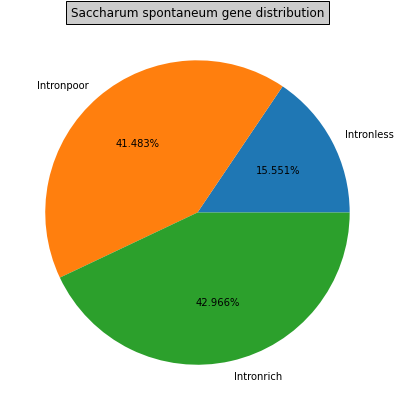

In [351]:
plotting_intron_types(13034, 34769, 36012, 'Saccharum spontaneum gene distribution')

In [352]:
### --- Creating the list of s_spontaneum gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_spontaneum_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_spontaneum_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_spontaneum_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_spontaneum)):
    if i == len(intronless_s_spontaneum) -1:
        intronless_file.write(intronless_s_spontaneum[i])
    else:
        intronless_file.write(intronless_s_spontaneum[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_spontaneum)):
    if i == len(intronpoor_s_spontaneum) -1:
        intronpoor_file.write(intronpoor_s_spontaneum[i])
    else:
        intronpoor_file.write(intronpoor_s_spontaneum[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_spontaneum)):
    if i == len(intronrich_s_spontaneum) -1:
        intronrich_file.write(intronrich_s_spontaneum[i])
    else:
        intronrich_file.write(intronrich_s_spontaneum[i]+'\n')
intronrich_file.close()


# Setaria italica Ensembl 52

In [358]:
### --- Function to count introns within a dataframe made of exons formatted like exon_s_italica
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('-')[0]] = counts.get(i.split('-')[0], 0) + 1
    return counts

In [368]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_italica = pd.read_csv('Data/Setaria_italica.Setaria_italica_v2.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_italica[df_s_italica['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,IX,ena,gene,14766756,14775140,.,-,.,ID=gene:SETIT_034148mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_034148mg;logic_name=ena
2,IX,ena,gene,18416322,18418085,.,-,.,ID=gene:SETIT_035855mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_035855mg;logic_name=ena
3,IX,ena,gene,46760055,46763665,.,-,.,ID=gene:SETIT_036433mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_036433mg;logic_name=ena
4,IX,ena,gene,53654868,53657742,.,+,.,ID=gene:SETIT_037681mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_037681mg;logic_name=ena
5,IX,ena,gene,52438319,52438762,.,+,.,ID=gene:SETIT_040293mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_040293mg;logic_name=ena
...,...,...,...,...,...,...,...,...,...
513919,KQ475666,ena,gene,81,2138,.,-,.,ID=gene:SETIT_040872mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_040872mg;logic_name=ena
513928,KQ475667,ena,gene,906,1935,.,-,.,ID=gene:SETIT_040875mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_040875mg;logic_name=ena
513938,KQ475669,ena,gene,319,771,.,-,.,ID=gene:SETIT_040876mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_040876mg;logic_name=ena
513955,KQ475687,ena,gene,233,1446,.,-,.,ID=gene:SETIT_040878mg;biotype=protein_coding;description=hypothetical protein;gene_id=SETIT_040878mg;logic_name=ena


In [354]:
### --- Building a separate dataframe containing all exons
exon_s_italica = df_s_italica.loc[df_s_italica['type'].isin(['exon'])]
exon_s_italica.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
13409,IX,ena,exon,14774614,14775083,.,-,.,Name=KQK88518-1;Parent=transcript:KQK88518;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=KQK88518-1;rank=1
13410,IX,ena,exon,14773417,14773516,.,-,.,Name=KQK88518-2;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=KQK88518-2;rank=2
13411,IX,ena,exon,14772396,14772729,.,-,.,Name=KQK88518-3;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK88518-3;rank=3
13412,IX,ena,exon,14772109,14772221,.,-,.,Name=KQK88518-4;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQK88518-4;rank=4
13413,IX,ena,exon,14771412,14771540,.,-,.,Name=KQK88518-5;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=KQK88518-5;rank=5
13414,IX,ena,exon,14771158,14771248,.,-,.,Name=KQK88518-6;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=KQK88518-6;rank=6
13415,IX,ena,exon,14770976,14771059,.,-,.,Name=KQK88518-7;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=KQK88518-7;rank=7
13416,IX,ena,exon,14769934,14770592,.,-,.,Name=KQK88518-8;Parent=transcript:KQK88518;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=KQK88518-8;rank=8
13417,IX,ena,exon,14768706,14769016,.,-,.,Name=KQK88518-9;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=KQK88518-9;rank=9
13418,IX,ena,exon,14768423,14768567,.,-,.,Name=KQK88518-10;Parent=transcript:KQK88518;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=KQK88518-10;rank=10


In [355]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_italica.to_csv('Data/Setaria_italica.Setaria_italica_v2.0.52_EXON',sep='\t',index=False,header=False)

In [359]:
### --- Counting introns type
introns_dictionary_s_italica = counting_introns_type(exon_s_italica)

In [360]:
n_intronless_s_italica, n_intronpoor_s_italica, n_intronrich_s_italica, intronless_s_italica, intronpoor_s_italica, intronrich_s_italica = splitting_introns_type(introns_dictionary_s_italica)

Intronless are: 13352
Intronpoor are: 15505
Intronrich are: 12286


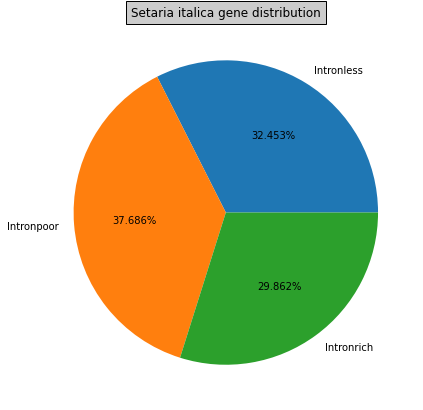

In [369]:
plotting_intron_types(13352, 15505, 12286, 'Setaria italica gene distribution')

In [370]:
### --- Creating the list of s_italica gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_italica_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_italica_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_italica_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_italica)):
    if i == len(intronless_s_italica) -1:
        intronless_file.write(intronless_s_italica[i])
    else:
        intronless_file.write(intronless_s_italica[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_italica)):
    if i == len(intronpoor_s_italica) -1:
        intronpoor_file.write(intronpoor_s_italica[i])
    else:
        intronpoor_file.write(intronpoor_s_italica[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_italica)):
    if i == len(intronrich_s_italica) -1:
        intronrich_file.write(intronrich_s_italica[i])
    else:
        intronrich_file.write(intronrich_s_italica[i]+'\n')
intronrich_file.close()


# Setaria viridis Ensembl 52

In [373]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0]] = counts.get(i.split(';')[0], 0) + 1
    return counts

In [380]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_viridis = pd.read_csv('Data/Setaria_viridis.Setaria_viridis_v2.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_viridis[df_s_viridis['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,ena,gene,1755,4225,.,+,.,ID=gene:SEVIR_1G000100v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_1G000100v2;logic_name=ena
15,1,ena,gene,34621,37252,.,+,.,ID=gene:SEVIR_1G000200v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_1G000200v2;logic_name=ena
34,1,ena,gene,34654,42181,.,-,.,ID=gene:SEVIR_1G000300v2;biotype=protein_coding;description=PDIL1-3 [Source:Projected from Arabidopsis thaliana (AT3G54960) UniProtKB/TrEMBL%3BAcc:A0A178VF09];gene_id=SEVIR_1G000300v2;logic_name=ena
60,1,ena,gene,42312,45821,.,+,.,ID=gene:SEVIR_1G000400v2;biotype=protein_coding;description=FAM10 family protein At4g22670 [Source:Projected from Arabidopsis thaliana (AT4G22670) UniProtKB/Swiss-Prot%3BAcc:Q93YR3];gene_id=SEVIR_1G000400v2;logic_name=ena
84,1,ena,gene,47313,47948,.,+,.,ID=gene:SEVIR_1G000501v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_1G000501v2;logic_name=ena
...,...,...,...,...,...,...,...,...,...
698885,9,ena,gene,56354254,56358317,.,+,.,ID=gene:SEVIR_9G584001v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_9G584001v2;logic_name=ena
698893,ML552056,ena,gene,6214,6684,.,-,.,ID=gene:SEVIR_J000301v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_J000301v2;logic_name=ena
698897,ML552056,ena,gene,22068,22538,.,-,.,ID=gene:SEVIR_J000401v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_J000401v2;logic_name=ena
698901,ML552056,ena,gene,29267,29737,.,-,.,ID=gene:SEVIR_J000501v2;biotype=protein_coding;description=hypothetical protein;gene_id=SEVIR_J000501v2;logic_name=ena


In [372]:
### --- Building a separate dataframe containing all exons
exon_s_viridis = df_s_viridis.loc[df_s_viridis['type'].isin(['exon'])]
exon_s_viridis.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,1,ena,exon,1755,2026,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TKW36712-1;rank=1
6,1,ena,exon,3016,3152,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TKW36712-2;rank=2
8,1,ena,exon,3242,3328,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36712-3;rank=3
10,1,ena,exon,3430,3588,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36712-4;rank=4
13,1,ena,exon,3720,4225,.,+,.,Parent=transcript:TKW36712;Name=TKW36712-5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TKW36712-5;rank=5
18,1,ena,exon,34621,36099,.,+,.,Parent=transcript:TKW36714;Name=TKW36714-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36714-1;rank=1
20,1,ena,exon,36185,36355,.,+,.,Parent=transcript:TKW36714;Name=TKW36714-2;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36714-2;rank=2
23,1,ena,exon,36420,37252,.,+,.,Parent=transcript:TKW36714;Name=TKW36714-3;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TKW36714-3;rank=3
27,1,ena,exon,34621,36099,.,+,.,Parent=transcript:TKW36713;Name=TKW36714-1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36714-1;rank=1
29,1,ena,exon,36185,36289,.,+,.,Parent=transcript:TKW36713;Name=TKW36713-2;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TKW36713-2;rank=2


In [374]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_viridis.to_csv('Data/Setaria_viridis.Setaria_viridis_v2.0.52_EXON',sep='\t',index=False,header=False)

In [375]:
### --- Counting introns type
introns_dictionary_s_viridis = counting_introns_type(exon_s_viridis)

In [376]:
n_intronless_s_viridis, n_intronpoor_s_viridis, n_intronrich_s_viridis, intronless_s_viridis, intronpoor_s_viridis, intronrich_s_viridis = splitting_introns_type(introns_dictionary_s_viridis)

Intronless are: 12678
Intronpoor are: 19845
Intronrich are: 19936


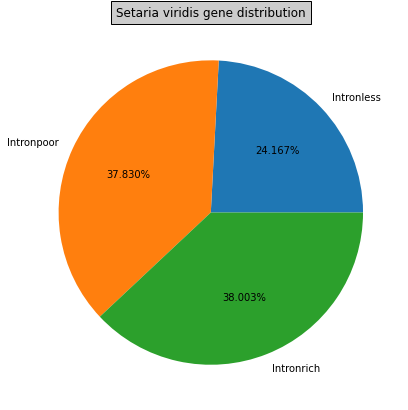

In [377]:
plotting_intron_types(12678, 19845, 19936, 'Setaria viridis gene distribution')

In [378]:
### --- Creating the list of s_viridis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_viridis_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_viridis_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_viridis_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_viridis)):
    if i == len(intronless_s_viridis) -1:
        intronless_file.write(intronless_s_viridis[i])
    else:
        intronless_file.write(intronless_s_viridis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_viridis)):
    if i == len(intronpoor_s_viridis) -1:
        intronpoor_file.write(intronpoor_s_viridis[i])
    else:
        intronpoor_file.write(intronpoor_s_viridis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_viridis)):
    if i == len(intronrich_s_viridis) -1:
        intronrich_file.write(intronrich_s_viridis[i])
    else:
        intronrich_file.write(intronrich_s_viridis[i]+'\n')
intronrich_file.close()


# Sorghum bicolor Ensembl 52

In [388]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1]] = counts.get(i.split(';')[1], 0) + 1
    return counts

In [387]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_s_bicolor = pd.read_csv('Data/Sorghum_bicolor.Sorghum_bicolor_NCBIv3.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_s_bicolor[df_s_bicolor['type']=='mRNA']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
5893,1,ena,mRNA,8895744,8900539,.,-,.,ID=transcript:OQU91098;Parent=gene:SORBI_3001G113500;biotype=protein_coding;transcript_id=OQU91098
5894,1,ena,mRNA,8895744,8900536,.,-,.,ID=transcript:EER93562;Parent=gene:SORBI_3001G113500;biotype=protein_coding;transcript_id=EER93562
5895,1,ena,mRNA,8895756,8900511,.,-,.,ID=transcript:KXG37713;Parent=gene:SORBI_3001G113500;biotype=protein_coding;transcript_id=KXG37713
5896,1,ena,mRNA,79643055,79648852,.,+,.,ID=transcript:EER92986;Parent=gene:SORBI_3001G533100;biotype=protein_coding;transcript_id=EER92986
5897,1,ena,mRNA,79643751,79648852,.,+,.,ID=transcript:OQU93386;Parent=gene:SORBI_3001G533100;biotype=protein_coding;transcript_id=OQU93386
...,...,...,...,...,...,...,...,...,...
640837,super_3247,ena,mRNA,63,1318,.,+,.,ID=transcript:OQU75566;Parent=gene:SORBI_3K030000;biotype=protein_coding;transcript_id=OQU75566
640853,super_3268,ena,mRNA,152,1565,.,-,.,ID=transcript:OQU75565;Parent=gene:SORBI_3K030100;biotype=protein_coding;transcript_id=OQU75565
640860,super_3270,ena,mRNA,592,1337,.,-,.,ID=transcript:OQU75564;Parent=gene:SORBI_3K030200;biotype=protein_coding;transcript_id=OQU75564
640881,super_3299,ena,mRNA,62,241,.,-,.,ID=transcript:OQU75562;Parent=gene:SORBI_3K030700;biotype=protein_coding;transcript_id=OQU75562


In [382]:
### --- Building a separate dataframe containing all exons
exon_s_bicolor = df_s_bicolor.loc[df_s_bicolor['type'].isin(['exon'])]
exon_s_bicolor.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
14039,1,ena,exon,8899027,8900539,.,-,.,Name=OQU91098-1;Parent=transcript:OQU91098;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=OQU91098-1;rank=1
14040,1,ena,exon,8898149,8898234,.,-,.,Name=OQU91098-2;Parent=transcript:OQU91098;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OQU91098-2;rank=2
14041,1,ena,exon,8897239,8897385,.,-,.,Name=OQU91098-3;Parent=transcript:OQU91098;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OQU91098-3;rank=3
14042,1,ena,exon,8896783,8896906,.,-,.,Name=OQU91098-4;Parent=transcript:OQU91098;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=OQU91098-4;rank=4
14043,1,ena,exon,8896360,8896649,.,-,.,Name=OQU91098-5;Parent=transcript:OQU91098;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OQU91098-5;rank=5
14044,1,ena,exon,8895744,8896194,.,-,.,Name=OQU91098-6;Parent=transcript:OQU91098;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=OQU91098-6;rank=6
14045,1,ena,exon,8899027,8900536,.,-,.,Name=EER93562-1;Parent=transcript:EER93562;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=EER93562-1;rank=1
14046,1,ena,exon,8898149,8898234,.,-,.,Name=OQU91098-2;Parent=transcript:EER93562;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=OQU91098-2;rank=2
14047,1,ena,exon,8897239,8897385,.,-,.,Name=OQU91098-3;Parent=transcript:EER93562;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=OQU91098-3;rank=3
14048,1,ena,exon,8896783,8896906,.,-,.,Name=OQU91098-4;Parent=transcript:EER93562;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=OQU91098-4;rank=4


In [384]:
### --- Exporting the exon dataframe to a tsv file 
exon_s_bicolor.to_csv('Data/Sorghum_bicolor.Sorghum_bicolor_NCBIv3.52_EXON',sep='\t',index=False,header=False)

In [391]:
### --- Counting introns type
introns_dictionary_s_bicolor = counting_introns_type(exon_s_bicolor)

In [392]:
n_intronless_s_bicolor, n_intronpoor_s_bicolor, n_intronrich_s_bicolor, intronless_s_bicolor, intronpoor_s_bicolor, intronrich_s_bicolor = splitting_introns_type(introns_dictionary_s_bicolor)

Intronless are: 11179
Intronpoor are: 19117
Intronrich are: 18263


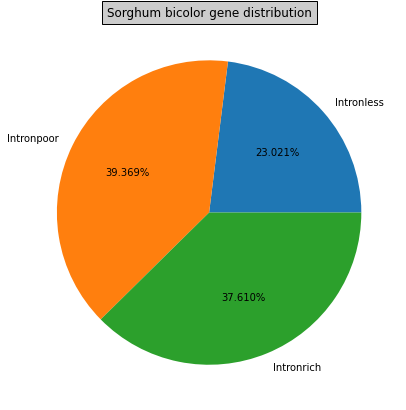

In [393]:
plotting_intron_types(11179, 19117, 18263, 'Sorghum bicolor gene distribution')

In [394]:
### --- Creating the list of s_bicolor gene IDs to check the number of transcripts using command line
intronless_file = open('Output/s_bicolor_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/s_bicolor_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/s_bicolor_intronrichIDs.txt', 'a')
for i in range(len(intronless_s_bicolor)):
    if i == len(intronless_s_bicolor) -1:
        intronless_file.write(intronless_s_bicolor[i])
    else:
        intronless_file.write(intronless_s_bicolor[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_s_bicolor)):
    if i == len(intronpoor_s_bicolor) -1:
        intronpoor_file.write(intronpoor_s_bicolor[i])
    else:
        intronpoor_file.write(intronpoor_s_bicolor[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_s_bicolor)):
    if i == len(intronrich_s_bicolor) -1:
        intronrich_file.write(intronrich_s_bicolor[i])
    else:
        intronrich_file.write(intronrich_s_bicolor[i]+'\n')
intronrich_file.close()


# Triticum aestivum arinalrfor Ensembl 52

In [409]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [407]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_arinalrfor = pd.read_csv('Data/Triticum_aestivum_arinalrfor.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_arinalrfor[df_t_aestivum_arinalrfor['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,7B,PGSB,gene,200880825,200882992,.,-,.,ID=gene:TraesARI7B03G04099930;biotype=protein_coding;gene_id=TraesARI7B03G04099930;logic_name=pgsb_genes_high_conf
2,7B,PGSB,gene,552043583,552044540,.,-,.,ID=gene:TraesARI7B03G04187610;biotype=protein_coding;gene_id=TraesARI7B03G04187610;logic_name=pgsb_genes_high_conf
3,7B,PGSB,gene,966937369,966939103,.,+,.,ID=gene:TraesARI7B03G04339890;biotype=protein_coding;gene_id=TraesARI7B03G04339890;logic_name=pgsb_genes_high_conf
4,7B,PGSB,gene,668887484,668891106,.,+,.,ID=gene:TraesARI7B03G04219050;biotype=protein_coding;gene_id=TraesARI7B03G04219050;logic_name=pgsb_genes_high_conf
5,7B,PGSB,gene,900971490,900971765,.,+,.,ID=gene:TraesARI7B03G04306990;biotype=protein_coding;gene_id=TraesARI7B03G04306990;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2362735,scaffold_v3_564470,PGSB,gene,20,859,.,-,.,ID=gene:TraesARIUn03G04734530;biotype=protein_coding;gene_id=TraesARIUn03G04734530;logic_name=pgsb_genes_high_conf
2363119,scaffold_v3_356619,PGSB,gene,150,389,.,-,.,ID=gene:TraesARIUn03G04734690;biotype=protein_coding;gene_id=TraesARIUn03G04734690;logic_name=pgsb_genes_high_conf
2363214,scaffold_v3_608817,PGSB,gene,669,893,.,-,.,ID=gene:TraesARIUn03G04734720;biotype=protein_coding;gene_id=TraesARIUn03G04734720;logic_name=pgsb_genes_high_conf
2363293,scaffold_v3_170666,PGSB,gene,290,643,.,-,.,ID=gene:TraesARIUn03G04734760;biotype=protein_coding;gene_id=TraesARIUn03G04734760;logic_name=pgsb_genes_high_conf


In [408]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_arinalrfor = df_t_aestivum_arinalrfor.loc[df_t_aestivum_arinalrfor['type'].isin(['exon'])]
exon_t_aestivum_arinalrfor.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
22408,7B,PGSB,exon,200880825,200882992,.,-,.,Name=TraesARI7B03G04099930.1-E1;Parent=transcript:TraesARI7B03G04099930.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesARI7B03G04099930.1-E1;rank=1
22409,7B,PGSB,exon,552044360,552044540,.,-,.,Name=TraesARI7B03G04187610.1-E1;Parent=transcript:TraesARI7B03G04187610.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesARI7B03G04187610.1-E1;rank=1
22410,7B,PGSB,exon,552044156,552044265,.,-,.,Name=TraesARI7B03G04187610.1-E2;Parent=transcript:TraesARI7B03G04187610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesARI7B03G04187610.1-E2;rank=2
22411,7B,PGSB,exon,552043954,552044072,.,-,.,Name=TraesARI7B03G04187610.1-E3;Parent=transcript:TraesARI7B03G04187610.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesARI7B03G04187610.1-E3;rank=3
22412,7B,PGSB,exon,552043583,552043853,.,-,.,Name=TraesARI7B03G04187610.1-E4;Parent=transcript:TraesARI7B03G04187610.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=2;exon_id=TraesARI7B03G04187610.1-E4;rank=4
22413,7B,PGSB,exon,966937369,966938032,.,+,.,Name=TraesARI7B03G04339890.1-E1;Parent=transcript:TraesARI7B03G04339890.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesARI7B03G04339890.1-E1;rank=1
22414,7B,PGSB,exon,966938127,966938360,.,+,.,Name=TraesARI7B03G04339890.1-E2;Parent=transcript:TraesARI7B03G04339890.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesARI7B03G04339890.1-E2;rank=2
22415,7B,PGSB,exon,966938445,966938567,.,+,.,Name=TraesARI7B03G04339890.1-E3;Parent=transcript:TraesARI7B03G04339890.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesARI7B03G04339890.1-E3;rank=3
22416,7B,PGSB,exon,966938655,966939103,.,+,.,Name=TraesARI7B03G04339890.1-E4;Parent=transcript:TraesARI7B03G04339890.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesARI7B03G04339890.1-E4;rank=4
22417,7B,PGSB,exon,668887484,668887623,.,+,.,Name=TraesARI7B03G04219050.1-E1;Parent=transcript:TraesARI7B03G04219050.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesARI7B03G04219050.1-E1;rank=1


In [410]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_arinalrfor.to_csv('Data/Triticum_aestivum_arinalrfor.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [411]:
### --- Counting introns type
introns_dictionary_t_aestivum_arinalrfor = counting_introns_type(exon_t_aestivum_arinalrfor)

In [412]:
n_intronless_t_aestivum_arinalrfor, n_intronpoor_t_aestivum_arinalrfor, n_intronrich_t_aestivum_arinalrfor, intronless_t_aestivum_arinalrfor, intronpoor_t_aestivum_arinalrfor, intronrich_t_aestivum_arinalrfor = splitting_introns_type(introns_dictionary_t_aestivum_arinalrfor)

Intronless are: 40238
Intronpoor are: 56330
Intronrich are: 47208


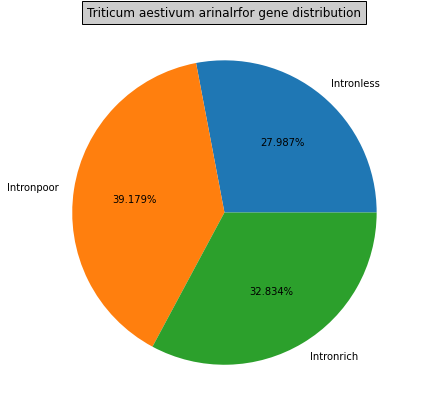

In [413]:
plotting_intron_types(40238, 56330, 47208, 'Triticum aestivum arinalrfor gene distribution')

In [414]:
### --- Creating the list of t_aestivum_arinalrfor gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_arinalrfor_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_arinalrfor_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_arinalrfor_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_arinalrfor)):
    if i == len(intronless_t_aestivum_arinalrfor) -1:
        intronless_file.write(intronless_t_aestivum_arinalrfor[i])
    else:
        intronless_file.write(intronless_t_aestivum_arinalrfor[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_arinalrfor)):
    if i == len(intronpoor_t_aestivum_arinalrfor) -1:
        intronpoor_file.write(intronpoor_t_aestivum_arinalrfor[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_arinalrfor[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_arinalrfor)):
    if i == len(intronrich_t_aestivum_arinalrfor) -1:
        intronrich_file.write(intronrich_t_aestivum_arinalrfor[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_arinalrfor[i]+'\n')
intronrich_file.close()


# Triticum aestivum cadenza Ensembl 52

In [419]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0].split('.')[0]] = counts.get(i.split(';')[0].split('.')[0], 0) + 1
    return counts

In [425]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_cadenza = pd.read_csv('Data/Triticum_aestivum_cadenza.EIv1.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_cadenza[df_t_aestivum_cadenza['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,cad_scaffold_000001,PGSB_2019,gene,341317,349361,.,-,.,ID=gene:TraesCAD_scaffold_000001_01G000100;biotype=protein_coding;gene_id=TraesCAD_scaffold_000001_01G000100;logic_name=gff3_genes
8,cad_scaffold_000001,PGSB_2019,gene,373944,374939,.,+,.,ID=gene:TraesCAD_scaffold_000001_01G000200;biotype=protein_coding;gene_id=TraesCAD_scaffold_000001_01G000200;logic_name=gff3_genes
15,cad_scaffold_000001,PGSB_2019,gene,381979,388127,.,+,.,ID=gene:TraesCAD_scaffold_000001_01G000300;biotype=protein_coding;gene_id=TraesCAD_scaffold_000001_01G000300;logic_name=gff3_genes
29,cad_scaffold_000003,PGSB_2019,gene,129997,130509,.,-,.,ID=gene:TraesCAD_scaffold_000003_01G000100;biotype=protein_coding;gene_id=TraesCAD_scaffold_000003_01G000100;logic_name=gff3_genes
35,cad_scaffold_000003,PGSB_2019,gene,233346,233765,.,-,.,ID=gene:TraesCAD_scaffold_000003_01G000200;biotype=protein_coding;gene_id=TraesCAD_scaffold_000003_01G000200;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
2331352,cad_scaffold_999165,PGSB_2019,gene,412,627,.,+,.,ID=gene:TraesCAD_scaffold_999165_01G000100;biotype=protein_coding;gene_id=TraesCAD_scaffold_999165_01G000100;logic_name=gff3_genes
2331655,cad_scaffold_999464,PGSB_2019,gene,543,921,.,+,.,ID=gene:TraesCAD_scaffold_999464_01G000100;biotype=protein_coding;gene_id=TraesCAD_scaffold_999464_01G000100;logic_name=gff3_genes
2331816,cad_scaffold_999618,PGSB_2019,gene,148,932,.,+,.,ID=gene:TraesCAD_scaffold_999618_01G000100;biotype=protein_coding;gene_id=TraesCAD_scaffold_999618_01G000100;logic_name=gff3_genes
2331926,cad_scaffold_999723,PGSB_2019,gene,24,119,.,-,.,ID=gene:TraesCAD_scaffold_999723_01G000100;biotype=protein_coding;gene_id=TraesCAD_scaffold_999723_01G000100;logic_name=gff3_genes


In [417]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_cadenza = df_t_aestivum_cadenza.loc[df_t_aestivum_cadenza['type'].isin(['exon'])]
exon_t_aestivum_cadenza.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,cad_scaffold_000001,ensembl,exon,341317,341568,.,-,.,Parent=transcript:TraesCAD_scaffold_000001_01G000100.1;Name=TraesCAD_scaffold_000001_01G000100.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=TraesCAD_scaffold_000001_01G000100.1-E2;rank=2
6,cad_scaffold_000001,ensembl,exon,349232,349361,.,-,.,Parent=transcript:TraesCAD_scaffold_000001_01G000100.1;Name=TraesCAD_scaffold_000001_01G000100.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000100.1-E1;rank=1
10,cad_scaffold_000001,ensembl,exon,373944,374720,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000200.1;Name=TraesCAD_scaffold_000001_01G000200.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000200.1-E1;rank=1
13,cad_scaffold_000001,ensembl,exon,374803,374939,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000200.1;Name=TraesCAD_scaffold_000001_01G000200.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000200.1-E2;rank=2
17,cad_scaffold_000001,ensembl,exon,381979,382652,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000300.1;Name=TraesCAD_scaffold_000001_01G000300.1-E1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000300.1-E1;rank=1
19,cad_scaffold_000001,ensembl,exon,383936,384080,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000300.1;Name=TraesCAD_scaffold_000001_01G000300.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesCAD_scaffold_000001_01G000300.1-E2;rank=2
21,cad_scaffold_000001,ensembl,exon,384150,385967,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000300.1;Name=TraesCAD_scaffold_000001_01G000300.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000300.1-E3;rank=3
23,cad_scaffold_000001,ensembl,exon,387402,387890,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000300.1;Name=TraesCAD_scaffold_000001_01G000300.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000300.1-E4;rank=4
25,cad_scaffold_000001,ensembl,exon,387933,388127,.,+,.,Parent=transcript:TraesCAD_scaffold_000001_01G000300.1;Name=TraesCAD_scaffold_000001_01G000300.1-E5;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCAD_scaffold_000001_01G000300.1-E5;rank=5
31,cad_scaffold_000003,ensembl,exon,129997,130223,.,-,.,Parent=transcript:TraesCAD_scaffold_000003_01G000100.1;Name=TraesCAD_scaffold_000003_01G000100.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesCAD_scaffold_000003_01G000100.1-E2;rank=2


In [418]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_cadenza.to_csv('Data/Triticum_aestivum_cadenza.EIv1.1.52_EXON',sep='\t',index=False,header=False)

In [420]:
### --- Counting introns type
introns_dictionary_t_aestivum_cadenza = counting_introns_type(exon_t_aestivum_cadenza)

In [421]:
n_intronless_t_aestivum_cadenza, n_intronpoor_t_aestivum_cadenza, n_intronrich_t_aestivum_cadenza, intronless_t_aestivum_cadenza, intronpoor_t_aestivum_cadenza, intronrich_t_aestivum_cadenza = splitting_introns_type(introns_dictionary_t_aestivum_cadenza)

Intronless are: 37670
Intronpoor are: 55463
Intronrich are: 35411


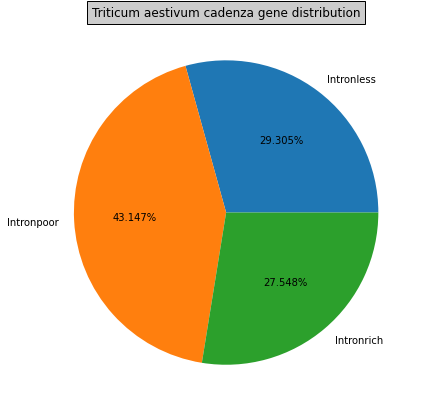

In [426]:
plotting_intron_types(37670, 55463, 35411, 'Triticum aestivum cadenza gene distribution')

In [427]:
### --- Creating the list of t_aestivum_cadenza gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_cadenza_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_cadenza_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_cadenza_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_cadenza)):
    if i == len(intronless_t_aestivum_cadenza) -1:
        intronless_file.write(intronless_t_aestivum_cadenza[i])
    else:
        intronless_file.write(intronless_t_aestivum_cadenza[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_cadenza)):
    if i == len(intronpoor_t_aestivum_cadenza) -1:
        intronpoor_file.write(intronpoor_t_aestivum_cadenza[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_cadenza[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_cadenza)):
    if i == len(intronrich_t_aestivum_cadenza) -1:
        intronrich_file.write(intronrich_t_aestivum_cadenza[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_cadenza[i]+'\n')
intronrich_file.close()


# Triticum aestivum claire Ensembl 52

In [432]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0].split('.')[0]] = counts.get(i.split(';')[0].split('.')[0], 0) + 1
    return counts

In [436]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_claire = pd.read_csv('Data/Triticum_aestivum_claire.EIv1.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_claire[df_t_aestivum_claire['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
2,cle_scaffold_000002,PGSB_2019,gene,21459,24077,.,-,.,ID=gene:TraesCLE_scaffold_000002_01G000100;biotype=protein_coding;gene_id=TraesCLE_scaffold_000002_01G000100;logic_name=gff3_genes
16,cle_scaffold_000002,PGSB_2019,gene,343852,344175,.,+,.,ID=gene:TraesCLE_scaffold_000002_01G000300;biotype=protein_coding;gene_id=TraesCLE_scaffold_000002_01G000300;logic_name=gff3_genes
20,cle_scaffold_000002,PGSB_2019,gene,349865,350371,.,+,.,ID=gene:TraesCLE_scaffold_000002_01G000400;biotype=protein_coding;gene_id=TraesCLE_scaffold_000002_01G000400;logic_name=gff3_genes
35,cle_scaffold_000002,PGSB_2019,gene,440434,442129,.,-,.,ID=gene:TraesCLE_scaffold_000002_01G000600;biotype=protein_coding;gene_id=TraesCLE_scaffold_000002_01G000600;logic_name=gff3_genes
45,cle_scaffold_000002,PGSB_2019,gene,882595,883860,.,-,.,ID=gene:TraesCLE_scaffold_000002_01G000700;biotype=protein_coding;gene_id=TraesCLE_scaffold_000002_01G000700;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
2469345,cle_scaffold_997532,PGSB_2019,gene,476,712,.,-,.,ID=gene:TraesCLE_scaffold_997532_01G000100;biotype=protein_coding;gene_id=TraesCLE_scaffold_997532_01G000100;logic_name=gff3_genes
2469599,cle_scaffold_997779,PGSB_2019,gene,629,1140,.,+,.,ID=gene:TraesCLE_scaffold_997779_01G000100;biotype=protein_coding;gene_id=TraesCLE_scaffold_997779_01G000100;logic_name=gff3_genes
2470742,cle_scaffold_998916,PGSB_2019,gene,282,1071,.,-,.,ID=gene:TraesCLE_scaffold_998916_01G000100;biotype=protein_coding;gene_id=TraesCLE_scaffold_998916_01G000100;logic_name=gff3_genes
2471633,cle_scaffold_999796,PGSB_2019,gene,522,1035,.,+,.,ID=gene:TraesCLE_scaffold_999796_01G000100;biotype=protein_coding;gene_id=TraesCLE_scaffold_999796_01G000100;logic_name=gff3_genes


In [429]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_claire = df_t_aestivum_claire.loc[df_t_aestivum_claire['type'].isin(['exon'])]
exon_t_aestivum_claire.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,cle_scaffold_000002,ensembl,exon,21459,24077,.,-,.,Parent=transcript:TraesCLE_scaffold_000002_01G000100.1;Name=TraesCLE_scaffold_000002_01G000100.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCLE_scaffold_000002_01G000100.1-E1;rank=1
8,cle_scaffold_000002,ensembl,exon,338814,338878,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E1;rank=1
9,cle_scaffold_000002,ensembl,exon,339007,339048,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E2;rank=2
10,cle_scaffold_000002,ensembl,exon,339121,339180,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E3;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E3;rank=3
11,cle_scaffold_000002,ensembl,exon,339325,339445,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E4;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E4;rank=4
12,cle_scaffold_000002,ensembl,exon,339538,339681,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E5;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E5;rank=5
13,cle_scaffold_000002,ensembl,exon,339800,339935,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E6;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E6;rank=6
14,cle_scaffold_000002,ensembl,exon,340161,340228,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E7;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E7;rank=7
15,cle_scaffold_000002,ensembl,exon,340313,340456,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000200.1;Name=TraesCLE_scaffold_000002_01G000200.1-E8;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesCLE_scaffold_000002_01G000200.1-E8;rank=8
18,cle_scaffold_000002,ensembl,exon,343852,344175,.,+,.,Parent=transcript:TraesCLE_scaffold_000002_01G000300.1;Name=TraesCLE_scaffold_000002_01G000300.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCLE_scaffold_000002_01G000300.1-E1;rank=1


In [430]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_claire.to_csv('Data/Triticum_aestivum_claire.EIv1.1.52.gff3_EXON',sep='\t',index=False,header=False)

In [433]:
### --- Counting introns type
introns_dictionary_t_aestivum_claire = counting_introns_type(exon_t_aestivum_claire)

In [434]:
n_intronless_t_aestivum_claire, n_intronpoor_t_aestivum_claire, n_intronrich_t_aestivum_claire, intronless_t_aestivum_claire, intronpoor_t_aestivum_claire, intronrich_t_aestivum_claire = splitting_introns_type(introns_dictionary_t_aestivum_claire)

Intronless are: 37366
Intronpoor are: 54795
Intronrich are: 35145


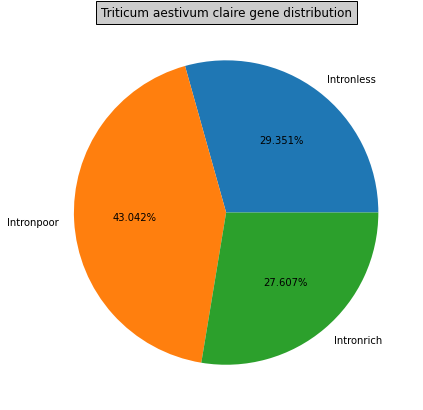

In [437]:
plotting_intron_types(37366, 54795, 35145, 'Triticum aestivum claire gene distribution')

In [438]:
### --- Creating the list of t_aestivum_claire gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_claire_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_claire_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_claire_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_claire)):
    if i == len(intronless_t_aestivum_claire) -1:
        intronless_file.write(intronless_t_aestivum_claire[i])
    else:
        intronless_file.write(intronless_t_aestivum_claire[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_claire)):
    if i == len(intronpoor_t_aestivum_claire) -1:
        intronpoor_file.write(intronpoor_t_aestivum_claire[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_claire[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_claire)):
    if i == len(intronrich_t_aestivum_claire) -1:
        intronrich_file.write(intronrich_t_aestivum_claire[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_claire[i]+'\n')
intronrich_file.close()


# Triticum aestivum IWGSC Ensembl 52

In [398]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [404]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_IWGSC = pd.read_csv('Data/Triticum_aestivum.IWGSC.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_IWGSC[df_t_aestivum_IWGSC['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,IWGSC,gene,437485675,437505353,.,+,.,ID=gene:TraesCS3B02G271600;biotype=protein_coding;description=Protein VACUOLELESS1 [Source:Projected from Arabidopsis thaliana (AT2G38020) UniProtKB/Swiss-Prot%3BAcc:Q93VQ0];gene_id=TraesCS3B02G271600;logic_name=iwgsc_high_conf
2,3B,IWGSC,gene,1480388,1481723,.,-,.,ID=gene:TraesCS3B02G001500;biotype=protein_coding;gene_id=TraesCS3B02G001500;logic_name=iwgsc_high_conf
3,3B,IWGSC,gene,398586979,398590714,.,-,.,ID=gene:TraesCS3B02G249800;biotype=protein_coding;gene_id=TraesCS3B02G249800;logic_name=iwgsc_high_conf
4,3B,IWGSC,gene,784485154,784492960,.,-,.,ID=gene:TraesCS3B02G549000;biotype=protein_coding;gene_id=TraesCS3B02G549000;logic_name=iwgsc_high_conf
5,3B,IWGSC,gene,441455941,441461088,.,-,.,ID=gene:TraesCS3B02G274100;biotype=protein_coding;gene_id=TraesCS3B02G274100;logic_name=iwgsc_high_conf
...,...,...,...,...,...,...,...,...,...
1889790,6D,IWGSC,gene,472799520,472802854,.,-,.,ID=gene:TraesCS6D02G406000;biotype=protein_coding;gene_id=TraesCS6D02G406000;logic_name=iwgsc_high_conf
1889791,6D,IWGSC,gene,419885163,419886225,.,-,.,ID=gene:TraesCS6D02G309400;biotype=protein_coding;description=Glutaredoxin-like protein [Source:UniProtKB/TrEMBL%3BAcc:A0A1D6BAK8];gene_id=TraesCS6D02G309400;logic_name=iwgsc_high_conf
1889792,6D,IWGSC,gene,387648836,387651380,.,+,.,ID=gene:TraesCS6D02G279400;biotype=protein_coding;gene_id=TraesCS6D02G279400;logic_name=iwgsc_high_conf
1889793,6D,IWGSC,gene,271601491,271612688,.,-,.,ID=gene:TraesCS6D02G196000;biotype=protein_coding;gene_id=TraesCS6D02G196000;logic_name=iwgsc_high_conf


In [396]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_IWGSC = df_t_aestivum_IWGSC.loc[df_t_aestivum_IWGSC['type'].isin(['exon'])]
exon_t_aestivum_IWGSC.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
13861,3B,IWGSC,exon,437485675,437486708,.,+,.,Name=TraesCS3B02G271600.1-E1;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesCS3B02G271600.1-E1;rank=1
13862,3B,IWGSC,exon,437486856,437487146,.,+,.,Name=TraesCS3B02G271600.1-E2;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E2;rank=2
13863,3B,IWGSC,exon,437499330,437499469,.,+,.,Name=TraesCS3B02G271600.1-E3;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E3;rank=3
13864,3B,IWGSC,exon,437501124,437501229,.,+,.,Name=TraesCS3B02G271600.1-E4;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesCS3B02G271600.1-E4;rank=4
13865,3B,IWGSC,exon,437501323,437501415,.,+,.,Name=TraesCS3B02G271600.1-E5;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E5;rank=5
13866,3B,IWGSC,exon,437501586,437501675,.,+,.,Name=TraesCS3B02G271600.1-E6;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E6;rank=6
13867,3B,IWGSC,exon,437501749,437501862,.,+,.,Name=TraesCS3B02G271600.1-E7;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E7;rank=7
13868,3B,IWGSC,exon,437502745,437502867,.,+,.,Name=TraesCS3B02G271600.1-E8;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E8;rank=8
13869,3B,IWGSC,exon,437503068,437503141,.,+,.,Name=TraesCS3B02G271600.1-E9;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesCS3B02G271600.1-E9;rank=9
13870,3B,IWGSC,exon,437503224,437503278,.,+,.,Name=TraesCS3B02G271600.1-E10;Parent=transcript:TraesCS3B02G271600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesCS3B02G271600.1-E10;rank=10


In [397]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_IWGSC.to_csv('Data/Triticum_aestivum.IWGSC.52_EXON',sep='\t',index=False,header=False)

In [399]:
### --- Counting introns type
introns_dictionary_t_aestivum_IWGSC = counting_introns_type(exon_t_aestivum_IWGSC)

In [400]:
n_intronless_t_aestivum_IWGSC, n_intronpoor_t_aestivum_IWGSC, n_intronrich_t_aestivum_IWGSC, intronless_t_aestivum_IWGSC, intronpoor_t_aestivum_IWGSC, intronrich_t_aestivum_IWGSC = splitting_introns_type(introns_dictionary_t_aestivum_IWGSC)

Intronless are: 39555
Intronpoor are: 40513
Intronrich are: 40676


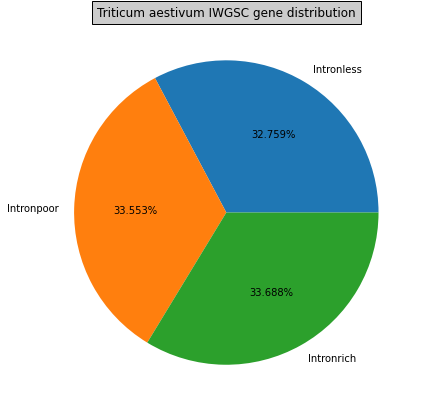

In [405]:
plotting_intron_types(39555, 40513, 40676, 'Triticum aestivum IWGSC gene distribution')

In [406]:
### --- Creating the list of t_aestivum_IWGSC gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_IWGSC_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_IWGSC_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_IWGSC_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_IWGSC)):
    if i == len(intronless_t_aestivum_IWGSC) -1:
        intronless_file.write(intronless_t_aestivum_IWGSC[i])
    else:
        intronless_file.write(intronless_t_aestivum_IWGSC[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_IWGSC)):
    if i == len(intronpoor_t_aestivum_IWGSC) -1:
        intronpoor_file.write(intronpoor_t_aestivum_IWGSC[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_IWGSC[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_IWGSC)):
    if i == len(intronrich_t_aestivum_IWGSC) -1:
        intronrich_file.write(intronrich_t_aestivum_IWGSC[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_IWGSC[i]+'\n')
intronrich_file.close()


# Triticum aestivum jagger Ensembl 52

In [442]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [439]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_jagger = pd.read_csv('Data/Triticum_aestivum_jagger.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_jagger[df_t_aestivum_jagger['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,237697642,237702674,.,-,.,ID=gene:TraesJAG3B03G01621500;biotype=protein_coding;gene_id=TraesJAG3B03G01621500;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,249453206,249467931,.,-,.,ID=gene:TraesJAG3B03G01623900;biotype=protein_coding;gene_id=TraesJAG3B03G01623900;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,725069273,725071759,.,-,.,ID=gene:TraesJAG3B03G01742850;biotype=protein_coding;gene_id=TraesJAG3B03G01742850;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,259067460,259070405,.,-,.,ID=gene:TraesJAG3B03G01626370;biotype=protein_coding;gene_id=TraesJAG3B03G01626370;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,59929795,59930895,.,-,.,ID=gene:TraesJAG3B03G01570530;biotype=protein_coding;gene_id=TraesJAG3B03G01570530;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2193259,scaffold_v14_85568,PGSB,gene,471,901,.,-,.,ID=gene:TraesJAGUn03G04594250;biotype=protein_coding;gene_id=TraesJAGUn03G04594250;logic_name=pgsb_genes_high_conf
2195105,scaffold_v14_84290,PGSB,gene,583,846,.,-,.,ID=gene:TraesJAGUn03G04594600;biotype=protein_coding;gene_id=TraesJAGUn03G04594600;logic_name=pgsb_genes_high_conf
2201030,scaffold_v14_46931,PGSB,gene,47,677,.,+,.,ID=gene:TraesJAGUn03G04595940;biotype=protein_coding;gene_id=TraesJAGUn03G04595940;logic_name=pgsb_genes_high_conf
2204517,scaffold_v14_99344,PGSB,gene,64,315,.,-,.,ID=gene:TraesJAGUn03G04596490;biotype=protein_coding;gene_id=TraesJAGUn03G04596490;logic_name=pgsb_genes_high_conf


In [440]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_jagger = df_t_aestivum_jagger.loc[df_t_aestivum_jagger['type'].isin(['exon'])]
exon_t_aestivum_jagger.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17383,3B,PGSB,exon,237702087,237702674,.,-,.,Name=TraesJAG3B03G01621500.1-E1;Parent=transcript:TraesJAG3B03G01621500.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesJAG3B03G01621500.1-E1;rank=1
17384,3B,PGSB,exon,237697642,237698576,.,-,.,Name=TraesJAG3B03G01621500.1-E2;Parent=transcript:TraesJAG3B03G01621500.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesJAG3B03G01621500.1-E2;rank=2
17385,3B,PGSB,exon,249467749,249467931,.,-,.,Name=TraesJAG3B03G01623900.1-E1;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesJAG3B03G01623900.1-E1;rank=1
17386,3B,PGSB,exon,249466400,249466867,.,-,.,Name=TraesJAG3B03G01623900.1-E2;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesJAG3B03G01623900.1-E2;rank=2
17387,3B,PGSB,exon,249465631,249466005,.,-,.,Name=TraesJAG3B03G01623900.1-E3;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesJAG3B03G01623900.1-E3;rank=3
17388,3B,PGSB,exon,249464129,249464341,.,-,.,Name=TraesJAG3B03G01623900.1-E4;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesJAG3B03G01623900.1-E4;rank=4
17389,3B,PGSB,exon,249455086,249455457,.,-,.,Name=TraesJAG3B03G01623900.1-E5;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesJAG3B03G01623900.1-E5;rank=5
17390,3B,PGSB,exon,249454689,249454932,.,-,.,Name=TraesJAG3B03G01623900.1-E6;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=TraesJAG3B03G01623900.1-E6;rank=6
17391,3B,PGSB,exon,249454456,249454603,.,-,.,Name=TraesJAG3B03G01623900.1-E7;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesJAG3B03G01623900.1-E7;rank=7
17392,3B,PGSB,exon,249453206,249453851,.,-,.,Name=TraesJAG3B03G01623900.1-E8;Parent=transcript:TraesJAG3B03G01623900.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesJAG3B03G01623900.1-E8;rank=8


In [441]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_jagger.to_csv('Data/Triticum_aestivum_jagger.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [443]:
### --- Counting introns type
introns_dictionary_t_aestivum_jagger = counting_introns_type(exon_t_aestivum_jagger)

In [444]:
n_intronless_t_aestivum_jagger, n_intronpoor_t_aestivum_jagger, n_intronrich_t_aestivum_jagger, intronless_t_aestivum_jagger, intronpoor_t_aestivum_jagger, intronrich_t_aestivum_jagger = splitting_introns_type(introns_dictionary_t_aestivum_jagger)

Intronless are: 39352
Intronpoor are: 55120
Intronrich are: 45910


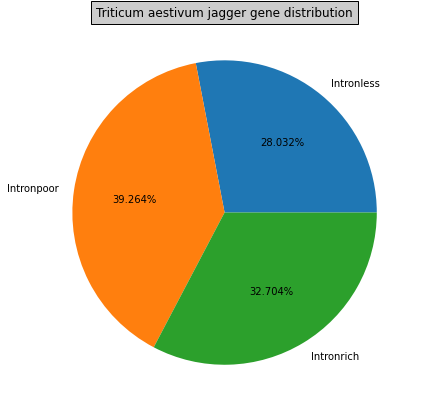

In [445]:
plotting_intron_types(39352, 55120, 45910, 'Triticum aestivum jagger gene distribution')

In [446]:
### --- Creating the list of t_aestivum_jagger gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_jagger_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_jagger_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_jagger_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_jagger)):
    if i == len(intronless_t_aestivum_jagger) -1:
        intronless_file.write(intronless_t_aestivum_jagger[i])
    else:
        intronless_file.write(intronless_t_aestivum_jagger[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_jagger)):
    if i == len(intronpoor_t_aestivum_jagger) -1:
        intronpoor_file.write(intronpoor_t_aestivum_jagger[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_jagger[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_jagger)):
    if i == len(intronrich_t_aestivum_jagger) -1:
        intronrich_file.write(intronrich_t_aestivum_jagger[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_jagger[i]+'\n')
intronrich_file.close()


# Triticum aestivum julius Ensembl 52

In [450]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [447]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_julius = pd.read_csv('Data/Triticum_aestivum_julius.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_julius[df_t_aestivum_julius['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,217610941,217613425,.,-,.,ID=gene:TraesJUL3B03G01622550;biotype=protein_coding;gene_id=TraesJUL3B03G01622550;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,5847379,5849401,.,-,.,ID=gene:TraesJUL3B03G01548790;biotype=protein_coding;gene_id=TraesJUL3B03G01548790;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,608733163,608734159,.,-,.,ID=gene:TraesJUL3B03G01713680;biotype=protein_coding;gene_id=TraesJUL3B03G01713680;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,5779216,5799802,.,+,.,ID=gene:TraesJUL3B03G01548700;biotype=protein_coding;gene_id=TraesJUL3B03G01548700;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,381452150,381459350,.,+,.,ID=gene:TraesJUL3B03G01653860;biotype=protein_coding;gene_id=TraesJUL3B03G01653860;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2346132,scaffold_v5_65315,PGSB,gene,523,904,.,+,.,ID=gene:TraesJULUn03G04607290;biotype=protein_coding;gene_id=TraesJULUn03G04607290;logic_name=pgsb_genes_high_conf
2349885,scaffold_v5_61077,PGSB,gene,166,840,.,-,.,ID=gene:TraesJULUn03G04608570;biotype=protein_coding;gene_id=TraesJULUn03G04608570;logic_name=pgsb_genes_high_conf
2358398,scaffold_v5_18464,PGSB,gene,37,630,.,+,.,ID=gene:TraesJULUn03G04611230;biotype=protein_coding;gene_id=TraesJULUn03G04611230;logic_name=pgsb_genes_high_conf
2360503,scaffold_v5_47164,PGSB,gene,161,894,.,-,.,ID=gene:TraesJULUn03G04611900;biotype=protein_coding;gene_id=TraesJULUn03G04611900;logic_name=pgsb_genes_high_conf


In [448]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_julius = df_t_aestivum_julius.loc[df_t_aestivum_julius['type'].isin(['exon'])]
exon_t_aestivum_julius.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17645,3B,PGSB,exon,217611889,217613425,.,-,.,Name=TraesJUL3B03G01622550.1-E1;Parent=transcript:TraesJUL3B03G01622550.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesJUL3B03G01622550.1-E1;rank=1
17646,3B,PGSB,exon,217611678,217611766,.,-,.,Name=TraesJUL3B03G01622550.1-E2;Parent=transcript:TraesJUL3B03G01622550.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesJUL3B03G01622550.1-E2;rank=2
17647,3B,PGSB,exon,217611366,217611491,.,-,.,Name=TraesJUL3B03G01622550.1-E3;Parent=transcript:TraesJUL3B03G01622550.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesJUL3B03G01622550.1-E3;rank=3
17648,3B,PGSB,exon,217610941,217611222,.,-,.,Name=TraesJUL3B03G01622550.1-E4;Parent=transcript:TraesJUL3B03G01622550.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesJUL3B03G01622550.1-E4;rank=4
17649,3B,PGSB,exon,5848757,5849401,.,-,.,Name=TraesJUL3B03G01548790.1-E1;Parent=transcript:TraesJUL3B03G01548790.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesJUL3B03G01548790.1-E1;rank=1
17650,3B,PGSB,exon,5848440,5848675,.,-,.,Name=TraesJUL3B03G01548790.1-E2;Parent=transcript:TraesJUL3B03G01548790.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesJUL3B03G01548790.1-E2;rank=2
17651,3B,PGSB,exon,5847901,5848311,.,-,.,Name=TraesJUL3B03G01548790.1-E3;Parent=transcript:TraesJUL3B03G01548790.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesJUL3B03G01548790.1-E3;rank=3
17652,3B,PGSB,exon,5847379,5847803,.,-,.,Name=TraesJUL3B03G01548790.1-E4;Parent=transcript:TraesJUL3B03G01548790.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesJUL3B03G01548790.1-E4;rank=4
17653,3B,PGSB,exon,608733884,608734159,.,-,.,Name=TraesJUL3B03G01713680.1-E1;Parent=transcript:TraesJUL3B03G01713680.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesJUL3B03G01713680.1-E1;rank=1
17654,3B,PGSB,exon,608733646,608733707,.,-,.,Name=TraesJUL3B03G01713680.1-E2;Parent=transcript:TraesJUL3B03G01713680.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesJUL3B03G01713680.1-E2;rank=2


In [449]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_julius.to_csv('Data/Triticum_aestivum_julius.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [451]:
### --- Counting introns type
introns_dictionary_t_aestivum_julius = counting_introns_type(exon_t_aestivum_julius)

In [452]:
n_intronless_t_aestivum_julius, n_intronpoor_t_aestivum_julius, n_intronrich_t_aestivum_julius, intronless_t_aestivum_julius, intronpoor_t_aestivum_julius, intronrich_t_aestivum_julius = splitting_introns_type(introns_dictionary_t_aestivum_julius)

Intronless are: 38770
Intronpoor are: 54545
Intronrich are: 47668


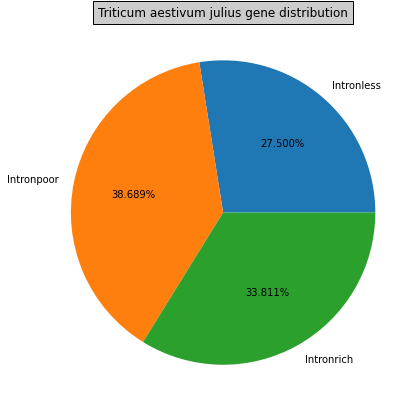

In [453]:
plotting_intron_types(38770, 54545, 47668, 'Triticum aestivum julius gene distribution')

In [454]:
### --- Creating the list of t_aestivum_julius gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_julius_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_julius_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_julius_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_julius)):
    if i == len(intronless_t_aestivum_julius) -1:
        intronless_file.write(intronless_t_aestivum_julius[i])
    else:
        intronless_file.write(intronless_t_aestivum_julius[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_julius)):
    if i == len(intronpoor_t_aestivum_julius) -1:
        intronpoor_file.write(intronpoor_t_aestivum_julius[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_julius[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_julius)):
    if i == len(intronrich_t_aestivum_julius) -1:
        intronrich_file.write(intronrich_t_aestivum_julius[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_julius[i]+'\n')
intronrich_file.close()


# Triticum aestivum lancer Ensembl 52

In [459]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [456]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_lancer = pd.read_csv('Data/Triticum_aestivum_lancer.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_lancer[df_t_aestivum_lancer['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,305700031,305725885,.,-,.,ID=gene:TraesLAC3B03G01569440;biotype=protein_coding;gene_id=TraesLAC3B03G01569440;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,265514165,265522061,.,-,.,ID=gene:TraesLAC3B03G01563280;biotype=protein_coding;gene_id=TraesLAC3B03G01563280;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,135755956,135757400,.,+,.,ID=gene:TraesLAC3B03G01529500;biotype=protein_coding;gene_id=TraesLAC3B03G01529500;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,319584659,319584772,.,+,.,ID=gene:TraesLAC3B03G01571590;biotype=protein_coding;gene_id=TraesLAC3B03G01571590;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,494076249,494084208,.,+,.,ID=gene:TraesLAC3B03G01614200;biotype=protein_coding;gene_id=TraesLAC3B03G01614200;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2211134,scaffold_corrected_v1_600088,PGSB,gene,5,997,.,-,.,ID=gene:TraesLACUn03G04598310;biotype=protein_coding;gene_id=TraesLACUn03G04598310;logic_name=pgsb_genes_high_conf
2211355,scaffold_corrected_v1_1131894,PGSB,gene,3,673,.,+,.,ID=gene:TraesLACUn03G04598450;biotype=protein_coding;gene_id=TraesLACUn03G04598450;logic_name=pgsb_genes_high_conf
2213162,scaffold_corrected_v1_171493,PGSB,gene,188,736,.,+,.,ID=gene:TraesLACUn03G04599270;biotype=protein_coding;gene_id=TraesLACUn03G04599270;logic_name=pgsb_genes_high_conf
2214087,scaffold_corrected_v1_306013,PGSB,gene,592,831,.,-,.,ID=gene:TraesLACUn03G04599560;biotype=protein_coding;gene_id=TraesLACUn03G04599560;logic_name=pgsb_genes_high_conf


In [457]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_lancer = df_t_aestivum_lancer.loc[df_t_aestivum_lancer['type'].isin(['exon'])]
exon_t_aestivum_lancer.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17360,3B,PGSB,exon,305725570,305725885,.,-,.,Name=TraesLAC3B03G01569440.1-E1;Parent=transcript:TraesLAC3B03G01569440.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesLAC3B03G01569440.1-E1;rank=1
17361,3B,PGSB,exon,305716912,305717204,.,-,.,Name=TraesLAC3B03G01569440.1-E2;Parent=transcript:TraesLAC3B03G01569440.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesLAC3B03G01569440.1-E2;rank=2
17362,3B,PGSB,exon,305706042,305706332,.,-,.,Name=TraesLAC3B03G01569440.1-E3;Parent=transcript:TraesLAC3B03G01569440.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLAC3B03G01569440.1-E3;rank=3
17363,3B,PGSB,exon,305700031,305700367,.,-,.,Name=TraesLAC3B03G01569440.1-E4;Parent=transcript:TraesLAC3B03G01569440.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesLAC3B03G01569440.1-E4;rank=4
17364,3B,PGSB,exon,265522025,265522061,.,-,.,Name=TraesLAC3B03G01563280.1-E1;Parent=transcript:TraesLAC3B03G01563280.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesLAC3B03G01563280.1-E1;rank=1
17365,3B,PGSB,exon,265521127,265521848,.,-,.,Name=TraesLAC3B03G01563280.1-E2;Parent=transcript:TraesLAC3B03G01563280.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesLAC3B03G01563280.1-E2;rank=2
17366,3B,PGSB,exon,265519970,265520106,.,-,.,Name=TraesLAC3B03G01563280.1-E3;Parent=transcript:TraesLAC3B03G01563280.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesLAC3B03G01563280.1-E3;rank=3
17367,3B,PGSB,exon,265519789,265519851,.,-,.,Name=TraesLAC3B03G01563280.1-E4;Parent=transcript:TraesLAC3B03G01563280.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=TraesLAC3B03G01563280.1-E4;rank=4
17368,3B,PGSB,exon,265518883,265518972,.,-,.,Name=TraesLAC3B03G01563280.1-E5;Parent=transcript:TraesLAC3B03G01563280.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=2;exon_id=TraesLAC3B03G01563280.1-E5;rank=5
17369,3B,PGSB,exon,265518364,265518529,.,-,.,Name=TraesLAC3B03G01563280.1-E6;Parent=transcript:TraesLAC3B03G01563280.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesLAC3B03G01563280.1-E6;rank=6


In [458]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_lancer.to_csv('Data/Triticum_aestivum_lancer.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [460]:
### --- Counting introns type
introns_dictionary_t_aestivum_lancer = counting_introns_type(exon_t_aestivum_lancer)

In [461]:
n_intronless_t_aestivum_lancer, n_intronpoor_t_aestivum_lancer, n_intronrich_t_aestivum_lancer, intronless_t_aestivum_lancer, intronpoor_t_aestivum_lancer, intronrich_t_aestivum_lancer = splitting_introns_type(introns_dictionary_t_aestivum_lancer)

Intronless are: 39739
Intronpoor are: 55118
Intronrich are: 45524


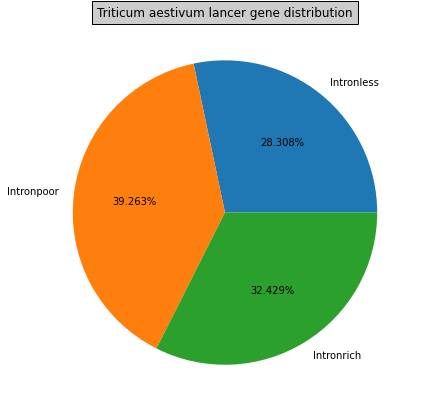

In [462]:
plotting_intron_types(39739, 55118, 45524, 'Triticum aestivum lancer gene distribution')

In [463]:
### --- Creating the list of t_aestivum_lancer gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_lancer_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_lancer_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_lancer_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_lancer)):
    if i == len(intronless_t_aestivum_lancer) -1:
        intronless_file.write(intronless_t_aestivum_lancer[i])
    else:
        intronless_file.write(intronless_t_aestivum_lancer[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_lancer)):
    if i == len(intronpoor_t_aestivum_lancer) -1:
        intronpoor_file.write(intronpoor_t_aestivum_lancer[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_lancer[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_lancer)):
    if i == len(intronrich_t_aestivum_lancer) -1:
        intronrich_file.write(intronrich_t_aestivum_lancer[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_lancer[i]+'\n')
intronrich_file.close()


# Triticum aestivum landmark Ensembl 52

In [468]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [465]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_landmark = pd.read_csv('Data/Triticum_aestivum_landmark.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_landmark[df_t_aestivum_landmark['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,505613936,505614217,.,-,.,ID=gene:TraesLDM3B03G01672810;biotype=protein_coding;gene_id=TraesLDM3B03G01672810;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,712096446,712102745,.,+,.,ID=gene:TraesLDM3B03G01732610;biotype=protein_coding;gene_id=TraesLDM3B03G01732610;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,130501886,130503597,.,+,.,ID=gene:TraesLDM3B03G01586230;biotype=protein_coding;gene_id=TraesLDM3B03G01586230;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,407014180,407017290,.,+,.,ID=gene:TraesLDM3B03G01646910;biotype=protein_coding;gene_id=TraesLDM3B03G01646910;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,689116824,689119084,.,-,.,ID=gene:TraesLDM3B03G01724300;biotype=protein_coding;gene_id=TraesLDM3B03G01724300;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2245905,scaffold_v5_68942,PGSB,gene,77,721,.,+,.,ID=gene:TraesLDMUn03G04591600;biotype=protein_coding;gene_id=TraesLDMUn03G04591600;logic_name=pgsb_genes_high_conf
2246941,scaffold_v5_81730,PGSB,gene,116,894,.,+,.,ID=gene:TraesLDMUn03G04591900;biotype=protein_coding;gene_id=TraesLDMUn03G04591900;logic_name=pgsb_genes_high_conf
2247660,scaffold_v5_24771,PGSB,gene,6,883,.,+,.,ID=gene:TraesLDMUn03G04592080;biotype=protein_coding;gene_id=TraesLDMUn03G04592080;logic_name=pgsb_genes_high_conf
2248859,scaffold_v5_56924,PGSB,gene,164,388,.,-,.,ID=gene:TraesLDMUn03G04592400;biotype=protein_coding;gene_id=TraesLDMUn03G04592400;logic_name=pgsb_genes_high_conf


In [466]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_landmark = df_t_aestivum_landmark.loc[df_t_aestivum_landmark['type'].isin(['exon'])]
exon_t_aestivum_landmark.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17311,3B,PGSB,exon,505613936,505614217,.,-,.,Name=TraesLDM3B03G01672810.1-E1;Parent=transcript:TraesLDM3B03G01672810.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLDM3B03G01672810.1-E1;rank=1
17312,3B,PGSB,exon,712096446,712096773,.,+,.,Name=TraesLDM3B03G01732610.1-E1;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=-1;exon_id=TraesLDM3B03G01732610.1-E1;rank=1
17313,3B,PGSB,exon,712097273,712097702,.,+,.,Name=TraesLDM3B03G01732610.1-E2;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesLDM3B03G01732610.1-E2;rank=2
17314,3B,PGSB,exon,712097835,712098468,.,+,.,Name=TraesLDM3B03G01732610.1-E3;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesLDM3B03G01732610.1-E3;rank=3
17315,3B,PGSB,exon,712099020,712099060,.,+,.,Name=TraesLDM3B03G01732610.1-E4;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesLDM3B03G01732610.1-E4;rank=4
17316,3B,PGSB,exon,712099151,712099219,.,+,.,Name=TraesLDM3B03G01732610.1-E5;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLDM3B03G01732610.1-E5;rank=5
17317,3B,PGSB,exon,712099552,712099652,.,+,.,Name=TraesLDM3B03G01732610.1-E6;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesLDM3B03G01732610.1-E6;rank=6
17318,3B,PGSB,exon,712100030,712100108,.,+,.,Name=TraesLDM3B03G01732610.1-E7;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesLDM3B03G01732610.1-E7;rank=7
17319,3B,PGSB,exon,712100601,712100699,.,+,.,Name=TraesLDM3B03G01732610.1-E8;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLDM3B03G01732610.1-E8;rank=8
17320,3B,PGSB,exon,712100760,712100828,.,+,.,Name=TraesLDM3B03G01732610.1-E9;Parent=transcript:TraesLDM3B03G01732610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesLDM3B03G01732610.1-E9;rank=9


In [467]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_landmark.to_csv('Data/Triticum_aestivum_landmark.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [469]:
### --- Counting introns type
introns_dictionary_t_aestivum_landmark = counting_introns_type(exon_t_aestivum_landmark)

In [470]:
n_intronless_t_aestivum_landmark, n_intronpoor_t_aestivum_landmark, n_intronrich_t_aestivum_landmark, intronless_t_aestivum_landmark, intronpoor_t_aestivum_landmark, intronrich_t_aestivum_landmark = splitting_introns_type(introns_dictionary_t_aestivum_landmark)

Intronless are: 39143
Intronpoor are: 54496
Intronrich are: 46539


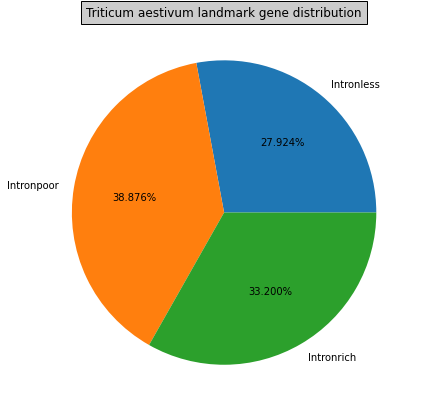

In [471]:
plotting_intron_types(39143, 54496, 46539, 'Triticum aestivum landmark gene distribution')

In [472]:
### --- Creating the list of t_aestivum_landmark gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_landmark_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_landmark_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_landmark_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_landmark)):
    if i == len(intronless_t_aestivum_landmark) -1:
        intronless_file.write(intronless_t_aestivum_landmark[i])
    else:
        intronless_file.write(intronless_t_aestivum_landmark[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_landmark)):
    if i == len(intronpoor_t_aestivum_landmark) -1:
        intronpoor_file.write(intronpoor_t_aestivum_landmark[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_landmark[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_landmark)):
    if i == len(intronrich_t_aestivum_landmark) -1:
        intronrich_file.write(intronrich_t_aestivum_landmark[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_landmark[i]+'\n')
intronrich_file.close()


# Triticum aestivum mace Ensembl 52

In [476]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [473]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_mace = pd.read_csv('Data/Triticum_aestivum_mace.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_mace[df_t_aestivum_mace['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,84759773,84767008,.,+,.,ID=gene:TraesMAC3B03G01571300;biotype=protein_coding;gene_id=TraesMAC3B03G01571300;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,34004266,34005541,.,+,.,ID=gene:TraesMAC3B03G01549260;biotype=protein_coding;gene_id=TraesMAC3B03G01549260;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,150716377,150720614,.,+,.,ID=gene:TraesMAC3B03G01590280;biotype=protein_coding;gene_id=TraesMAC3B03G01590280;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,454066379,454071475,.,+,.,ID=gene:TraesMAC3B03G01658860;biotype=protein_coding;gene_id=TraesMAC3B03G01658860;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,688896138,688899461,.,-,.,ID=gene:TraesMAC3B03G01723990;biotype=protein_coding;gene_id=TraesMAC3B03G01723990;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2216959,scaffold_corrected_v3_1013496,PGSB,gene,89,998,.,+,.,ID=gene:TraesMACUn03G04635860;biotype=protein_coding;gene_id=TraesMACUn03G04635860;logic_name=pgsb_genes_high_conf
2217167,scaffold_corrected_v3_954524,PGSB,gene,75,603,.,-,.,ID=gene:TraesMACUn03G04635920;biotype=protein_coding;gene_id=TraesMACUn03G04635920;logic_name=pgsb_genes_high_conf
2218073,scaffold_corrected_v3_851732,PGSB,gene,386,958,.,-,.,ID=gene:TraesMACUn03G04636470;biotype=protein_coding;gene_id=TraesMACUn03G04636470;logic_name=pgsb_genes_high_conf
2218565,scaffold_corrected_v3_81313,PGSB,gene,4,966,.,-,.,ID=gene:TraesMACUn03G04636760;biotype=protein_coding;gene_id=TraesMACUn03G04636760;logic_name=pgsb_genes_high_conf


In [474]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_mace = df_t_aestivum_mace.loc[df_t_aestivum_mace['type'].isin(['exon'])]
exon_t_aestivum_mace.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17334,3B,PGSB,exon,84759773,84759937,.,+,.,Name=TraesMAC3B03G01571300.1-E1;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesMAC3B03G01571300.1-E1;rank=1
17335,3B,PGSB,exon,84760037,84760099,.,+,.,Name=TraesMAC3B03G01571300.1-E2;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesMAC3B03G01571300.1-E2;rank=2
17336,3B,PGSB,exon,84760589,84760732,.,+,.,Name=TraesMAC3B03G01571300.1-E3;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesMAC3B03G01571300.1-E3;rank=3
17337,3B,PGSB,exon,84760815,84760881,.,+,.,Name=TraesMAC3B03G01571300.1-E4;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesMAC3B03G01571300.1-E4;rank=4
17338,3B,PGSB,exon,84761067,84761139,.,+,.,Name=TraesMAC3B03G01571300.1-E5;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=TraesMAC3B03G01571300.1-E5;rank=5
17339,3B,PGSB,exon,84761322,84761367,.,+,.,Name=TraesMAC3B03G01571300.1-E6;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesMAC3B03G01571300.1-E6;rank=6
17340,3B,PGSB,exon,84761450,84761560,.,+,.,Name=TraesMAC3B03G01571300.1-E7;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesMAC3B03G01571300.1-E7;rank=7
17341,3B,PGSB,exon,84763753,84763816,.,+,.,Name=TraesMAC3B03G01571300.1-E8;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesMAC3B03G01571300.1-E8;rank=8
17342,3B,PGSB,exon,84764240,84764330,.,+,.,Name=TraesMAC3B03G01571300.1-E9;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=TraesMAC3B03G01571300.1-E9;rank=9
17343,3B,PGSB,exon,84764542,84764602,.,+,.,Name=TraesMAC3B03G01571300.1-E10;Parent=transcript:TraesMAC3B03G01571300.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesMAC3B03G01571300.1-E10;rank=10


In [475]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_mace.to_csv('Data/Triticum_aestivum_mace.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [477]:
### --- Counting introns type
introns_dictionary_t_aestivum_mace = counting_introns_type(exon_t_aestivum_mace)

In [478]:
n_intronless_t_aestivum_mace, n_intronpoor_t_aestivum_mace, n_intronrich_t_aestivum_mace, intronless_t_aestivum_mace, intronpoor_t_aestivum_mace, intronrich_t_aestivum_mace = splitting_introns_type(introns_dictionary_t_aestivum_mace)

Intronless are: 39584
Intronpoor are: 55270
Intronrich are: 45715


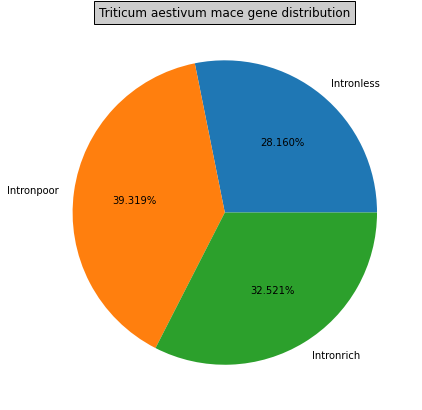

In [479]:
plotting_intron_types(39584, 55270, 45715, 'Triticum aestivum mace gene distribution')

In [480]:
### --- Creating the list of t_aestivum_mace gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_mace_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_mace_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_mace_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_mace)):
    if i == len(intronless_t_aestivum_mace) -1:
        intronless_file.write(intronless_t_aestivum_mace[i])
    else:
        intronless_file.write(intronless_t_aestivum_mace[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_mace)):
    if i == len(intronpoor_t_aestivum_mace) -1:
        intronpoor_file.write(intronpoor_t_aestivum_mace[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_mace[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_mace)):
    if i == len(intronrich_t_aestivum_mace) -1:
        intronrich_file.write(intronrich_t_aestivum_mace[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_mace[i]+'\n')
intronrich_file.close()


# Triticum aestivum mattis Ensembl 52

In [484]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [481]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_mattis = pd.read_csv('Data/Triticum_aestivum_mattis.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_mattis[df_t_aestivum_mattis['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,7B,PGSB,gene,905459857,905460485,.,-,.,ID=gene:TraesSYM7B03G04291470;biotype=protein_coding;gene_id=TraesSYM7B03G04291470;logic_name=pgsb_genes_high_conf
2,7B,PGSB,gene,57076396,57077460,.,+,.,ID=gene:TraesSYM7B03G04023930;biotype=protein_coding;gene_id=TraesSYM7B03G04023930;logic_name=pgsb_genes_high_conf
3,7B,PGSB,gene,170368866,170370147,.,+,.,ID=gene:TraesSYM7B03G04070860;biotype=protein_coding;gene_id=TraesSYM7B03G04070860;logic_name=pgsb_genes_high_conf
4,7B,PGSB,gene,926327826,926340615,.,-,.,ID=gene:TraesSYM7B03G04302540;biotype=protein_coding;gene_id=TraesSYM7B03G04302540;logic_name=pgsb_genes_high_conf
5,7B,PGSB,gene,332475699,332477326,.,+,.,ID=gene:TraesSYM7B03G04129810;biotype=protein_coding;gene_id=TraesSYM7B03G04129810;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2078863,5B,PGSB,gene,402216791,402217610,.,-,.,ID=gene:TraesSYM5B03G02936190;biotype=protein_coding;gene_id=TraesSYM5B03G02936190;logic_name=pgsb_genes_high_conf
2078864,5B,PGSB,gene,424896536,424906653,.,+,.,ID=gene:TraesSYM5B03G02944210;biotype=protein_coding;gene_id=TraesSYM5B03G02944210;logic_name=pgsb_genes_high_conf
2078865,5B,PGSB,gene,261189370,261193884,.,+,.,ID=gene:TraesSYM5B03G02893460;biotype=protein_coding;gene_id=TraesSYM5B03G02893460;logic_name=pgsb_genes_high_conf
2078866,5B,PGSB,gene,438086227,438087695,.,-,.,ID=gene:TraesSYM5B03G02949460;biotype=protein_coding;gene_id=TraesSYM5B03G02949460;logic_name=pgsb_genes_high_conf


In [482]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_mattis = df_t_aestivum_mattis.loc[df_t_aestivum_mattis['type'].isin(['exon'])]
exon_t_aestivum_mattis.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
22009,7B,PGSB,exon,905459857,905460485,.,-,.,Name=TraesSYM7B03G04291470.1-E1;Parent=transcript:TraesSYM7B03G04291470.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSYM7B03G04291470.1-E1;rank=1
22010,7B,PGSB,exon,57076396,57076636,.,+,.,Name=TraesSYM7B03G04023930.1-E1;Parent=transcript:TraesSYM7B03G04023930.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesSYM7B03G04023930.1-E1;rank=1
22011,7B,PGSB,exon,57076738,57077087,.,+,.,Name=TraesSYM7B03G04023930.1-E2;Parent=transcript:TraesSYM7B03G04023930.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesSYM7B03G04023930.1-E2;rank=2
22012,7B,PGSB,exon,57077199,57077460,.,+,.,Name=TraesSYM7B03G04023930.1-E3;Parent=transcript:TraesSYM7B03G04023930.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSYM7B03G04023930.1-E3;rank=3
22013,7B,PGSB,exon,170368866,170369076,.,+,.,Name=TraesSYM7B03G04070860.1-E1;Parent=transcript:TraesSYM7B03G04070860.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesSYM7B03G04070860.1-E1;rank=1
22014,7B,PGSB,exon,170369445,170370147,.,+,.,Name=TraesSYM7B03G04070860.1-E2;Parent=transcript:TraesSYM7B03G04070860.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSYM7B03G04070860.1-E2;rank=2
22015,7B,PGSB,exon,926340545,926340615,.,-,.,Name=TraesSYM7B03G04302540.1-E1;Parent=transcript:TraesSYM7B03G04302540.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSYM7B03G04302540.1-E1;rank=1
22016,7B,PGSB,exon,926339735,926340156,.,-,.,Name=TraesSYM7B03G04302540.1-E2;Parent=transcript:TraesSYM7B03G04302540.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesSYM7B03G04302540.1-E2;rank=2
22017,7B,PGSB,exon,926338215,926338937,.,-,.,Name=TraesSYM7B03G04302540.1-E3;Parent=transcript:TraesSYM7B03G04302540.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSYM7B03G04302540.1-E3;rank=3
22018,7B,PGSB,exon,926337502,926337819,.,-,.,Name=TraesSYM7B03G04302540.1-E4;Parent=transcript:TraesSYM7B03G04302540.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSYM7B03G04302540.1-E4;rank=4


In [483]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_mattis.to_csv('Data/Triticum_aestivum_mattis.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [485]:
### --- Counting introns type
introns_dictionary_t_aestivum_mattis = counting_introns_type(exon_t_aestivum_mattis)

In [486]:
n_intronless_t_aestivum_mattis, n_intronpoor_t_aestivum_mattis, n_intronrich_t_aestivum_mattis, intronless_t_aestivum_mattis, intronpoor_t_aestivum_mattis, intronrich_t_aestivum_mattis = splitting_introns_type(introns_dictionary_t_aestivum_mattis)

Intronless are: 39443
Intronpoor are: 55022
Intronrich are: 46164


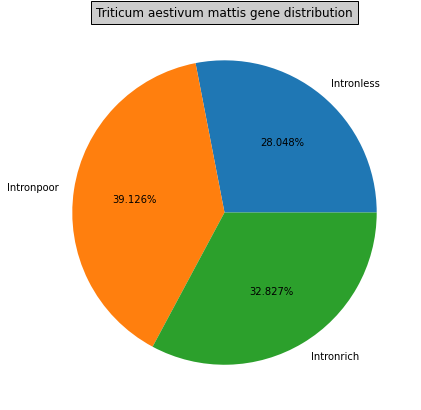

In [487]:
plotting_intron_types(39443, 55022, 46164, 'Triticum aestivum mattis gene distribution')

In [488]:
### --- Creating the list of t_aestivum_mattis gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_mattis_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_mattis_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_mattis_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_mattis)):
    if i == len(intronless_t_aestivum_mattis) -1:
        intronless_file.write(intronless_t_aestivum_mattis[i])
    else:
        intronless_file.write(intronless_t_aestivum_mattis[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_mattis)):
    if i == len(intronpoor_t_aestivum_mattis) -1:
        intronpoor_file.write(intronpoor_t_aestivum_mattis[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_mattis[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_mattis)):
    if i == len(intronrich_t_aestivum_mattis) -1:
        intronrich_file.write(intronrich_t_aestivum_mattis[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_mattis[i]+'\n')
intronrich_file.close()


# Triticum aestivum norin Ensembl 52

In [489]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[1].split('.')[0]] = counts.get(i.split(';')[1].split('.')[0], 0) + 1
    return counts

In [490]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_norin = pd.read_csv('Data/Triticum_aestivum_norin61.PGSBv2.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_norin[df_t_aestivum_norin['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,193373126,193374852,.,+,.,ID=gene:TraesNOR3B03G01625020;biotype=protein_coding;gene_id=TraesNOR3B03G01625020;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,57781157,57781870,.,+,.,ID=gene:TraesNOR3B03G01584120;biotype=protein_coding;gene_id=TraesNOR3B03G01584120;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,657712595,657714196,.,-,.,ID=gene:TraesNOR3B03G01737100;biotype=protein_coding;gene_id=TraesNOR3B03G01737100;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,669641637,669642855,.,-,.,ID=gene:TraesNOR3B03G01740550;biotype=protein_coding;gene_id=TraesNOR3B03G01740550;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,757256089,757256915,.,-,.,ID=gene:TraesNOR3B03G01772230;biotype=protein_coding;gene_id=TraesNOR3B03G01772230;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2256869,scaffold_corrected_3225,PGSB,gene,1073,1630,.,+,.,ID=gene:TraesNORUn03G04575700;biotype=protein_coding;gene_id=TraesNORUn03G04575700;logic_name=pgsb_genes_high_conf
2256898,scaffold_corrected_3578,PGSB,gene,342,3109,.,-,.,ID=gene:TraesNORUn03G04575770;biotype=protein_coding;gene_id=TraesNORUn03G04575770;logic_name=pgsb_genes_high_conf
2256994,scaffold_corrected_3848,PGSB,gene,922,1696,.,+,.,ID=gene:TraesNORUn03G04575990;biotype=protein_coding;gene_id=TraesNORUn03G04575990;logic_name=pgsb_genes_high_conf
2257060,scaffold_corrected_2449,PGSB,gene,2,1347,.,-,.,ID=gene:TraesNORUn03G04550840;biotype=protein_coding;gene_id=TraesNORUn03G04550840;logic_name=pgsb_genes_high_conf


No need to split between High and Low confidence genes being not reported

In [491]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_norin = df_t_aestivum_norin.loc[df_t_aestivum_norin['type'].isin(['exon'])]
exon_t_aestivum_norin.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17846,3B,PGSB,exon,193373126,193373710,.,+,.,Name=TraesNOR3B03G01625020.1-E1;Parent=transcript:TraesNOR3B03G01625020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesNOR3B03G01625020.1-E1;rank=1
17847,3B,PGSB,exon,193373839,193374120,.,+,.,Name=TraesNOR3B03G01625020.1-E2;Parent=transcript:TraesNOR3B03G01625020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesNOR3B03G01625020.1-E2;rank=2
17848,3B,PGSB,exon,193374190,193374381,.,+,.,Name=TraesNOR3B03G01625020.1-E3;Parent=transcript:TraesNOR3B03G01625020.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesNOR3B03G01625020.1-E3;rank=3
17849,3B,PGSB,exon,193374443,193374852,.,+,.,Name=TraesNOR3B03G01625020.1-E4;Parent=transcript:TraesNOR3B03G01625020.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesNOR3B03G01625020.1-E4;rank=4
17850,3B,PGSB,exon,57781157,57781358,.,+,.,Name=TraesNOR3B03G01584120.1-E1;Parent=transcript:TraesNOR3B03G01584120.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesNOR3B03G01584120.1-E1;rank=1
17851,3B,PGSB,exon,57781430,57781870,.,+,.,Name=TraesNOR3B03G01584120.1-E2;Parent=transcript:TraesNOR3B03G01584120.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesNOR3B03G01584120.1-E2;rank=2
17852,3B,PGSB,exon,657712595,657714196,.,-,.,Name=TraesNOR3B03G01737100.1-E1;Parent=transcript:TraesNOR3B03G01737100.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesNOR3B03G01737100.1-E1;rank=1
17853,3B,PGSB,exon,669641637,669642855,.,-,.,Name=TraesNOR3B03G01740550.1-E1;Parent=transcript:TraesNOR3B03G01740550.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR3B03G01740550.1-E1;rank=1
17854,3B,PGSB,exon,757256089,757256915,.,-,.,Name=TraesNOR3B03G01772230.1-E1;Parent=transcript:TraesNOR3B03G01772230.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR3B03G01772230.1-E1;rank=1
17855,3B,PGSB,exon,207025714,207026325,.,-,.,Name=TraesNOR3B03G01628910.1-E1;Parent=transcript:TraesNOR3B03G01628910.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesNOR3B03G01628910.1-E1;rank=1


In [492]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_norin.to_csv('Data/Triticum_aestivum_norin61.PGSBv2.1.52_EXON',sep='\t',index=False,header=False)

In [493]:
### --- Counting introns type
introns_dictionary_t_aestivum_norin = counting_introns_type(exon_t_aestivum_norin)

In [494]:
n_intronless_t_aestivum_norin, n_intronpoor_t_aestivum_norin, n_intronrich_t_aestivum_norin, intronless_t_aestivum_norin, intronpoor_t_aestivum_norin, intronrich_t_aestivum_norin = splitting_introns_type(introns_dictionary_t_aestivum_norin)

Intronless are: 40435
Intronpoor are: 56486
Intronrich are: 48144


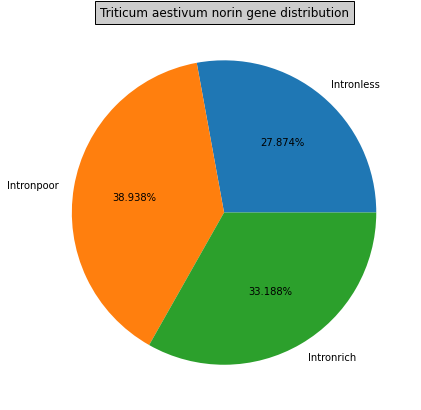

In [496]:
plotting_intron_types(40435, 56486, 48144, 'Triticum aestivum norin gene distribution')

In [497]:
### --- Creating the list of t_aestivum_norin gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_norin_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_norin_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_norin_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_norin)):
    if i == len(intronless_t_aestivum_norin) -1:
        intronless_file.write(intronless_t_aestivum_norin[i])
    else:
        intronless_file.write(intronless_t_aestivum_norin[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_norin)):
    if i == len(intronpoor_t_aestivum_norin) -1:
        intronpoor_file.write(intronpoor_t_aestivum_norin[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_norin[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_norin)):
    if i == len(intronrich_t_aestivum_norin) -1:
        intronrich_file.write(intronrich_t_aestivum_norin[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_norin[i]+'\n')
intronrich_file.close()


# Triticum aestivum paragon Ensembl 52

In [7]:
### --- Function to count introns within a dataframe made of exons formatted like exon_t_aestivum_paragon
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [5]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_paragon = pd.read_csv('Data/Triticum_aestivum_paragon.EIv1.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_paragon[df_t_aestivum_paragon['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,par_scaffold_000001,PGSB_2019,gene,788516,793989,.,+,.,ID=gene:TraesPAR_scaffold_000001_01G000100;biotype=protein_coding;gene_id=TraesPAR_scaffold_000001_01G000100;logic_name=gff3_genes
22,par_scaffold_000002,PGSB_2019,gene,176164,178180,.,-,.,ID=gene:TraesPAR_scaffold_000002_01G000100;biotype=protein_coding;gene_id=TraesPAR_scaffold_000002_01G000100;logic_name=gff3_genes
30,par_scaffold_000002,PGSB_2019,gene,304434,304821,.,-,.,ID=gene:TraesPAR_scaffold_000002_01G000200;biotype=protein_coding;gene_id=TraesPAR_scaffold_000002_01G000200;logic_name=gff3_genes
36,par_scaffold_000002,PGSB_2019,gene,661462,663071,.,-,.,ID=gene:TraesPAR_scaffold_000002_01G000300;biotype=protein_coding;gene_id=TraesPAR_scaffold_000002_01G000300;logic_name=gff3_genes
56,par_scaffold_000003,PGSB_2019,gene,37390,38763,.,-,.,ID=gene:TraesPAR_scaffold_000003_01G000200;biotype=protein_coding;gene_id=TraesPAR_scaffold_000003_01G000200;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
2503225,par_scaffold_994756,PGSB_2019,gene,113,1328,.,+,.,ID=gene:TraesPAR_scaffold_994756_01G000100;biotype=protein_coding;gene_id=TraesPAR_scaffold_994756_01G000100;logic_name=gff3_genes
2503552,par_scaffold_995072,PGSB_2019,gene,512,1026,.,-,.,ID=gene:TraesPAR_scaffold_995072_01G000100;biotype=protein_coding;gene_id=TraesPAR_scaffold_995072_01G000100;logic_name=gff3_genes
2504345,par_scaffold_995860,PGSB_2019,gene,342,585,.,-,.,ID=gene:TraesPAR_scaffold_995860_01G000100;biotype=protein_coding;gene_id=TraesPAR_scaffold_995860_01G000100;logic_name=gff3_genes
2505232,par_scaffold_996740,PGSB_2019,gene,708,959,.,+,.,ID=gene:TraesPAR_scaffold_996740_01G000100;biotype=protein_coding;gene_id=TraesPAR_scaffold_996740_01G000100;logic_name=gff3_genes


In [6]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_paragon = df_t_aestivum_paragon.loc[df_t_aestivum_paragon['type'].isin(['exon'])]
exon_t_aestivum_paragon.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,par_scaffold_000001,ensembl,exon,788516,788630,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesPAR_scaffold_000001_01G000100.1-E1;rank=1
5,par_scaffold_000001,ensembl,exon,788725,788849,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesPAR_scaffold_000001_01G000100.1-E2;rank=2
7,par_scaffold_000001,ensembl,exon,791933,792042,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E3;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesPAR_scaffold_000001_01G000100.1-E3;rank=3
9,par_scaffold_000001,ensembl,exon,792124,792217,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesPAR_scaffold_000001_01G000100.1-E4;rank=4
11,par_scaffold_000001,ensembl,exon,792323,792381,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E5;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesPAR_scaffold_000001_01G000100.1-E5;rank=5
13,par_scaffold_000001,ensembl,exon,792984,793048,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E6;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=TraesPAR_scaffold_000001_01G000100.1-E6;rank=6
15,par_scaffold_000001,ensembl,exon,793177,793208,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E7;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesPAR_scaffold_000001_01G000100.1-E7;rank=7
17,par_scaffold_000001,ensembl,exon,793277,793390,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E8;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesPAR_scaffold_000001_01G000100.1-E8;rank=8
19,par_scaffold_000001,ensembl,exon,793912,793989,.,+,.,Parent=transcript:TraesPAR_scaffold_000001_01G000100.1;Name=TraesPAR_scaffold_000001_01G000100.1-E9;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesPAR_scaffold_000001_01G000100.1-E9;rank=9
24,par_scaffold_000002,ensembl,exon,176164,177331,.,-,.,Parent=transcript:TraesPAR_scaffold_000002_01G000100.1;Name=TraesPAR_scaffold_000002_01G000100.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesPAR_scaffold_000002_01G000100.1-E3;rank=3


In [8]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_paragon.to_csv('Data/Triticum_aestivum_paragon.EIv1.1.52_EXON',sep='\t',index=False,header=False)

In [9]:
### --- Counting introns type
introns_dictionary_t_aestivum_paragon = counting_introns_type(exon_t_aestivum_paragon)

In [10]:
n_intronless_t_aestivum_paragon, n_intronpoor_t_aestivum_paragon, n_intronrich_t_aestivum_paragon, intronless_t_aestivum_paragon, intronpoor_t_aestivum_paragon, intronrich_t_aestivum_paragon = splitting_introns_type(introns_dictionary_t_aestivum_paragon)

Intronless are: 37263
Intronpoor are: 54888
Intronrich are: 35152


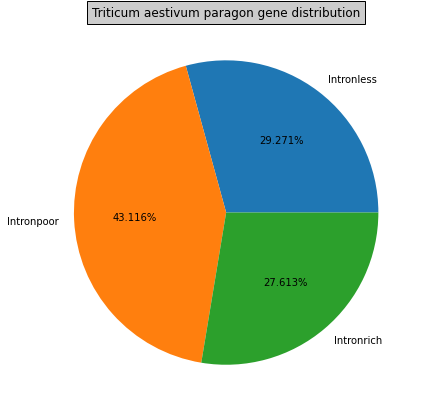

In [11]:
plotting_intron_types(37263, 54888, 35152, 'Triticum aestivum paragon gene distribution')

In [12]:
### --- Creating the list of t_aestivum_paragon gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_paragon_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_paragon_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_paragon_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_paragon)):
    if i == len(intronless_t_aestivum_paragon) -1:
        intronless_file.write(intronless_t_aestivum_paragon[i])
    else:
        intronless_file.write(intronless_t_aestivum_paragon[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_paragon)):
    if i == len(intronpoor_t_aestivum_paragon) -1:
        intronpoor_file.write(intronpoor_t_aestivum_paragon[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_paragon[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_paragon)):
    if i == len(intronrich_t_aestivum_paragon) -1:
        intronrich_file.write(intronrich_t_aestivum_paragon[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_paragon[i]+'\n')
intronrich_file.close()


# Triticum aestivum robigus Ensembl 52

In [16]:
### --- Function to count introns within a dataframe made of exons formatted like exon_t_aestivum_robigus
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [13]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_robigus = pd.read_csv('Data/Triticum_aestivum_robigus.EIv1.1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_robigus[df_t_aestivum_robigus['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,rob_scaffold_000001,PGSB_2019,gene,288286,290146,.,-,.,ID=gene:TraesROB_scaffold_000001_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_000001_01G000100;logic_name=gff3_genes
12,rob_scaffold_000002,PGSB_2019,gene,465386,470328,.,+,.,ID=gene:TraesROB_scaffold_000002_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_000002_01G000100;logic_name=gff3_genes
32,rob_scaffold_000002,PGSB_2019,gene,591389,593134,.,+,.,ID=gene:TraesROB_scaffold_000002_01G000200;biotype=protein_coding;gene_id=TraesROB_scaffold_000002_01G000200;logic_name=gff3_genes
41,rob_scaffold_000003,PGSB_2019,gene,122363,125475,.,-,.,ID=gene:TraesROB_scaffold_000003_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_000003_01G000100;logic_name=gff3_genes
53,rob_scaffold_000003,PGSB_2019,gene,155587,164315,.,+,.,ID=gene:TraesROB_scaffold_000003_01G000200;biotype=protein_coding;gene_id=TraesROB_scaffold_000003_01G000200;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
2453582,rob_scaffold_996529,PGSB_2019,gene,814,1182,.,-,.,ID=gene:TraesROB_scaffold_996529_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_996529_01G000100;logic_name=gff3_genes
2454119,rob_scaffold_997062,PGSB_2019,gene,684,1197,.,-,.,ID=gene:TraesROB_scaffold_997062_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_997062_01G000100;logic_name=gff3_genes
2455906,rob_scaffold_998842,PGSB_2019,gene,614,1134,.,-,.,ID=gene:TraesROB_scaffold_998842_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_998842_01G000100;logic_name=gff3_genes
2456175,rob_scaffold_999101,PGSB_2019,gene,606,1117,.,+,.,ID=gene:TraesROB_scaffold_999101_01G000100;biotype=protein_coding;gene_id=TraesROB_scaffold_999101_01G000100;logic_name=gff3_genes


In [14]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_robigus = df_t_aestivum_robigus.loc[df_t_aestivum_robigus['type'].isin(['exon'])]
exon_t_aestivum_robigus.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,rob_scaffold_000001,ensembl,exon,288286,288458,.,-,.,Parent=transcript:TraesROB_scaffold_000001_01G000100.1;Name=TraesROB_scaffold_000001_01G000100.1-E4;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesROB_scaffold_000001_01G000100.1-E4;rank=4
5,rob_scaffold_000001,ensembl,exon,288877,289023,.,-,.,Parent=transcript:TraesROB_scaffold_000001_01G000100.1;Name=TraesROB_scaffold_000001_01G000100.1-E3;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesROB_scaffold_000001_01G000100.1-E3;rank=3
7,rob_scaffold_000001,ensembl,exon,289775,289949,.,-,.,Parent=transcript:TraesROB_scaffold_000001_01G000100.1;Name=TraesROB_scaffold_000001_01G000100.1-E2;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesROB_scaffold_000001_01G000100.1-E2;rank=2
9,rob_scaffold_000001,ensembl,exon,290000,290146,.,-,.,Parent=transcript:TraesROB_scaffold_000001_01G000100.1;Name=TraesROB_scaffold_000001_01G000100.1-E1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesROB_scaffold_000001_01G000100.1-E1;rank=1
14,rob_scaffold_000002,ensembl,exon,465386,465476,.,+,.,Parent=transcript:TraesROB_scaffold_000002_01G000100.1;Name=TraesROB_scaffold_000002_01G000100.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesROB_scaffold_000002_01G000100.1-E1;rank=1
16,rob_scaffold_000002,ensembl,exon,466660,467208,.,+,.,Parent=transcript:TraesROB_scaffold_000002_01G000100.1;Name=TraesROB_scaffold_000002_01G000100.1-E2;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesROB_scaffold_000002_01G000100.1-E2;rank=2
18,rob_scaffold_000002,ensembl,exon,467988,468275,.,+,.,Parent=transcript:TraesROB_scaffold_000002_01G000100.1;Name=TraesROB_scaffold_000002_01G000100.1-E3;constitutive=1;ensembl_end_phase=1;ensembl_phase=1;exon_id=TraesROB_scaffold_000002_01G000100.1-E3;rank=3
20,rob_scaffold_000002,ensembl,exon,468474,468735,.,+,.,Parent=transcript:TraesROB_scaffold_000002_01G000100.1;Name=TraesROB_scaffold_000002_01G000100.1-E4;constitutive=1;ensembl_end_phase=2;ensembl_phase=1;exon_id=TraesROB_scaffold_000002_01G000100.1-E4;rank=4
22,rob_scaffold_000002,ensembl,exon,468858,468910,.,+,.,Parent=transcript:TraesROB_scaffold_000002_01G000100.1;Name=TraesROB_scaffold_000002_01G000100.1-E5;constitutive=1;ensembl_end_phase=1;ensembl_phase=2;exon_id=TraesROB_scaffold_000002_01G000100.1-E5;rank=5
24,rob_scaffold_000002,ensembl,exon,469005,469072,.,+,.,Parent=transcript:TraesROB_scaffold_000002_01G000100.1;Name=TraesROB_scaffold_000002_01G000100.1-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesROB_scaffold_000002_01G000100.1-E6;rank=6


In [15]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_robigus.to_csv('Data/Triticum_aestivum_robigus.EIv1.1.52_EXON',sep='\t',index=False,header=False)

In [17]:
### --- Counting introns type
introns_dictionary_t_aestivum_robigus = counting_introns_type(exon_t_aestivum_robigus)

In [18]:
n_intronless_t_aestivum_robigus, n_intronpoor_t_aestivum_robigus, n_intronrich_t_aestivum_robigus, intronless_t_aestivum_robigus, intronpoor_t_aestivum_robigus, intronrich_t_aestivum_robigus = splitting_introns_type(introns_dictionary_t_aestivum_robigus)

Intronless are: 37201
Intronpoor are: 54799
Intronrich are: 35148


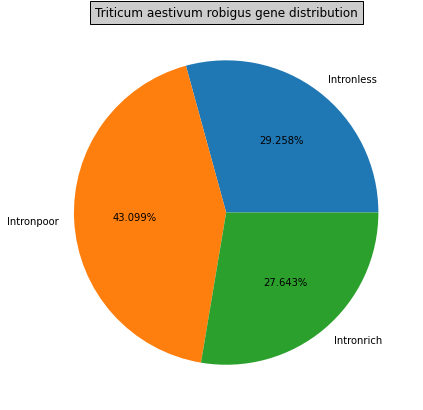

In [19]:
plotting_intron_types(37201, 54799, 35148, 'Triticum aestivum robigus gene distribution')

In [304]:
### --- Creating the list of t_aestivum_robigus gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_robigus_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_robigus_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_robigus_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_robigus)):
    if i == len(intronless_t_aestivum_robigus) -1:
        intronless_file.write(intronless_t_aestivum_robigus[i])
    else:
        intronless_file.write(intronless_t_aestivum_robigus[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_robigus)):
    if i == len(intronpoor_t_aestivum_robigus) -1:
        intronpoor_file.write(intronpoor_t_aestivum_robigus[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_robigus[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_robigus)):
    if i == len(intronrich_t_aestivum_robigus) -1:
        intronrich_file.write(intronrich_t_aestivum_robigus[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_robigus[i]+'\n')
intronrich_file.close()


# Triticum aestivum stanley Ensembl 52

In [24]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0].split('.')[0]] = counts.get(i.split(';')[0].split('.')[0], 0) + 1
    return counts

In [22]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_stanley = pd.read_csv('Data/Triticum_aestivum_stanley.PGSBv2.2.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_stanley[df_t_aestivum_stanley['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB,gene,100573453,100575454,.,+,.,ID=gene:TraesSTA3B03G01569180;biotype=protein_coding;gene_id=TraesSTA3B03G01569180;logic_name=pgsb_genes_high_conf
2,3B,PGSB,gene,41958266,41962472,.,+,.,ID=gene:TraesSTA3B03G01546610;biotype=protein_coding;gene_id=TraesSTA3B03G01546610;logic_name=pgsb_genes_high_conf
3,3B,PGSB,gene,545281703,545285879,.,-,.,ID=gene:TraesSTA3B03G01673240;biotype=protein_coding;gene_id=TraesSTA3B03G01673240;logic_name=pgsb_genes_high_conf
4,3B,PGSB,gene,85263113,85267399,.,+,.,ID=gene:TraesSTA3B03G01564590;biotype=protein_coding;gene_id=TraesSTA3B03G01564590;logic_name=pgsb_genes_high_conf
5,3B,PGSB,gene,830973675,830981030,.,+,.,ID=gene:TraesSTA3B03G01771250;biotype=protein_coding;gene_id=TraesSTA3B03G01771250;logic_name=pgsb_genes_high_conf
...,...,...,...,...,...,...,...,...,...
2197859,scaffold_v3_12836,PGSB,gene,5,1077,.,-,.,ID=gene:TraesSTAUn03G04581120;biotype=protein_coding;gene_id=TraesSTAUn03G04581120;logic_name=pgsb_genes_high_conf
2198120,scaffold_v3_50276,PGSB,gene,477,1069,.,-,.,ID=gene:TraesSTAUn03G04581170;biotype=protein_coding;gene_id=TraesSTAUn03G04581170;logic_name=pgsb_genes_high_conf
2215060,scaffold_v3_14433,PGSB,gene,21,541,.,-,.,ID=gene:TraesSTAUn03G04585770;biotype=protein_coding;gene_id=TraesSTAUn03G04585770;logic_name=pgsb_genes_high_conf
2225747,scaffold_v3_48601,PGSB,gene,115,606,.,-,.,ID=gene:TraesSTAUn03G04587900;biotype=protein_coding;gene_id=TraesSTAUn03G04587900;logic_name=pgsb_genes_high_conf


In [23]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_stanley = df_t_aestivum_stanley.loc[df_t_aestivum_stanley['type'].isin(['exon'])]
exon_t_aestivum_stanley.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
17419,3B,PGSB,exon,100573453,100575454,.,+,.,Name=TraesSTA3B03G01569180.1-E1;Parent=transcript:TraesSTA3B03G01569180.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TraesSTA3B03G01569180.1-E1;rank=1
17420,3B,PGSB,exon,41958266,41958622,.,+,.,Name=TraesSTA3B03G01546610.1-E1;Parent=transcript:TraesSTA3B03G01546610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesSTA3B03G01546610.1-E1;rank=1
17421,3B,PGSB,exon,41961607,41961690,.,+,.,Name=TraesSTA3B03G01546610.1-E2;Parent=transcript:TraesSTA3B03G01546610.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSTA3B03G01546610.1-E2;rank=2
17422,3B,PGSB,exon,41961791,41962472,.,+,.,Name=TraesSTA3B03G01546610.1-E3;Parent=transcript:TraesSTA3B03G01546610.1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesSTA3B03G01546610.1-E3;rank=3
17423,3B,PGSB,exon,545285775,545285879,.,-,.,Name=TraesSTA3B03G01673240.1-E1;Parent=transcript:TraesSTA3B03G01673240.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=-1;exon_id=TraesSTA3B03G01673240.1-E1;rank=1
17424,3B,PGSB,exon,545285596,545285679,.,-,.,Name=TraesSTA3B03G01673240.1-E2;Parent=transcript:TraesSTA3B03G01673240.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSTA3B03G01673240.1-E2;rank=2
17425,3B,PGSB,exon,545285404,545285472,.,-,.,Name=TraesSTA3B03G01673240.1-E3;Parent=transcript:TraesSTA3B03G01673240.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSTA3B03G01673240.1-E3;rank=3
17426,3B,PGSB,exon,545285004,545285067,.,-,.,Name=TraesSTA3B03G01673240.1-E4;Parent=transcript:TraesSTA3B03G01673240.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesSTA3B03G01673240.1-E4;rank=4
17427,3B,PGSB,exon,545284818,545284891,.,-,.,Name=TraesSTA3B03G01673240.1-E5;Parent=transcript:TraesSTA3B03G01673240.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesSTA3B03G01673240.1-E5;rank=5
17428,3B,PGSB,exon,545284646,545284729,.,-,.,Name=TraesSTA3B03G01673240.1-E6;Parent=transcript:TraesSTA3B03G01673240.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesSTA3B03G01673240.1-E6;rank=6


In [25]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_stanley.to_csv('Data/Triticum_aestivum_stanley.PGSBv2.2.52_EXON',sep='\t',index=False,header=False)

In [26]:
### --- Counting introns type
introns_dictionary_t_aestivum_stanley = counting_introns_type(exon_t_aestivum_stanley)

In [27]:
n_intronless_t_aestivum_stanley, n_intronpoor_t_aestivum_stanley, n_intronrich_t_aestivum_stanley, intronless_t_aestivum_stanley, intronpoor_t_aestivum_stanley, intronrich_t_aestivum_stanley = splitting_introns_type(introns_dictionary_t_aestivum_stanley)

Intronless are: 39349
Intronpoor are: 54821
Intronrich are: 46174


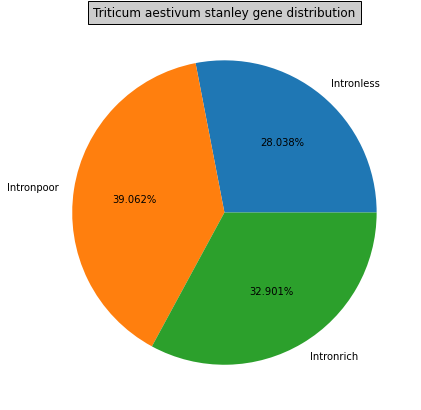

In [28]:
plotting_intron_types(39349, 54821, 46174, 'Triticum aestivum stanley gene distribution')

In [304]:
### --- Creating the list of t_aestivum_stanley gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_stanley_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_stanley_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_stanley_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_stanley)):
    if i == len(intronless_t_aestivum_stanley) -1:
        intronless_file.write(intronless_t_aestivum_stanley[i])
    else:
        intronless_file.write(intronless_t_aestivum_stanley[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_stanley)):
    if i == len(intronpoor_t_aestivum_stanley) -1:
        intronpoor_file.write(intronpoor_t_aestivum_stanley[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_stanley[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_stanley)):
    if i == len(intronrich_t_aestivum_stanley) -1:
        intronrich_file.write(intronrich_t_aestivum_stanley[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_stanley[i]+'\n')
intronrich_file.close()


# Triticum aestivum weebil Ensembl 52

In [32]:
### --- Function to count introns within a dataframe made of exons formatted like exon_t_aestivum_weebil
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [29]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_aestivum_weebil = pd.read_csv('Data/Triticum_aestivum_weebil.WeebilV1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_aestivum_weebil[df_t_aestivum_weebil['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,wee_scaffold_000001,PGSB_2019,gene,161196,200749,.,-,.,ID=gene:TraesWEE_scaffold_000001_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_000001_01G000100;logic_name=gff3_genes
11,wee_scaffold_000001,PGSB_2019,gene,546999,547285,.,+,.,ID=gene:TraesWEE_scaffold_000001_01G000200;biotype=protein_coding;gene_id=TraesWEE_scaffold_000001_01G000200;logic_name=gff3_genes
16,wee_scaffold_000001,PGSB_2019,gene,549030,553948,.,-,.,ID=gene:TraesWEE_scaffold_000001_01G000300;biotype=protein_coding;gene_id=TraesWEE_scaffold_000001_01G000300;logic_name=gff3_genes
33,wee_scaffold_000002,PGSB_2019,gene,171997,177498,.,-,.,ID=gene:TraesWEE_scaffold_000002_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_000002_01G000100;logic_name=gff3_genes
56,wee_scaffold_000003,PGSB_2019,gene,16395,19013,.,-,.,ID=gene:TraesWEE_scaffold_000003_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_000003_01G000100;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
2673595,wee_scaffold_995974,PGSB_2019,gene,715,942,.,-,.,ID=gene:TraesWEE_scaffold_995974_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_995974_01G000100;logic_name=gff3_genes
2674425,wee_scaffold_996800,PGSB_2019,gene,86,397,.,-,.,ID=gene:TraesWEE_scaffold_996800_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_996800_01G000100;logic_name=gff3_genes
2674635,wee_scaffold_997007,PGSB_2019,gene,1,799,.,-,.,ID=gene:TraesWEE_scaffold_997007_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_997007_01G000100;logic_name=gff3_genes
2675525,wee_scaffold_997888,PGSB_2019,gene,199,859,.,-,.,ID=gene:TraesWEE_scaffold_997888_01G000100;biotype=protein_coding;gene_id=TraesWEE_scaffold_997888_01G000100;logic_name=gff3_genes


No need to split between High and Low confidence genes being not reported

In [30]:
### --- Building a separate dataframe containing all exons
exon_t_aestivum_weebil = df_t_aestivum_weebil.loc[df_t_aestivum_weebil['type'].isin(['exon'])]
exon_t_aestivum_weebil.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,wee_scaffold_000001,ensembl,exon,161196,161322,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000100.1;Name=TraesWEE_scaffold_000001_01G000100.1-E3;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesWEE_scaffold_000001_01G000100.1-E3;rank=3
6,wee_scaffold_000001,ensembl,exon,200369,200466,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000100.1;Name=TraesWEE_scaffold_000001_01G000100.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesWEE_scaffold_000001_01G000100.1-E2;rank=2
9,wee_scaffold_000001,ensembl,exon,200664,200749,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000100.1;Name=TraesWEE_scaffold_000001_01G000100.1-E1;constitutive=1;ensembl_end_phase=1;ensembl_phase=-1;exon_id=TraesWEE_scaffold_000001_01G000100.1-E1;rank=1
14,wee_scaffold_000001,ensembl,exon,546999,547285,.,+,.,Parent=transcript:TraesWEE_scaffold_000001_01G000200.1;Name=TraesWEE_scaffold_000001_01G000200.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TraesWEE_scaffold_000001_01G000200.1-E1;rank=1
18,wee_scaffold_000001,ensembl,exon,549030,549227,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000300.1;Name=TraesWEE_scaffold_000001_01G000300.1-E7;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesWEE_scaffold_000001_01G000300.1-E7;rank=7
20,wee_scaffold_000001,ensembl,exon,549307,549483,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000300.1;Name=TraesWEE_scaffold_000001_01G000300.1-E6;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesWEE_scaffold_000001_01G000300.1-E6;rank=6
22,wee_scaffold_000001,ensembl,exon,549966,550116,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000300.1;Name=TraesWEE_scaffold_000001_01G000300.1-E5;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TraesWEE_scaffold_000001_01G000300.1-E5;rank=5
24,wee_scaffold_000001,ensembl,exon,550207,550289,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000300.1;Name=TraesWEE_scaffold_000001_01G000300.1-E4;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TraesWEE_scaffold_000001_01G000300.1-E4;rank=4
26,wee_scaffold_000001,ensembl,exon,550747,550908,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000300.1;Name=TraesWEE_scaffold_000001_01G000300.1-E3;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesWEE_scaffold_000001_01G000300.1-E3;rank=3
28,wee_scaffold_000001,ensembl,exon,551011,551081,.,-,.,Parent=transcript:TraesWEE_scaffold_000001_01G000300.1;Name=TraesWEE_scaffold_000001_01G000300.1-E2;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesWEE_scaffold_000001_01G000300.1-E2;rank=2


In [31]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_aestivum_weebil.to_csv('Data/Triticum_aestivum_weebil.WeebilV1.52_EXON',sep='\t',index=False,header=False)

In [33]:
### --- Counting introns type
introns_dictionary_t_aestivum_weebil = counting_introns_type(exon_t_aestivum_weebil)

In [34]:
n_intronless_t_aestivum_weebil, n_intronpoor_t_aestivum_weebil, n_intronrich_t_aestivum_weebil, intronless_t_aestivum_weebil, intronpoor_t_aestivum_weebil, intronrich_t_aestivum_weebil = splitting_introns_type(introns_dictionary_t_aestivum_weebil)

Intronless are: 37204
Intronpoor are: 55253
Intronrich are: 35353


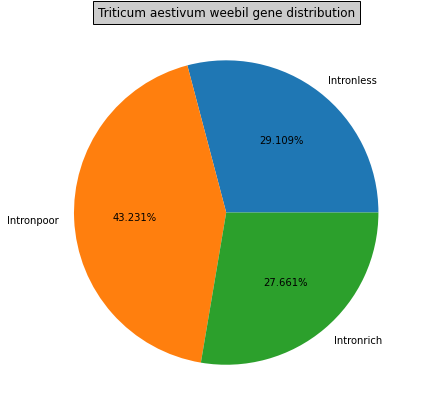

In [35]:
plotting_intron_types(37204, 55253, 35353, 'Triticum aestivum weebil gene distribution')

In [304]:
### --- Creating the list of t_aestivum_weebil gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_aestivum_weebil_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_aestivum_weebil_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_aestivum_weebil_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_aestivum_weebil)):
    if i == len(intronless_t_aestivum_weebil) -1:
        intronless_file.write(intronless_t_aestivum_weebil[i])
    else:
        intronless_file.write(intronless_t_aestivum_weebil[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_aestivum_weebil)):
    if i == len(intronpoor_t_aestivum_weebil) -1:
        intronpoor_file.write(intronpoor_t_aestivum_weebil[i])
    else:
        intronpoor_file.write(intronpoor_t_aestivum_weebil[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_aestivum_weebil)):
    if i == len(intronrich_t_aestivum_weebil) -1:
        intronrich_file.write(intronrich_t_aestivum_weebil[i])
    else:
        intronrich_file.write(intronrich_t_aestivum_weebil[i]+'\n')
intronrich_file.close()


# Triticum dicoccoides Ensembl 52

In [38]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('.')[0]] = counts.get(i.split('.')[0], 0) + 1
    return counts

In [36]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_dicoccoides = pd.read_csv('Data/Triticum_dicoccoides.WEWSeq_v.1.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_dicoccoides[df_t_dicoccoides['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,1A,wewseq,gene,53981,56098,.,-,.,ID=gene:TRIDC1AG000010;biotype=protein_coding;gene_id=TRIDC1AG000010;logic_name=wewseq_genes_high_conf
6,1A,wewseq,gene,80862,82349,.,-,.,ID=gene:TRIDC1AG000020;biotype=protein_coding;gene_id=TRIDC1AG000020;logic_name=wewseq_genes_high_conf
25,1A,wewseq,gene,187077,192711,.,-,.,ID=gene:TRIDC1AG000030;biotype=protein_coding;gene_id=TRIDC1AG000030;logic_name=wewseq_genes_high_conf
59,1A,wewseq,gene,219546,223337,.,-,.,ID=gene:TRIDC1AG000040;biotype=protein_coding;gene_id=TRIDC1AG000040;logic_name=wewseq_genes_high_conf
205,1A,wewseq,gene,303437,304078,.,+,.,ID=gene:TRIDC1AG000050;biotype=protein_coding;gene_id=TRIDC1AG000050;logic_name=wewseq_genes_high_conf
...,...,...,...,...,...,...,...,...,...
4685331,7B,wewseq,gene,753799688,753812241,.,+,.,ID=gene:TRIDC7BG076920;biotype=protein_coding;gene_id=TRIDC7BG076920;logic_name=wewseq_genes_high_conf
4685380,7B,wewseq,gene,754107512,754111121,.,+,.,ID=gene:TRIDC7BG077010;biotype=protein_coding;gene_id=TRIDC7BG077010;logic_name=wewseq_genes_high_conf
4685485,7B,wewseq,gene,754279415,754283213,.,+,.,ID=gene:TRIDC7BG077050;biotype=protein_coding;gene_id=TRIDC7BG077050;logic_name=wewseq_genes_high_conf
4685501,7B,wewseq,gene,754791688,754803614,.,+,.,ID=gene:TRIDC7BG077100;biotype=protein_coding;gene_id=TRIDC7BG077100;logic_name=wewseq_genes_high_conf


In [37]:
### --- Building a separate dataframe containing all exons
exon_t_dicoccoides = df_t_dicoccoides.loc[df_t_dicoccoides['type'].isin(['exon'])]
exon_t_dicoccoides.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,1A,wewseq,exon,53981,56098,.,-,.,Parent=transcript:TRIDC1AG000010.1;Name=TRIDC1AG000010.1-E1;constitutive=1;ensembl_end_phase=-1;ensembl_phase=0;exon_id=TRIDC1AG000010.1-E1;rank=1
9,1A,wewseq,exon,80862,80873,.,-,.,Parent=transcript:TRIDC1AG000020.1;Name=TRIDC1AG000020.1-E3;constitutive=0;ensembl_end_phase=-1;ensembl_phase=2;exon_id=TRIDC1AG000020.1-E3;rank=3
11,1A,wewseq,exon,80984,82004,.,-,.,Parent=transcript:TRIDC1AG000020.1;Name=TRIDC1AG000020.1-E2;constitutive=0;ensembl_end_phase=2;ensembl_phase=1;exon_id=TRIDC1AG000020.1-E2;rank=2
13,1A,wewseq,exon,82148,82343,.,-,.,Parent=transcript:TRIDC1AG000020.1;Name=TRIDC1AG000020.1-E1;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=TRIDC1AG000020.1-E1;rank=1
17,1A,wewseq,exon,80957,81493,.,-,.,Parent=transcript:TRIDC1AG000020.2;Name=TRIDC1AG000020.2-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TRIDC1AG000020.2-E1;rank=1
21,1A,wewseq,exon,80983,82004,.,-,.,Parent=transcript:TRIDC1AG000020.3;Name=TRIDC1AG000020.3-E2;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=TRIDC1AG000020.3-E2;rank=2
23,1A,wewseq,exon,82148,82349,.,-,.,Parent=transcript:TRIDC1AG000020.3;Name=TRIDC1AG000020.3-E1;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=TRIDC1AG000020.3-E1;rank=1
27,1A,wewseq,exon,187077,187892,.,-,.,Parent=transcript:TRIDC1AG000030.1;Name=TRIDC1AG000030.1-E3;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TRIDC1AG000030.1-E3;rank=3
29,1A,wewseq,exon,190386,190456,.,-,.,Parent=transcript:TRIDC1AG000030.1;Name=TRIDC1AG000030.1-E2;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TRIDC1AG000030.1-E2;rank=2
32,1A,wewseq,exon,190972,191574,.,-,.,Parent=transcript:TRIDC1AG000030.1;Name=TRIDC1AG000030.1-E1;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=TRIDC1AG000030.1-E1;rank=1


In [39]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_dicoccoides.to_csv('Data/Triticum_dicoccoides.WEWSeq_v.1.0.52_EXON',sep='\t',index=False,header=False)

In [40]:
### --- Counting introns type
introns_dictionary_t_dicoccoides = counting_introns_type(exon_t_dicoccoides)

In [41]:
n_intronless_t_dicoccoides, n_intronpoor_t_dicoccoides, n_intronrich_t_dicoccoides, intronless_t_dicoccoides, intronpoor_t_dicoccoides, intronrich_t_dicoccoides = splitting_introns_type(introns_dictionary_t_dicoccoides)

Intronless are: 14309
Intronpoor are: 14327
Intronrich are: 38682


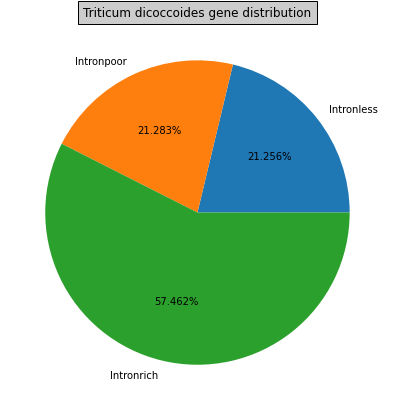

In [42]:
plotting_intron_types(14309, 14327, 38682, 'Triticum dicoccoides gene distribution')

In [304]:
### --- Creating the list of t_dicoccoides gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_dicoccoides_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_dicoccoides_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_dicoccoides_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_dicoccoides)):
    if i == len(intronless_t_dicoccoides) -1:
        intronless_file.write(intronless_t_dicoccoides[i])
    else:
        intronless_file.write(intronless_t_dicoccoides[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_dicoccoides)):
    if i == len(intronpoor_t_dicoccoides) -1:
        intronpoor_file.write(intronpoor_t_dicoccoides[i])
    else:
        intronpoor_file.write(intronpoor_t_dicoccoides[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_dicoccoides)):
    if i == len(intronrich_t_dicoccoides) -1:
        intronrich_file.write(intronrich_t_dicoccoides[i])
    else:
        intronrich_file.write(intronrich_t_dicoccoides[i]+'\n')
intronrich_file.close()


# Triticum spelta Ensembl 52

In [45]:
### --- Function to count introns within a dataframe made of exons formatted like exon_t_spelta
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0].split('.')[0]] = counts.get(i.split(';')[0].split('.')[0], 0) + 1
    return counts

In [43]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_spelta = pd.read_csv('Data/Triticum_spelta.PGSBv2.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_spelta[df_t_spelta['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,3B,PGSB_2019,gene,60315940,60318480,.,+,.,ID=gene:TraesTSP3B01G103400;biotype=protein_coding;gene_id=TraesTSP3B01G103400;logic_name=gff3_genes
2,3B,PGSB_2019,gene,748532642,748534584,.,+,.,ID=gene:TraesTSP3B01G540600;biotype=protein_coding;gene_id=TraesTSP3B01G540600;logic_name=gff3_genes
3,3B,PGSB_2019,gene,273297191,273300011,.,+,.,ID=gene:TraesTSP3B01G246100;biotype=protein_coding;gene_id=TraesTSP3B01G246100;logic_name=gff3_genes
4,3B,PGSB_2019,gene,800374526,800377599,.,-,.,ID=gene:TraesTSP3B01G613500;biotype=protein_coding;gene_id=TraesTSP3B01G613500;logic_name=gff3_genes
5,3B,PGSB_2019,gene,792855696,792856550,.,+,.,ID=gene:TraesTSP3B01G603200;biotype=protein_coding;gene_id=TraesTSP3B01G603200;logic_name=gff3_genes
...,...,...,...,...,...,...,...,...,...
1166262,6D,PGSB_2019,gene,424429160,424431334,.,+,.,ID=gene:TraesTSP6D01G338500;biotype=protein_coding;gene_id=TraesTSP6D01G338500;logic_name=gff3_genes
1166263,6D,PGSB_2019,gene,36304907,36307184,.,+,.,ID=gene:TraesTSP6D01G075000;biotype=protein_coding;gene_id=TraesTSP6D01G075000;logic_name=gff3_genes
1166264,6D,PGSB_2019,gene,401965762,401968699,.,+,.,ID=gene:TraesTSP6D01G311200;biotype=protein_coding;gene_id=TraesTSP6D01G311200;logic_name=gff3_genes
1166265,6D,PGSB_2019,gene,375548333,375550474,.,+,.,ID=gene:TraesTSP6D01G283400;biotype=protein_coding;gene_id=TraesTSP6D01G283400;logic_name=gff3_genes


In [44]:
### --- Building a separate dataframe containing all exons
exon_t_spelta = df_t_spelta.loc[df_t_spelta['type'].isin(['exon'])]
exon_t_spelta.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
13399,3B,ensembl,exon,60315940,60316813,.,+,.,Name=TraesTSP3B01G103400.1-E1;Parent=transcript:TraesTSP3B01G103400.1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TraesTSP3B01G103400.1-E1;rank=1
13400,3B,ensembl,exon,60316892,60318480,.,+,.,Name=TraesTSP3B01G103400.1-E2;Parent=transcript:TraesTSP3B01G103400.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TraesTSP3B01G103400.1-E2;rank=2
13401,3B,ensembl,exon,748532642,748533706,.,+,.,Name=TraesTSP3B01G540600.1-E1;Parent=transcript:TraesTSP3B01G540600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G540600.1-E1;rank=1
13402,3B,ensembl,exon,748533807,748533941,.,+,.,Name=TraesTSP3B01G540600.1-E2;Parent=transcript:TraesTSP3B01G540600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G540600.1-E2;rank=2
13403,3B,ensembl,exon,748534165,748534584,.,+,.,Name=TraesTSP3B01G540600.1-E3;Parent=transcript:TraesTSP3B01G540600.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G540600.1-E3;rank=3
13404,3B,ensembl,exon,273297191,273297580,.,+,.,Name=TraesTSP3B01G246100.1-E1;Parent=transcript:TraesTSP3B01G246100.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G246100.1-E1;rank=1
13405,3B,ensembl,exon,273297685,273297792,.,+,.,Name=TraesTSP3B01G246100.1-E2;Parent=transcript:TraesTSP3B01G246100.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G246100.1-E2;rank=2
13406,3B,ensembl,exon,273297925,273298080,.,+,.,Name=TraesTSP3B01G246100.1-E3;Parent=transcript:TraesTSP3B01G246100.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G246100.1-E3;rank=3
13407,3B,ensembl,exon,273298520,273298735,.,+,.,Name=TraesTSP3B01G246100.1-E4;Parent=transcript:TraesTSP3B01G246100.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G246100.1-E4;rank=4
13408,3B,ensembl,exon,273298819,273299028,.,+,.,Name=TraesTSP3B01G246100.1-E5;Parent=transcript:TraesTSP3B01G246100.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TraesTSP3B01G246100.1-E5;rank=5


In [46]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_spelta.to_csv('Data/Triticum_spelta.PGSBv2.0.52_EXON',sep='\t',index=False,header=False)

In [47]:
### --- Counting introns type
introns_dictionary_t_spelta = counting_introns_type(exon_t_spelta)

In [48]:
n_intronless_t_spelta, n_intronpoor_t_spelta, n_intronrich_t_spelta, intronless_t_spelta, intronpoor_t_spelta, intronrich_t_spelta = splitting_introns_type(introns_dictionary_t_spelta)

Intronless are: 34254
Intronpoor are: 47332
Intronrich are: 35282


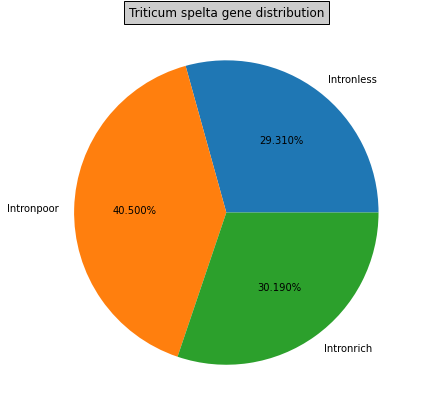

In [49]:
plotting_intron_types(34254, 47332, 35282, 'Triticum spelta gene distribution')

In [304]:
### --- Creating the list of t_spelta gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_spelta_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_spelta_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_spelta_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_spelta)):
    if i == len(intronless_t_spelta) -1:
        intronless_file.write(intronless_t_spelta[i])
    else:
        intronless_file.write(intronless_t_spelta[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_spelta)):
    if i == len(intronpoor_t_spelta) -1:
        intronpoor_file.write(intronpoor_t_spelta[i])
    else:
        intronpoor_file.write(intronpoor_t_spelta[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_spelta)):
    if i == len(intronrich_t_spelta) -1:
        intronrich_file.write(intronrich_t_spelta[i])
    else:
        intronrich_file.write(intronrich_t_spelta[i]+'\n')
intronrich_file.close()


# Triticum turgidum Ensembl 52

In [55]:
### --- Function to count introns within a dataframe made of exons formatted like exon_t_turgidum
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split(';')[0].split('.')[0]] = counts.get(i.split(';')[0].split('.')[0], 0) + 1
    return counts

In [50]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_turgidum = pd.read_csv('Data/Triticum_turgidum.Svevo.v1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_turgidum[df_t_turgidum['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,3B,CNR_Italy,gene,626877992,626880168,.,-,.,ID=gene:TRITD3Bv1G205160;biotype=protein_coding;description=CASP-like protein;gene_id=TRITD3Bv1G205160;logic_name=gff3_hc_genes
2,3B,CNR_Italy,gene,731794693,731795397,.,+,.,ID=gene:TRITD3Bv1G240270;biotype=protein_coding;description=Glutathione S-transferase;gene_id=TRITD3Bv1G240270;logic_name=gff3_hc_genes
3,3B,CNR_Italy,gene,830434190,830435808,.,-,.,ID=gene:TRITD3Bv1G281310;biotype=protein_coding;description=Ethylene-responsive transcription factor%2C putative G;gene_id=TRITD3Bv1G281310;logic_name=gff3_hc_genes
4,3B,CNR_Italy,gene,213790286,213790480,.,+,.,ID=gene:TRITD3Bv1G076030;biotype=protein_coding;description=phosphatidyl inositol monophosphate 5 kinase G;gene_id=TRITD3Bv1G076030;logic_name=gff3_hc_genes
5,3B,CNR_Italy,gene,517040798,517043119,.,-,.,ID=gene:TRITD3Bv1G168770;biotype=protein_coding;description=CASP-like protein;gene_id=TRITD3Bv1G168770;logic_name=gff3_hc_genes
...,...,...,...,...,...,...,...,...,...
2703981,Un,CNR_Italy,gene,54376448,54377617,.,+,.,ID=gene:TRITD0Uv1G023970;biotype=protein_coding;gene_id=TRITD0Uv1G023970;logic_name=gff3_hc_genes
2703982,Un,CNR_Italy,gene,33137886,33138194,.,+,.,ID=gene:TRITD0Uv1G013930;biotype=protein_coding;gene_id=TRITD0Uv1G013930;logic_name=gff3_hc_genes
2703983,Un,CNR_Italy,gene,162634758,162639506,.,+,.,ID=gene:TRITD0Uv1G065220;biotype=protein_coding;gene_id=TRITD0Uv1G065220;logic_name=gff3_hc_genes
2703984,Un,CNR_Italy,gene,297707052,297718654,.,+,.,ID=gene:TRITD0Uv1G098710;biotype=protein_coding;gene_id=TRITD0Uv1G098710;logic_name=gff3_hc_genes


In [51]:
### --- Building a separate dataframe containing all exons
exon_t_turgidum = df_t_turgidum.loc[df_t_turgidum['type'].isin(['exon'])]
exon_t_turgidum.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
22116,3B,PGSB_Jan2017,exon,626879758,626879801,.,-,.,Name=TRITD3Bv1G205160.1-E1;Parent=transcript:TRITD3Bv1G205160.1;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=TRITD3Bv1G205160.1-E1;rank=1
22117,3B,PGSB_Jan2017,exon,626879370,626879502,.,-,.,Name=TRITD3Bv1G205160.1-E2;Parent=transcript:TRITD3Bv1G205160.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TRITD3Bv1G205160.1-E2;rank=2
22118,3B,PGSB_Jan2017,exon,626877992,626878192,.,-,.,Name=TRITD3Bv1G205160.1-E3;Parent=transcript:TRITD3Bv1G205160.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRITD3Bv1G205160.1-E3;rank=3
22119,3B,PGSB_Jan2017,exon,626880047,626880168,.,-,.,Name=TRITD3Bv1G205160.2-E1;Parent=transcript:TRITD3Bv1G205160.2;constitutive=0;ensembl_end_phase=2;ensembl_phase=0;exon_id=TRITD3Bv1G205160.2-E1;rank=1
22120,3B,PGSB_Jan2017,exon,626879370,626879502,.,-,.,Name=TRITD3Bv1G205160.1-E2;Parent=transcript:TRITD3Bv1G205160.2;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TRITD3Bv1G205160.1-E2;rank=2
22121,3B,PGSB_Jan2017,exon,626877992,626878192,.,-,.,Name=TRITD3Bv1G205160.1-E3;Parent=transcript:TRITD3Bv1G205160.2;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRITD3Bv1G205160.1-E3;rank=3
22122,3B,PGSB_Jan2017,exon,731794693,731795397,.,+,.,Name=TRITD3Bv1G240270.1-E1;Parent=transcript:TRITD3Bv1G240270.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRITD3Bv1G240270.1-E1;rank=1
22123,3B,PGSB_Jan2017,exon,830435758,830435808,.,-,.,Name=TRITD3Bv1G281310.1-E1;Parent=transcript:TRITD3Bv1G281310.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRITD3Bv1G281310.1-E1;rank=1
22124,3B,PGSB_Jan2017,exon,830435430,830435699,.,-,.,Name=TRITD3Bv1G281310.1-E2;Parent=transcript:TRITD3Bv1G281310.1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRITD3Bv1G281310.1-E2;rank=2
22125,3B,PGSB_Jan2017,exon,830435233,830435378,.,-,.,Name=TRITD3Bv1G281310.1-E3;Parent=transcript:TRITD3Bv1G281310.1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TRITD3Bv1G281310.1-E3;rank=3


In [52]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_turgidum.to_csv('Data/Triticum_turgidum.Svevo.v1.52_EXON',sep='\t',index=False,header=False)

In [56]:
### --- Counting introns type
introns_dictionary_t_turgidum = counting_introns_type(exon_t_turgidum)

In [57]:
n_intronless_t_turgidum, n_intronpoor_t_turgidum, n_intronrich_t_turgidum, intronless_t_turgidum, intronpoor_t_turgidum, intronrich_t_turgidum = splitting_introns_type(introns_dictionary_t_turgidum)

Intronless are: 14043
Intronpoor are: 18135
Intronrich are: 34381


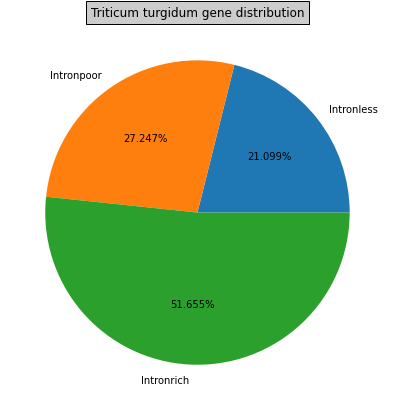

In [58]:
plotting_intron_types(14043, 18135, 34381, 'Triticum turgidum gene distribution')

In [304]:
### --- Creating the list of t_turgidum gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_turgidum_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_turgidum_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_turgidum_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_turgidum)):
    if i == len(intronless_t_turgidum) -1:
        intronless_file.write(intronless_t_turgidum[i])
    else:
        intronless_file.write(intronless_t_turgidum[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_turgidum)):
    if i == len(intronpoor_t_turgidum) -1:
        intronpoor_file.write(intronpoor_t_turgidum[i])
    else:
        intronpoor_file.write(intronpoor_t_turgidum[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_turgidum)):
    if i == len(intronrich_t_turgidum) -1:
        intronrich_file.write(intronrich_t_turgidum[i])
    else:
        intronrich_file.write(intronrich_t_turgidum[i]+'\n')
intronrich_file.close()


# Triticum urartu Ensembl 52

In [299]:
### --- Function to count introns within a dataframe made of exons formatted like exon_o_punctata
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('-')[0]] = counts.get(i.split('-')[0], 0) + 1
    return counts

In [59]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_t_urartu = pd.read_csv('Data/Triticum_urartu.ASM34745v1.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_t_urartu[df_t_urartu['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
1,scaffold9858,bgi,gene,263369,267182,.,+,.,ID=gene:TRIUR3_29448;biotype=protein_coding;description=Serine/threonine-protein phosphatase [Source:UniProtKB/TrEMBL%3BAcc:M8AV16];gene_id=TRIUR3_29448;logic_name=bgi_urartu
238,scaffold7153,bgi,gene,239244,239498,.,+,.,ID=gene:TRIUR3_00769;biotype=protein_coding;gene_id=TRIUR3_00769;logic_name=bgi_urartu
239,scaffold7153,bgi,gene,382069,385947,.,+,.,ID=gene:TRIUR3_00770;biotype=protein_coding;gene_id=TRIUR3_00770;logic_name=bgi_urartu
240,scaffold7153,bgi,gene,413137,416990,.,+,.,ID=gene:TRIUR3_00771;biotype=protein_coding;gene_id=TRIUR3_00771;logic_name=bgi_urartu
241,scaffold7153,bgi,gene,496276,499614,.,+,.,ID=gene:TRIUR3_00772;biotype=protein_coding;description=Disease resistance protein RPP13 [Source:UniProtKB/TrEMBL%3BAcc:M8A8R1];gene_id=TRIUR3_00772;logic_name=bgi_urartu
...,...,...,...,...,...,...,...,...,...
1665153,scaffold230578,bgi,gene,212,592,.,+,.,ID=gene:TRIUR3_35376;biotype=nontranslating_CDS;gene_id=TRIUR3_35376;logic_name=bgi_urartu
1673498,scaffold330681,bgi,gene,406,627,.,-,.,ID=gene:TRIUR3_34547;biotype=protein_coding;gene_id=TRIUR3_34547;logic_name=bgi_urartu
1679209,C166277785,bgi,gene,119,607,.,+,.,ID=gene:TRIUR3_27417;biotype=protein_coding;gene_id=TRIUR3_27417;logic_name=bgi_urartu
1696636,C166152061,bgi,gene,1,542,.,-,.,ID=gene:TRIUR3_28925;biotype=protein_coding;gene_id=TRIUR3_28925;logic_name=bgi_urartu


In [60]:
### --- Building a separate dataframe containing all exons
exon_t_urartu = df_t_urartu.loc[df_t_urartu['type'].isin(['exon'])]
exon_t_urartu.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
3,scaffold9858,bgi,exon,263369,263540,.,+,.,Name=TRIUR3_29448-T1.exon1;Parent=transcript:TRIUR3_29448-T1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TRIUR3_29448-T1.exon1;rank=1
4,scaffold9858,bgi,exon,264824,265383,.,+,.,Name=TRIUR3_29448-T1.exon2;Parent=transcript:TRIUR3_29448-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TRIUR3_29448-T1.exon2;rank=2
5,scaffold9858,bgi,exon,265461,265652,.,+,.,Name=TRIUR3_29448-T1.exon3;Parent=transcript:TRIUR3_29448-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRIUR3_29448-T1.exon3;rank=3
6,scaffold9858,bgi,exon,266556,267182,.,+,.,Name=TRIUR3_29448-T1.exon4;Parent=transcript:TRIUR3_29448-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRIUR3_29448-T1.exon4;rank=4
262,scaffold7153,bgi,exon,239244,239498,.,+,.,Name=TRIUR3_00769-T1.exon1;Parent=transcript:TRIUR3_00769-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRIUR3_00769-T1.exon1;rank=1
263,scaffold7153,bgi,exon,382069,383653,.,+,.,Name=TRIUR3_00770-T1.exon1;Parent=transcript:TRIUR3_00770-T1;constitutive=1;ensembl_end_phase=1;ensembl_phase=0;exon_id=TRIUR3_00770-T1.exon1;rank=1
264,scaffold7153,bgi,exon,383900,384726,.,+,.,Name=TRIUR3_00770-T1.exon2;Parent=transcript:TRIUR3_00770-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=1;exon_id=TRIUR3_00770-T1.exon2;rank=2
265,scaffold7153,bgi,exon,384731,385182,.,+,.,Name=TRIUR3_00770-T1.exon3;Parent=transcript:TRIUR3_00770-T1;constitutive=1;ensembl_end_phase=2;ensembl_phase=0;exon_id=TRIUR3_00770-T1.exon3;rank=3
266,scaffold7153,bgi,exon,385329,385947,.,+,.,Name=TRIUR3_00770-T1.exon4;Parent=transcript:TRIUR3_00770-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=2;exon_id=TRIUR3_00770-T1.exon4;rank=4
267,scaffold7153,bgi,exon,413137,414285,.,+,.,Name=TRIUR3_00771-T1.exon1;Parent=transcript:TRIUR3_00771-T1;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=TRIUR3_00771-T1.exon1;rank=1


In [61]:
### --- Exporting the exon dataframe to a tsv file 
exon_t_urartu.to_csv('Data/Triticum_urartu.ASM34745v1.52_EXON',sep='\t',index=False,header=False)

In [62]:
### --- Counting introns type
introns_dictionary_t_urartu = counting_introns_type(exon_t_urartu)

In [63]:
n_intronless_t_urartu, n_intronpoor_t_urartu, n_intronrich_t_urartu, intronless_t_urartu, intronpoor_t_urartu, intronrich_t_urartu = splitting_introns_type(introns_dictionary_t_urartu)

Intronless are: 8762
Intronpoor are: 15546
Intronrich are: 12484


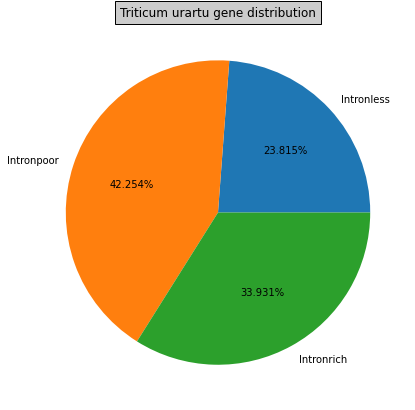

In [64]:
plotting_intron_types(8762, 15546, 12484, 'Triticum urartu gene distribution')

In [304]:
### --- Creating the list of t_urartu gene IDs to check the number of transcripts using command line
intronless_file = open('Output/t_urartu_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/t_urartu_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/t_urartu_intronrichIDs.txt', 'a')
for i in range(len(intronless_t_urartu)):
    if i == len(intronless_t_urartu) -1:
        intronless_file.write(intronless_t_urartu[i])
    else:
        intronless_file.write(intronless_t_urartu[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_t_urartu)):
    if i == len(intronpoor_t_urartu) -1:
        intronpoor_file.write(intronpoor_t_urartu[i])
    else:
        intronpoor_file.write(intronpoor_t_urartu[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_t_urartu)):
    if i == len(intronrich_t_urartu) -1:
        intronrich_file.write(intronrich_t_urartu[i])
    else:
        intronrich_file.write(intronrich_t_urartu[i]+'\n')
intronrich_file.close()


# Zea mays Ensembl 52

In [72]:
### --- Function to count introns within a dataframe made of exons formatted like exon_z_mays
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i.split('_')[0]] = counts.get(i.split('_')[0], 0) + 1
    return counts

In [65]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_z_mays = pd.read_csv('Data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_z_mays[df_z_mays['type']=='gene']

/home/lorenzo/anaconda3/envs/Thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,chr,source,type,start,end,score,strand,phase,attributes
1,1,ensembl,gene,52319290,52320913,.,+,.,ID=gene:Zm00001eb015280;biotype=misc_non_coding;description=Zm00001e001509;gene_id=Zm00001eb015280;logic_name=cshl_noncoding_gene
2,1,ensembl,gene,2555438,2555822,.,+,.,ID=gene:Zm00001eb000610;biotype=misc_non_coding;description=Zm00001e000064;gene_id=Zm00001eb000610;logic_name=cshl_noncoding_gene
3,1,ensembl,gene,184900367,184903962,.,+,.,ID=gene:Zm00001eb033210;biotype=misc_non_coding;description=Zm00001e003364;gene_id=Zm00001eb033210;logic_name=cshl_noncoding_gene
4,1,ensembl,gene,232771919,232773100,.,+,.,ID=gene:Zm00001eb044610;biotype=misc_non_coding;description=Zm00001e004471;gene_id=Zm00001eb044610;logic_name=cshl_noncoding_gene
5,1,ensembl,gene,47986617,47987002,.,+,.,ID=gene:Zm00001eb014360;biotype=misc_non_coding;description=Zm00001e001405;gene_id=Zm00001eb014360;logic_name=cshl_noncoding_gene
...,...,...,...,...,...,...,...,...,...
1162327,scaf_675,ensembl,gene,23981,25052,.,+,.,ID=gene:Zm00001eb442990;biotype=protein_coding;description=Zm00001e160115;gene_id=Zm00001eb442990;logic_name=cshl_gene
1162328,scaf_675,ensembl,gene,25430,26259,.,-,.,ID=gene:Zm00001eb443000;biotype=protein_coding;description=Zm00001e042497;gene_id=Zm00001eb443000;logic_name=cshl_gene
1162355,scaf_692,ensembl,gene,26462,30223,.,-,.,ID=gene:Zm00001eb443020;biotype=protein_coding;description=Zm00001e159961;gene_id=Zm00001eb443020;logic_name=cshl_gene
1162356,scaf_692,ensembl,gene,17668,21429,.,-,.,ID=gene:Zm00001eb443010;biotype=protein_coding;description=Zm00001e159958;gene_id=Zm00001eb443010;logic_name=cshl_gene


No need to split between High and Low confidence genes being not reported

In [66]:
### --- Building a separate dataframe containing all exons
exon_z_mays = df_z_mays.loc[df_z_mays['type'].isin(['exon'])]
exon_z_mays.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
18212,1,ensembl,exon,52319290,52320913,.,+,.,Name=Zm00001eb015280_T001.exon1;Parent=transcript:Zm00001eb015280_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb015280_T001.exon1;rank=1
18213,1,ensembl,exon,2555438,2555822,.,+,.,Name=Zm00001eb000610_T001.exon1;Parent=transcript:Zm00001eb000610_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb000610_T001.exon1;rank=1
18214,1,ensembl,exon,184900367,184901161,.,+,.,Name=Zm00001eb033210_T001.exon1;Parent=transcript:Zm00001eb033210_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb033210_T001.exon1;rank=1
18215,1,ensembl,exon,184903768,184903962,.,+,.,Name=Zm00001eb033210_T001.exon2;Parent=transcript:Zm00001eb033210_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb033210_T001.exon2;rank=2
18216,1,ensembl,exon,232771919,232773100,.,+,.,Name=Zm00001eb044610_T001.exon1;Parent=transcript:Zm00001eb044610_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb044610_T001.exon1;rank=1
18217,1,ensembl,exon,47986617,47987002,.,+,.,Name=Zm00001eb014360_T001.exon1;Parent=transcript:Zm00001eb014360_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb014360_T001.exon1;rank=1
18218,1,ensembl,exon,260839272,260839478,.,+,.,Name=Zm00001eb051320_T001.exon1;Parent=transcript:Zm00001eb051320_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb051320_T001.exon1;rank=1
18219,1,ensembl,exon,260841434,260841525,.,+,.,Name=Zm00001eb051320_T001.exon2;Parent=transcript:Zm00001eb051320_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb051320_T001.exon2;rank=2
18220,1,ensembl,exon,260842079,260842230,.,+,.,Name=Zm00001eb051320_T001.exon3;Parent=transcript:Zm00001eb051320_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb051320_T001.exon3;rank=3
18221,1,ensembl,exon,83316170,83316592,.,-,.,Name=Zm00001eb021860_T001.exon1;Parent=transcript:Zm00001eb021860_T001;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=Zm00001eb021860_T001.exon1;rank=1


In [67]:
### --- Exporting the exon dataframe to a tsv file 
exon_z_mays.to_csv('Data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52_EXON',sep='\t',index=False,header=False)

In [73]:
### --- Counting introns type
introns_dictionary_z_mays = counting_introns_type(exon_z_mays)

In [74]:
n_intronless_z_mays, n_intronpoor_z_mays, n_intronrich_z_mays, intronless_z_mays, intronpoor_z_mays, intronrich_z_mays = splitting_introns_type(introns_dictionary_z_mays)

Intronless are: 11985
Intronpoor are: 12503
Intronrich are: 19815


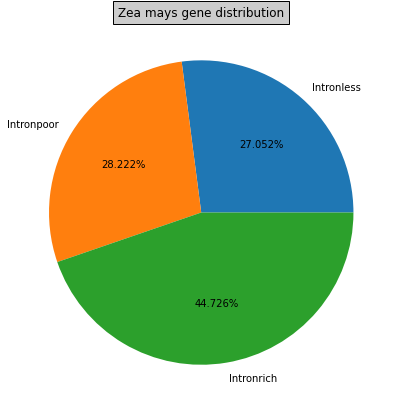

In [75]:
plotting_intron_types(11985, 12503, 19815, 'Zea mays gene distribution')

In [304]:
### --- Creating the list of z_mays gene IDs to check the number of transcripts using command line
intronless_file = open('Output/z_mays_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/z_mays_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/z_mays_intronrichIDs.txt', 'a')
for i in range(len(intronless_z_mays)):
    if i == len(intronless_z_mays) -1:
        intronless_file.write(intronless_z_mays[i])
    else:
        intronless_file.write(intronless_z_mays[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_z_mays)):
    if i == len(intronpoor_z_mays) -1:
        intronpoor_file.write(intronpoor_z_mays[i])
    else:
        intronpoor_file.write(intronpoor_z_mays[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_z_mays)):
    if i == len(intronrich_z_mays) -1:
        intronrich_file.write(intronrich_z_mays[i])
    else:
        intronrich_file.write(intronrich_z_mays[i]+'\n')
intronrich_file.close()


# Aegilops Tuschii v5.0

In [79]:
### --- Function to count introns within a dataframe made of exons formatted like exon_a_tauschii_v5
def counting_introns_type(in_dataframe):
    counts = dict()
    for i in in_dataframe['attributes']:
        counts[i] = counts.get(i, 0) + 1
    return counts

In [77]:
### --- Transforming the gff3 file to a pandas dataframe to better handle it
df_a_tauschii_v5 = pd.read_csv('Data/A_tauschii_v5.gff3', sep='\t', header=None, names = ['chr', 'source', 'type','start','end','score','strand','phase','attributes'])
df_a_tauschii_v5[df_a_tauschii_v5['type']=='gene']

,chr,source,type,start,end,score,strand,phase,attributes
2,Chr1,pgsb,gene,138095132.0,138097675.0,.,-,.,Name=PGSB_gene_4318;ID=PGSB_gene_4318;_Primary_confidence_class=HC
18,Chr1,pgsb,gene,138171801.0,138179764.0,.,-,.,ID=PGSB_gene_4319;_Primary_confidence_class=HC;Name=PGSB_gene_4319
32,Chr1,pgsb,gene,138245099.0,138249905.0,.,-,.,Name=PGSB_gene_4320;_Primary_confidence_class=HC;ID=PGSB_gene_4320
50,Chr1,pgsb,gene,138479323.0,138481541.0,.,+,.,Name=PGSB_gene_4321;_Primary_confidence_class=HC;ID=PGSB_gene_4321
60,Chr1,pgsb,gene,138485376.0,138487256.0,.,+,.,_Primary_confidence_class=LC;ID=PGSB_gene_4322;Name=PGSB_gene_4322
...,...,...,...,...,...,...,...,...,...
541252,Chr7,pgsb,gene,644527607.0,644532034.0,.,-,.,Name=PGSB_gene_68785;_Primary_confidence_class=HC;ID=PGSB_gene_68785
541266,Chr7,pgsb,gene,644571699.0,644578387.0,.,-,.,Name=PGSB_gene_68786;_Primary_confidence_class=LC;ID=PGSB_gene_68786
541288,Chr7,pgsb,gene,644606535.0,644606891.0,.,+,.,Name=PGSB_gene_68787;ID=PGSB_gene_68787;_Primary_confidence_class=LC
541292,Chr7,pgsb,gene,644612419.0,644612736.0,.,+,.,Name=PGSB_gene_68788;ID=PGSB_gene_68788;_Primary_confidence_class=HC


In [78]:
### --- Building a separate dataframe containing all exons
exon_a_tauschii_v5 = df_a_tauschii_v5.loc[df_a_tauschii_v5['type'].isin(['exon'])]
exon_a_tauschii_v5.iloc[:31, :]

,chr,source,type,start,end,score,strand,phase,attributes
4,Chr1,pgsb,exon,138095132.0,138095311.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
6,Chr1,pgsb,exon,138096126.0,138096188.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
8,Chr1,pgsb,exon,138096292.0,138096458.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
10,Chr1,pgsb,exon,138096541.0,138096581.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
12,Chr1,pgsb,exon,138096770.0,138096855.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
14,Chr1,pgsb,exon,138097268.0,138097386.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
16,Chr1,pgsb,exon,138097495.0,138097675.0,.,-,.,Parent=evm.model.Aet_chr_1.2516
20,Chr1,pgsb,exon,138171801.0,138171953.0,.,-,.,Parent=evm.model.Aet_chr_1.2517
22,Chr1,pgsb,exon,138172203.0,138172264.0,.,-,.,Parent=evm.model.Aet_chr_1.2517
24,Chr1,pgsb,exon,138172776.0,138172863.0,.,-,.,Parent=evm.model.Aet_chr_1.2517


In [67]:
### --- Exporting the exon dataframe to a tsv file 
exon_a_tauschii_v5.to_csv('Data/A_tauschii_v5_EXON',sep='\t',index=False,header=False)

In [80]:
### --- Counting introns type
introns_dictionary_a_tauschii_v5 = counting_introns_type(exon_a_tauschii_v5)

In [81]:
n_intronless_a_tauschii_v5, n_intronpoor_a_tauschii_v5, n_intronrich_a_tauschii_v5, intronless_a_tauschii_v5, intronpoor_a_tauschii_v5, intronrich_a_tauschii_v5 = splitting_introns_type(introns_dictionary_a_tauschii_v5)

Intronless are: 33748
Intronpoor are: 20795
Intronrich are: 12444


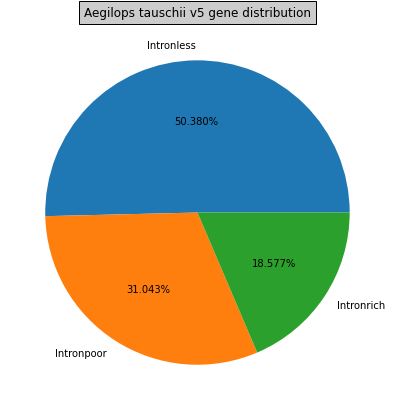

In [82]:
plotting_intron_types(33748, 20795, 12444, 'Aegilops tauschii v5 gene distribution')

In [304]:
### --- Creating the list of a_tauschii_v5 gene IDs to check the number of transcripts using command line
intronless_file = open('Output/a_tauschii_v5_intronlessIDs.txt', 'a')
intronpoor_file = open('Output/a_tauschii_v5_intronpoorIDs.txt', 'a')
intronrich_file = open('Output/a_tauschii_v5_intronrichIDs.txt', 'a')
for i in range(len(intronless_a_tauschii_v5)):
    if i == len(intronless_a_tauschii_v5) -1:
        intronless_file.write(intronless_a_tauschii_v5[i])
    else:
        intronless_file.write(intronless_a_tauschii_v5[i] + '\n')
intronless_file.close()

for i in range(len(intronpoor_a_tauschii_v5)):
    if i == len(intronpoor_a_tauschii_v5) -1:
        intronpoor_file.write(intronpoor_a_tauschii_v5[i])
    else:
        intronpoor_file.write(intronpoor_a_tauschii_v5[i] + '\n')
intronpoor_file.close()

for i in range(len(intronrich_a_tauschii_v5)):
    if i == len(intronrich_a_tauschii_v5) -1:
        intronrich_file.write(intronrich_a_tauschii_v5[i])
    else:
        intronrich_file.write(intronrich_a_tauschii_v5[i]+'\n')
intronrich_file.close()
